<a href="https://colab.research.google.com/github/ersilia-os/ersilia-intro-workshop/blob/main/notebooks/m3_mycetos_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train an AI model

This notebook contains the basic steps to train a classifier for bioactivity prediction.

It is prepared to run on Google Colaboratory, if you want to run it locally make sure to create a conda environment with Python 3.10 and install the packages indicated below.

_Remember that the ! sign indicates a bash command, to run it in the terminal simply copy the command without !_

# Supervised Machine Learning

Uses previously **labeled** data to train an algorithm (i.e the output is known). The algorithm learns if it is doing right by comparing the predicted vs the real output.

Simplified steps:
1. Data collection and processing.
2. Division of training data in Train and Test sets.
3. Use the train set to train the model.
4. Predict an output for the test set and compare the predicted vs real results.
5. Improve the model until we are satisfied with the performance on the test set

## Types of supervised ML models
### Classification
Classification problems are characterized by having categorical output (i.e: active, inactive), so the model tries to predict to which class the input belongs. It can include several classes, is not limited to a binary classification.

### Regression
Regression problems are characterized by continuous variables, where the model tries to predict the exact value of the input (i.e: IC50 of a specific compound)

## Evaluation of supervised ML models

### Classification metrics

We obtain the following data to evaluate the model:
- Y_pred: predictions on the test set
- Y_real: real outcome of the test set

**Accuracy:** number of correct predictions divided by the total number of predictions (TP/(lenY)). For example, if we have predicted correctly 5 out of 10 data points --> Accuracy = 50%

**Precision**: identification of only real positives (with a 100% precision, a model does not classify any negatives as positive) --> TP/(TP+FP)

**Recall**: identification of all positives (with a 100% recall, no positive is classified as negative, but some negatives might be included in the positives) --> TP / (TP+FN)

**Confusion matrix**: plots the real vs the predicted values in a table, to easily obtain the FP, TP, TN, FN values.


### Regression metrics
In a regression task, we obtain as error the difference between the predicted value and the real value (i.e: IC50real=0.1, IC50pred = 0.5 --> error of 0.4).


**Mean Absolute Error:** mean of the absolute values of errors.

**Mean Squared Error:** mean of the square error. By squaring, larger errors are contributing more and therefore the model punishes them.

**Root Mean Squared Error:** root of the mean of square error to simplify interpretation (by using MSE, we also square the units which makes them difficult to interpret).

**R-square**: coefficient of determination, the amount of variance explained by the model (from 0 to 1, the closer to 1, the better our model is)

## 1. Install the necessary packages

For this exercise, we will need the following packages:
- RdKit: provides basic chemoinformatics tools
- Pandas: deals with tabular data (like csv files)
- Matplotlib and seaborn: plotting tools to visualise results
- LazyQSAR: a simple package to build fast AI models developed by Ersilia. LazyQSAR automatically installs RdKit, Scikit-Learn, Ersilia Compound Embeddings, FLAML, Mordred and Numpy among others

Google Colab already provides Pandas, Matplotlib and Seaborn pre-installed, so you do not need to install them. If you run this notebook locally please make sure to use the `pip install` command on the Terminal to get the packages in your conda environment

**If you restart the notebook, you will need to reinstall the packages. In a local environment, you do NOT need to reinstall the packages, just activate the conda environment again**

In [1]:
# Package installation
!pip install lazyqsar==0.3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.6/295.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.9 MB/s et

## 2. Load your data

Next, we will use the pandas package to load the training data. At the bare minimmum, you should have a .csv file with two columns: SMILES and Activity of the molecule against the desired target.

In Google Colab, go to the left hand side of the screen and click on the `folder` icon. There, you will see a `Upload file` icon to add your files to the Cloud. You can also call them from Google Drive. These files will be deleted if the notebook is closed, so you will need to re-upload them every time.

If you are working locally, just make sure to input the right path to your data file.

In [2]:
# @title File Name
filename = "mycetos.csv" # @param {type:"string"}


In [3]:
# Load data into a Pandas DataFrame (df)
# We will use the read_csv function from Pandas to automatically upload the csv file in the right format for Python
# We need first to import the package Pandas, which we abbreviate as pd

import pandas as pd

df = pd.read_csv(filename)

In [4]:
# we can now observe how our dataframe looks like
df

,Identifier,SMILES,Growth_25uM
0,MYOS_00378_00_01,O=C1C=Cc2ccccc2C1=O,11.5
1,MYOS_00337_00_01,Cc1cccc(CC(=O)Nc2nc3cc(Br)ccc3o2)c1,7.1
2,MYOS_00223_00_01,O=C1/C(=C/c2ccc(F)cc2F)CN(C(=O)/C=C/c2ccccc2)C...,47.5
3,MYOS_00139_00_01,O=C1CCN(C(c2cccnc2)c2ccc(Cl)cc2F)CC1,79.2
4,MYOS_00220_00_01,COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O,76.2
...,...,...,...
377,MYOS_00241_00_01,C=C(C)[C@@H]1CC[C@]2(C/N=C/c3ccc([N+](=O)[O-])...,80.6
378,MYOS_00308_00_01,Cc1cccc(-c2csc(Nc3cc(C)ccn3)n2)c1,93.8
379,MYOS_00092_00_01,O=C(NC1CCN(C(c2ccc(C(F)(F)F)cc2)c2cnccn2)CC1)c...,82.4
380,MYOS_00001_00_01,CCOC(=O)N1CCN(C(c2cccnc2)c2ccc(Cl)cc2F)CC1,19.5


In [5]:
# and its shape
df.shape

(382, 3)

In [6]:
# Let's get the variables right!
# If the column name changes, you need to change these variables
# Remember Python strings are case-sensitive
SMILES = "SMILES"
EXP = "Growth_25uM"
BIN = "bin"

## 3. Define a cut-off

Since we will create a classifier, we need to decide at which cut-off we consider our molecules `Active` or `Inactive`.

We can visualise our data with a histogram for example to make the decision, or we can ask the original data producers for their expert recommendation.

In [7]:
# We import the plotting package Matplotlib, abbreviated as plt
import matplotlib.pyplot as plt

# We select the variable we want to plot in the histogram, in this case the activity values
x = df[EXP] #here you need to write the exact column name, respecting Caps
print(x)

0      11.5
1       7.1
2      47.5
3      79.2
4      76.2
       ... 
377    80.6
378    93.8
379    82.4
380    19.5
381     7.4
Name: Growth_25uM, Length: 382, dtype: float64


(array([119.,  32.,  38.,  73.,  93.,  23.,   3.,   0.,   0.,   1.]),
 array([ -4.8 ,  14.89,  34.58,  54.27,  73.96,  93.65, 113.34, 133.03,
        152.72, 172.41, 192.1 ]),
 <BarContainer object of 10 artists>)

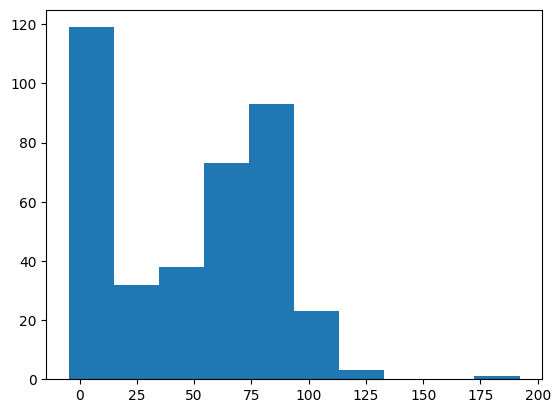

In [8]:
# We now plot the data using the histogram function
plt.hist(x)

Text(0, 0.5, 'Number of mols')

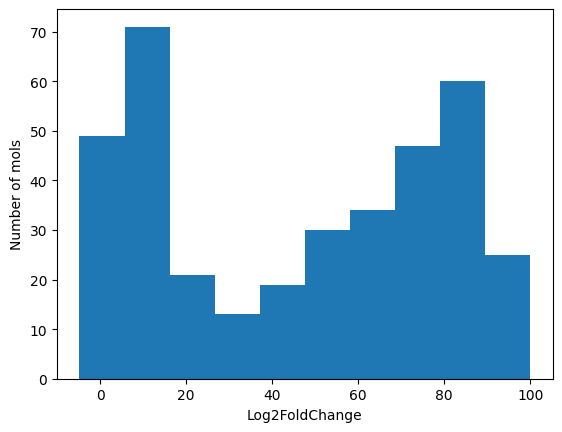

In [9]:
# Depending on our data, we might want to improve the plot for better visualization
# here, we clip the maximmum values to 20
plt.hist(x, range=(x.min(), 100))
plt.xlabel("Log2FoldChange")
plt.ylabel("Number of mols")

To identify the best activity cut-off for your data, you need to:
- Understand the experimental set up: what kind of assay was done? what is the units of activity measured?
- Understand what is the end goal for the model: is it obtaining the most active compounds? Is it to filter our some non-actives to reduce the test number?
- Ask the experts! Talk to the people who ran the experiment, if possible

Once you have the cut-off, transform the activities to binary. Typically, by consensus:
- 1: Active (the compound perturbs our biological system)
- 0: Inactive (the compound does not affect our biolgical system)

In [10]:
# @title Activity cut-off { display-mode: "form" }
# We identify a good cut-off for our data and assign the variable cutoff
cutoff = 20 # @param {type:"number"}

In [11]:
# @title Direction of activity { display-mode: "form" }
# Are our actives lower than the cut-off, or higher than the cut-off?
direction = "lower" # @param {type:"string"}

In [12]:
# Here, we will create a new column in our file with the binary activity

if direction == "lower":
    df[BIN] = [1 if x <= cutoff else 0 for x in df[EXP]]
elif direction == "higher":
    df[BIN] = [1 if x >= cutoff else 0 for x in df[EXP]]
else:
    print("no direction specified. Please select lower or higher direction for the activity cut-off")

In [13]:
# Let's check the output
df

,Identifier,SMILES,Growth_25uM,bin
0,MYOS_00378_00_01,O=C1C=Cc2ccccc2C1=O,11.5,1
1,MYOS_00337_00_01,Cc1cccc(CC(=O)Nc2nc3cc(Br)ccc3o2)c1,7.1,1
2,MYOS_00223_00_01,O=C1/C(=C/c2ccc(F)cc2F)CN(C(=O)/C=C/c2ccccc2)C...,47.5,0
3,MYOS_00139_00_01,O=C1CCN(C(c2cccnc2)c2ccc(Cl)cc2F)CC1,79.2,0
4,MYOS_00220_00_01,COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O,76.2,0
...,...,...,...,...
377,MYOS_00241_00_01,C=C(C)[C@@H]1CC[C@]2(C/N=C/c3ccc([N+](=O)[O-])...,80.6,0
378,MYOS_00308_00_01,Cc1cccc(-c2csc(Nc3cc(C)ccn3)n2)c1,93.8,0
379,MYOS_00092_00_01,O=C(NC1CCN(C(c2ccc(C(F)(F)F)cc2)c2cnccn2)CC1)c...,82.4,0
380,MYOS_00001_00_01,CCOC(=O)N1CCN(C(c2cccnc2)c2ccc(Cl)cc2F)CC1,19.5,1


In [14]:
# We can print how many actives / inactives we have in our dataset
print("Total molecules: ", len(df))
print("Active molecules: ", len(df[df[BIN]==1]))
print("Inactive molecules: ", len(df[df[BIN]==0]))
print("Frequency of Actives (%): ", len(df[df[BIN]==1])/len(df)*100)

Total molecules:  382
Active molecules:  133
Inactive molecules:  249
Frequency of Actives (%):  34.81675392670157


## 4. Divide the data into Train and Test sets

To make sure our model will have good performance, we need to keep part of the data as a test set, to evaluate the model once trained.

Typically, it is good practice to reserve ~20% of the data as test set. Make sure that the balance of actives / inactives is maintained both in the train and the test sets.

We will try a 5-fold cross-validation (run 5 times random train-test split sets and evaluate the different model performances)

In [15]:
# We will use this function to split the data
# The function uses the sklearn train_test_split built-in method
from sklearn.model_selection import train_test_split
import numpy as np

def random_split(df, size):
    indices = np.arange(len(df))
    X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(df[SMILES], df[EXP], indices, test_size=size, stratify=df[BIN])
    train = df.iloc[i_train]
    test = df.iloc[i_test]
    return train, test

In [16]:
for i in range(5):
    train, test = random_split(df, 0.2)
    train.to_csv("train_set_{}.csv".format(i), index=False)
    test.to_csv("test_set_{}.csv".format(i), index=False)

In [17]:
# We can make sure the active / inactive balance was preserved
train_balance = len(train[train[BIN]==1])/len(train)*100
test_balance = len(test[test[BIN]==1])/len(test)*100

print("The frequency of Actives in the train set is: ", train_balance)
print("The frequency of Actives in the test set is: ", test_balance)

The frequency of Actives in the train set is:  34.75409836065574
The frequency of Actives in the test set is:  35.064935064935064


_* We have individually created the descriptors so that we can check how they look like. Luckily, LazyQSAR provides a single funtion to convert the smiles to vectors and train an ML model, so we will use that feature_

## 6. Train an ML model & get the predictions with Morgan Fingerprints

We have our input (morgan descriptors) and the endpoint, the activity in binary format (1 or 0) so we are ready to train a classifier!
We will use the built-in method in LazyQSAR

In [18]:
import lazyqsar as lq

for i in range(5):
    train = pd.read_csv("train_set_{}.csv".format(i))
    test = pd.read_csv("test_set_{}.csv".format(i))
    smiles_train = train[SMILES]
    y_train = train[BIN]
    model = lq.MorganBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
    model.fit(train[SMILES], train[BIN])
    y_hat = model.predict_proba(test[SMILES])
    test["proba1"] = y_hat[:,1]
    test.to_csv("test_set_pred_morgan_{}.csv".format(i))

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[flaml.automl.logger: 09-26 15:26:06] {1679} INFO - task = classification
[flaml.automl.logger: 09-26 15:26:06] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-26 15:26:06] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-26 15:26:06] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost']
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 09-26 15:26:06] {2344} INFO - Estimated sufficient time budget=303s. Estimated necessary time budget=0s.
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.1s,	estimator rf's best error=0.2262,	best estimator rf's best error=0.2262
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.2004,	best estimator lgbm's best error=0.2004
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 2, current learn

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.3s,	estimator rf's best error=0.1210,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 7, current learner rf
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.4s,	estimator rf's best error=0.1210,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 8, current learner rf
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.4s,	estimator rf's best error=0.1210,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 9, current learner rf
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.5s,	estimator rf's best error=0.1210,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.2004,	best estimator rf's best er

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.8s,	estimator rf's best error=0.1210,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 18, current learner xgboost
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.8s,	estimator xgboost's best error=0.1766,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 19, current learner lgbm
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.9s,	estimator lgbm's best error=0.1488,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.9s,	estimator lgbm's best error=0.1488,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:06] {2218} INFO - iteration 21, current learner rf
[flaml.automl.logger: 09-26 15:26:06] {2391} INFO -  at 0.9s,	estimator rf's best error=0.1210,	best estim

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.0s,	estimator xgboost's best error=0.1766,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 24, current learner xgboost
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.1s,	estimator xgboost's best error=0.1766,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 25, current learner rf
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.1s,	estimator rf's best error=0.1210,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 26, current learner xgboost
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.2s,	estimator xgboost's best error=0.1766,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.2s,	estimator xgboost's best error=0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.3s,	estimator xgboost's best error=0.1766,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 29, current learner rf
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.3s,	estimator rf's best error=0.1210,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 30, current learner rf
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.3s,	estimator rf's best error=0.1210,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 31, current learner rf
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.4s,	estimator rf's best error=0.1210,	best estimator rf's best error=0.1210
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 32, current learner xgboost
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.5s,	estimator xgboost's best error=0.1369,	best estimato

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.6s,	estimator lgbm's best error=0.1488,	best estimator rf's best error=0.1052
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.7s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1052
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 38, current learner rf
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.7s,	estimator rf's best error=0.1052,	best estimator rf's best error=0.1052
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.8s,	estimator lgbm's best error=0.1290,	best estimator rf's best error=0.1052
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.8s,	estimator xgboost's best error=0.1369,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.9s,	estimator rf's best error=0.1052,	best estimator rf's best error=0.1052
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 09-26 15:26:07] {2391} INFO -  at 1.9s,	estimator lgbm's best error=0.1071,	best estimator rf's best error=0.1052
[flaml.automl.logger: 09-26 15:26:07] {2218} INFO - iteration 43, current learner xgboost
[flaml.automl.logger: 09-26 15:26:08] {2391} INFO -  at 2.0s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1052
[flaml.automl.logger: 09-26 15:26:08] {2218} INFO - iteration 44, current learner lgbm
[flaml.automl.logger: 09-26 15:26:08] {2391} INFO -  at 2.0s,	estimator lgbm's best error=0.1071,	best estimator rf's best error=0.1052
[flaml.automl.logger: 09-26 15:26:08] {2218} INFO - iteration 45, current learner lgbm
[flaml.automl.logger: 09-26 15:26:08] {2391} INFO -  at 2.0s,	estimator lgbm's best error=0.0794,	best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:08] {2391} INFO -  at 2.2s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:26:08] {2218} INFO - iteration 50, current learner lgbm
[flaml.automl.logger: 09-26 15:26:08] {2391} INFO -  at 2.2s,	estimator lgbm's best error=0.0556,	best estimator lgbm's best error=0.0556
[flaml.automl.logger: 09-26 15:26:08] {2218} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 09-26 15:26:08] {2391} INFO -  at 2.2s,	estimator lgbm's best error=0.0556,	best estimator lgbm's best error=0.0556
[flaml.automl.logger: 09-26 15:26:08] {2218} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 09-26 15:26:08] {2391} INFO -  at 2.3s,	estimator lgbm's best error=0.0556,	best estimator lgbm's best error=0.0556
[flaml.automl.logger: 09-26 15:26:08] {2218} INFO - iteration 53, current learner rf
[flaml.automl.logger: 09-26 15:26:08] {2391} INFO -  at 2.3s,	estimator rf's best error=0.1052,	best e

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:09] {2391} INFO -  at 3.1s,	estimator lgbm's best error=0.0556,	best estimator lgbm's best error=0.0556
[flaml.automl.logger: 09-26 15:26:09] {2218} INFO - iteration 77, current learner lgbm
[flaml.automl.logger: 09-26 15:26:09] {2391} INFO -  at 3.1s,	estimator lgbm's best error=0.0556,	best estimator lgbm's best error=0.0556
[flaml.automl.logger: 09-26 15:26:09] {2218} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 09-26 15:26:09] {2391} INFO -  at 3.2s,	estimator lgbm's best error=0.0556,	best estimator lgbm's best error=0.0556
[flaml.automl.logger: 09-26 15:26:09] {2218} INFO - iteration 79, current learner xgboost
[flaml.automl.logger: 09-26 15:26:09] {2391} INFO -  at 3.2s,	estimator xgboost's best error=0.1329,	best estimator lgbm's best error=0.0556
[flaml.automl.logger: 09-26 15:26:09] {2218} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 09-26 15:26:09] {2391} INFO -  at 3.3s,	estimator lgbm's best error=0.02

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:09] {2218} INFO - iteration 85, current learner lgbm
[flaml.automl.logger: 09-26 15:26:09] {2391} INFO -  at 3.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:09] {2218} INFO - iteration 86, current learner lgbm
[flaml.automl.logger: 09-26 15:26:09] {2391} INFO -  at 3.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:09] {2218} INFO - iteration 87, current learner lgbm
[flaml.automl.logger: 09-26 15:26:09] {2391} INFO -  at 3.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:09] {2218} INFO - iteration 88, current learner lgbm
[flaml.automl.logger: 09-26 15:26:09] {2391} INFO -  at 3.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:09] {2218} INFO - iteration 89, current learner lgbm
[flaml.automl

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:10] {2391} INFO -  at 4.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:10] {2218} INFO - iteration 117, current learner rf
[flaml.automl.logger: 09-26 15:26:10] {2391} INFO -  at 4.6s,	estimator rf's best error=0.1052,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:10] {2218} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 09-26 15:26:10] {2391} INFO -  at 4.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:10] {2218} INFO - iteration 119, current learner lgbm
[flaml.automl.logger: 09-26 15:26:10] {2391} INFO -  at 4.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:10] {2218} INFO - iteration 120, current learner lgbm
[flaml.automl.logger: 09-26 15:26:10] {2391} INFO -  at 4.7s,	estimator lgbm's best error=0.0238,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:11] {2391} INFO -  at 5.3s,	estimator xgboost's best error=0.0833,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:11] {2218} INFO - iteration 138, current learner lgbm
[flaml.automl.logger: 09-26 15:26:11] {2391} INFO -  at 5.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:11] {2218} INFO - iteration 139, current learner xgboost
[flaml.automl.logger: 09-26 15:26:11] {2391} INFO -  at 5.4s,	estimator xgboost's best error=0.0833,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:11] {2218} INFO - iteration 140, current learner xgboost
[flaml.automl.logger: 09-26 15:26:11] {2391} INFO -  at 5.5s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:11] {2218} INFO - iteration 141, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:12] {2391} INFO -  at 6.1s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:12] {2218} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 09-26 15:26:12] {2391} INFO -  at 6.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:12] {2218} INFO - iteration 143, current learner lgbm
[flaml.automl.logger: 09-26 15:26:12] {2391} INFO -  at 6.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:12] {2218} INFO - iteration 144, current learner rf
[flaml.automl.logger: 09-26 15:26:12] {2391} INFO -  at 6.6s,	estimator rf's best error=0.1052,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:12] {2218} INFO - iteration 145, current learner rf
[flaml.automl.logger: 09-26 15:26:12] {2391} INFO -  at 6.7s,	estimator rf's best error=0.1052,	bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:13] {2391} INFO -  at 7.5s,	estimator rf's best error=0.0873,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:13] {2218} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 09-26 15:26:13] {2391} INFO -  at 7.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:13] {2218} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 09-26 15:26:14] {2391} INFO -  at 8.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:14] {2218} INFO - iteration 159, current learner rf
[flaml.automl.logger: 09-26 15:26:14] {2391} INFO -  at 8.0s,	estimator rf's best error=0.0873,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:14] {2218} INFO - iteration 160, current learner lgbm
[flaml.automl.logger: 09-26 15:26:14] {2391} INFO -  at 8.2s,	estimator lgbm's best error=0.0238,	best

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:14] {2391} INFO -  at 8.4s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:14] {2218} INFO - iteration 162, current learner lgbm
[flaml.automl.logger: 09-26 15:26:14] {2391} INFO -  at 8.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:14] {2218} INFO - iteration 163, current learner rf
[flaml.automl.logger: 09-26 15:26:14] {2391} INFO -  at 8.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:14] {2218} INFO - iteration 164, current learner rf
[flaml.automl.logger: 09-26 15:26:14] {2391} INFO -  at 8.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:14] {2218} INFO - iteration 165, current learner rf
[flaml.automl.logger: 09-26 15:26:14] {2391} INFO -  at 8.8s,	estimator rf's best error=0.0635,	best es

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:15] {2391} INFO -  at 9.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:15] {2218} INFO - iteration 180, current learner rf
[flaml.automl.logger: 09-26 15:26:15] {2391} INFO -  at 9.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:15] {2218} INFO - iteration 181, current learner rf
[flaml.automl.logger: 09-26 15:26:15] {2391} INFO -  at 9.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:15] {2218} INFO - iteration 182, current learner rf
[flaml.automl.logger: 09-26 15:26:15] {2391} INFO -  at 9.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:15] {2218} INFO - iteration 183, current learner lgbm
[flaml.automl.logger: 09-26 15:26:15] {2391} INFO -  at 9.7s,	estimator lgbm's best error=0.0238,	best estim

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.2s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 197, current learner lgbm
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 198, current learner xgboost
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.3s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 199, current learner rf
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 200, current learner rf
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.4s,	estimator rf's best error=0.0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.5s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 203, current learner xgboost
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.6s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 204, current learner lgbm
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 205, current learner lgbm
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 206, current learner lgbm
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.7s,	estimator lgbm's bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 208, current learner lgbm
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 209, current learner lgbm
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 210, current learner lgbm
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:16] {2218} INFO - iteration 211, current learner xgboost
[flaml.automl.logger: 09-26 15:26:16] {2391} INFO -  at 10.9s,	estimator xgboost's best err

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.1s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 215, current learner rf
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.1s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 216, current learner rf
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.2s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 217, current learner rf
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.2s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.2s,	estimator lgbm's best error=0.0238,	be

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 225, current learner rf
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 226, current learner lgbm
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 227, current learner rf
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 228, current learner xgboost
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.7s,	estimator xgboost's best error=0.075

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 233, current learner lgbm
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 234, current learner lgbm
[flaml.automl.logger: 09-26 15:26:17] {2391} INFO -  at 11.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:17] {2218} INFO - iteration 235, current learner lgbm
[flaml.automl.logger: 09-26 15:26:18] {2391} INFO -  at 12.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:18] {2218} INFO - iteration 236, current learner rf
[flaml.automl.logger: 09-26 15:26:18] {2391} INFO -  at 12.0s,	estimator rf's best error=0.063

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:19] {2218} INFO - iteration 256, current learner xgboost
[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.1s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:19] {2218} INFO - iteration 257, current learner lgbm
[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.1s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:19] {2218} INFO - iteration 258, current learner lgbm
[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.1s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:19] {2218} INFO - iteration 259, current learner lgbm
[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.2s,	estimator lgbm's best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.2s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:19] {2218} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:19] {2218} INFO - iteration 263, current learner lgbm
[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:19] {2218} INFO - iteration 264, current learner lgbm
[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:19] {2218} INFO - iteration 265, current learner lgbm
[flaml.automl.logger: 09-26 15:26:19] {2391} INFO -  at 13.3s,	estimator lgbm's best error=0.0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:20] {2391} INFO -  at 14.0s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:20] {2218} INFO - iteration 282, current learner lgbm
[flaml.automl.logger: 09-26 15:26:20] {2391} INFO -  at 14.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:20] {2218} INFO - iteration 283, current learner lgbm
[flaml.automl.logger: 09-26 15:26:20] {2391} INFO -  at 14.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:20] {2218} INFO - iteration 284, current learner lgbm
[flaml.automl.logger: 09-26 15:26:20] {2391} INFO -  at 14.1s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:20] {2218} INFO - iteration 285, current learner lgbm
[flaml.automl.logger: 09-26 15:26:20] {2391} INFO -  at 14.1s,	estimator lgbm's best error=0.0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:20] {2391} INFO -  at 14.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:20] {2218} INFO - iteration 306, current learner lgbm
[flaml.automl.logger: 09-26 15:26:20] {2391} INFO -  at 15.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:20] {2218} INFO - iteration 307, current learner rf
[flaml.automl.logger: 09-26 15:26:21] {2391} INFO -  at 15.0s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:21] {2218} INFO - iteration 308, current learner lgbm
[flaml.automl.logger: 09-26 15:26:21] {2391} INFO -  at 15.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:21] {2218} INFO - iteration 309, current learner rf
[flaml.automl.logger: 09-26 15:26:21] {2391} INFO -  at 15.1s,	estimator rf's best error=0.0635,	b

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:21] {2391} INFO -  at 15.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:21] {2218} INFO - iteration 317, current learner rf
[flaml.automl.logger: 09-26 15:26:21] {2391} INFO -  at 15.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:21] {2218} INFO - iteration 318, current learner lgbm
[flaml.automl.logger: 09-26 15:26:21] {2391} INFO -  at 15.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:21] {2218} INFO - iteration 319, current learner lgbm
[flaml.automl.logger: 09-26 15:26:21] {2391} INFO -  at 15.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:21] {2218} INFO - iteration 320, current learner rf
[flaml.automl.logger: 09-26 15:26:21] {2391} INFO -  at 15.6s,	estimator rf's best error=0.0635,	bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:22] {2391} INFO -  at 16.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:22] {2218} INFO - iteration 350, current learner lgbm
[flaml.automl.logger: 09-26 15:26:22] {2391} INFO -  at 16.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:22] {2218} INFO - iteration 351, current learner lgbm
[flaml.automl.logger: 09-26 15:26:22] {2391} INFO -  at 16.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:22] {2218} INFO - iteration 352, current learner rf
[flaml.automl.logger: 09-26 15:26:22] {2391} INFO -  at 16.8s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:22] {2218} INFO - iteration 353, current learner lgbm
[flaml.automl.logger: 09-26 15:26:22] {2391} INFO -  at 16.8s,	estimator lgbm's best error=0.023

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.4s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:23] {2218} INFO - iteration 366, current learner lgbm
[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:23] {2218} INFO - iteration 367, current learner xgboost
[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.5s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:23] {2218} INFO - iteration 368, current learner lgbm
[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:23] {2218} INFO - iteration 369, current learner xgboost
[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.5s,	estimator xgboost

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:23] {2218} INFO - iteration 372, current learner rf
[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:23] {2218} INFO - iteration 373, current learner lgbm
[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:23] {2218} INFO - iteration 374, current learner rf
[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:23] {2218} INFO - iteration 375, current learner rf
[flaml.automl.logger: 09-26 15:26:23] {2391} INFO -  at 17.8s,	estimator rf's best error=0.0635,	best 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:24] {2391} INFO -  at 18.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:24] {2218} INFO - iteration 390, current learner lgbm
[flaml.automl.logger: 09-26 15:26:24] {2391} INFO -  at 18.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:24] {2218} INFO - iteration 391, current learner rf
[flaml.automl.logger: 09-26 15:26:24] {2391} INFO -  at 18.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:24] {2218} INFO - iteration 392, current learner lgbm
[flaml.automl.logger: 09-26 15:26:24] {2391} INFO -  at 18.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:24] {2218} INFO - iteration 393, current learner rf
[flaml.automl.logger: 09-26 15:26:24] {2391} INFO -  at 18.5s,	estimator rf's best error=0.0635,	b

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:26] {2391} INFO -  at 20.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:26] {2218} INFO - iteration 405, current learner rf
[flaml.automl.logger: 09-26 15:26:26] {2391} INFO -  at 20.9s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:26] {2218} INFO - iteration 406, current learner lgbm
[flaml.automl.logger: 09-26 15:26:27] {2391} INFO -  at 21.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:27] {2218} INFO - iteration 407, current learner lgbm
[flaml.automl.logger: 09-26 15:26:27] {2391} INFO -  at 21.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:27] {2218} INFO - iteration 408, current learner xgboost
[flaml.automl.logger: 09-26 15:26:27] {2391} INFO -  at 21.1s,	estimator xgboost's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:27] {2391} INFO -  at 21.2s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:27] {2218} INFO - iteration 413, current learner rf
[flaml.automl.logger: 09-26 15:26:27] {2391} INFO -  at 21.3s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:27] {2218} INFO - iteration 414, current learner lgbm
[flaml.automl.logger: 09-26 15:26:27] {2391} INFO -  at 21.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:27] {2218} INFO - iteration 415, current learner lgbm
[flaml.automl.logger: 09-26 15:26:27] {2391} INFO -  at 21.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:27] {2218} INFO - iteration 416, current learner lgbm
[flaml.automl.logger: 09-26 15:26:27] {2391} INFO -  at 21.4s,	estimator lgbm's best error=0.023

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:28] {2391} INFO -  at 22.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:28] {2218} INFO - iteration 443, current learner lgbm
[flaml.automl.logger: 09-26 15:26:28] {2391} INFO -  at 22.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:28] {2218} INFO - iteration 444, current learner rf
[flaml.automl.logger: 09-26 15:26:28] {2391} INFO -  at 22.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:28] {2218} INFO - iteration 445, current learner lgbm
[flaml.automl.logger: 09-26 15:26:28] {2391} INFO -  at 22.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:28] {2218} INFO - iteration 446, current learner rf
[flaml.automl.logger: 09-26 15:26:28] {2391} INFO -  at 22.6s,	estimator rf's best error=0.0635,	bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:28] {2391} INFO -  at 22.9s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:28] {2218} INFO - iteration 451, current learner rf
[flaml.automl.logger: 09-26 15:26:28] {2391} INFO -  at 22.9s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:28] {2218} INFO - iteration 452, current learner rf
[flaml.automl.logger: 09-26 15:26:28] {2391} INFO -  at 22.9s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:28] {2218} INFO - iteration 453, current learner rf
[flaml.automl.logger: 09-26 15:26:29] {2391} INFO -  at 23.0s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:29] {2218} INFO - iteration 454, current learner lgbm
[flaml.automl.logger: 09-26 15:26:29] {2391} INFO -  at 23.0s,	estimator lgbm's best error=0.0238,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:29] {2391} INFO -  at 23.3s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:29] {2218} INFO - iteration 460, current learner lgbm
[flaml.automl.logger: 09-26 15:26:29] {2391} INFO -  at 23.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:29] {2218} INFO - iteration 461, current learner rf
[flaml.automl.logger: 09-26 15:26:29] {2391} INFO -  at 23.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:29] {2218} INFO - iteration 462, current learner rf
[flaml.automl.logger: 09-26 15:26:29] {2391} INFO -  at 23.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:29] {2218} INFO - iteration 463, current learner rf
[flaml.automl.logger: 09-26 15:26:29] {2391} INFO -  at 23.5s,	estimator rf's best error=0.0635,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:29] {2391} INFO -  at 23.9s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:29] {2218} INFO - iteration 474, current learner lgbm
[flaml.automl.logger: 09-26 15:26:29] {2391} INFO -  at 24.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:30] {2218} INFO - iteration 475, current learner lgbm
[flaml.automl.logger: 09-26 15:26:30] {2391} INFO -  at 24.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:30] {2218} INFO - iteration 476, current learner lgbm
[flaml.automl.logger: 09-26 15:26:30] {2391} INFO -  at 24.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:30] {2218} INFO - iteration 477, current learner xgboost
[flaml.automl.logger: 09-26 15:26:30] {2391} INFO -  at 24.1s,	estimator xgboost's bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:30] {2391} INFO -  at 24.3s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:30] {2218} INFO - iteration 481, current learner rf
[flaml.automl.logger: 09-26 15:26:30] {2391} INFO -  at 24.3s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:30] {2218} INFO - iteration 482, current learner lgbm
[flaml.automl.logger: 09-26 15:26:30] {2391} INFO -  at 24.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:30] {2218} INFO - iteration 483, current learner rf
[flaml.automl.logger: 09-26 15:26:30] {2391} INFO -  at 24.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:30] {2218} INFO - iteration 484, current learner lgbm
[flaml.automl.logger: 09-26 15:26:30] {2391} INFO -  at 24.4s,	estimator lgbm's best error=0.0238

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:31] {2391} INFO -  at 25.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:31] {2218} INFO - iteration 498, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.1s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:33] {2218} INFO - iteration 499, current learner xgboost
[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.1s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:33] {2218} INFO - iteration 500, current learner lgbm
[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.2s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:33] {2218} INFO - iteration 501, current learner xgboost
[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.2s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:33] {2218} INFO - iteration 502, current learner rf
[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.3s,	estimator rf's b

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.3s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:33] {2218} INFO - iteration 504, current learner rf
[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:33] {2218} INFO - iteration 505, current learner rf
[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:33] {2218} INFO - iteration 506, current learner rf
[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:33] {2218} INFO - iteration 507, current learner lgbm
[flaml.automl.logger: 09-26 15:26:33] {2391} INFO -  at 27.5s,	estimator lgbm's best error=0.0238,	best es

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.3s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 526, current learner xgboost
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.4s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 527, current learner lgbm
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 528, current learner rf
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 529, current learner rf
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.5s,	estimator rf's best error=

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 531, current learner lgbm
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 532, current learner lgbm
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 533, current learner xgboost
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.7s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 534, current learner rf
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.7s,	estimator rf's best error=0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 537, current learner lgbm
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 538, current learner lgbm
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 539, current learner lgbm
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 28.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:34] {2218} INFO - iteration 540, current learner lgbm
[flaml.automl.logger: 09-26 15:26:34] {2391} INFO -  at 29.0s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:35] {2391} INFO -  at 29.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:35] {2218} INFO - iteration 556, current learner lgbm
[flaml.automl.logger: 09-26 15:26:35] {2391} INFO -  at 29.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:35] {2218} INFO - iteration 557, current learner rf
[flaml.automl.logger: 09-26 15:26:35] {2391} INFO -  at 29.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:35] {2218} INFO - iteration 558, current learner rf
[flaml.automl.logger: 09-26 15:26:35] {2391} INFO -  at 29.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:35] {2218} INFO - iteration 559, current learner lgbm
[flaml.automl.logger: 09-26 15:26:35] {2391} INFO -  at 29.7s,	estimator lgbm's best error=0.0238,	b

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:36] {2391} INFO -  at 30.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:36] {2218} INFO - iteration 575, current learner lgbm
[flaml.automl.logger: 09-26 15:26:36] {2391} INFO -  at 30.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:36] {2218} INFO - iteration 576, current learner lgbm
[flaml.automl.logger: 09-26 15:26:36] {2391} INFO -  at 30.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:36] {2218} INFO - iteration 577, current learner lgbm
[flaml.automl.logger: 09-26 15:26:36] {2391} INFO -  at 30.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:36] {2218} INFO - iteration 578, current learner lgbm
[flaml.automl.logger: 09-26 15:26:36] {2391} INFO -  at 30.5s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:39] {2391} INFO -  at 33.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:39] {2218} INFO - iteration 610, current learner lgbm
[flaml.automl.logger: 09-26 15:26:39] {2391} INFO -  at 33.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:39] {2218} INFO - iteration 611, current learner rf
[flaml.automl.logger: 09-26 15:26:39] {2391} INFO -  at 33.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:39] {2218} INFO - iteration 612, current learner lgbm
[flaml.automl.logger: 09-26 15:26:39] {2391} INFO -  at 33.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:39] {2218} INFO - iteration 613, current learner lgbm
[flaml.automl.logger: 09-26 15:26:39] {2391} INFO -  at 33.8s,	estimator lgbm's best error=0.023

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:40] {2391} INFO -  at 34.0s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:40] {2218} INFO - iteration 619, current learner rf
[flaml.automl.logger: 09-26 15:26:40] {2391} INFO -  at 34.0s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:40] {2218} INFO - iteration 620, current learner rf
[flaml.automl.logger: 09-26 15:26:40] {2391} INFO -  at 34.1s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:40] {2218} INFO - iteration 621, current learner lgbm
[flaml.automl.logger: 09-26 15:26:40] {2391} INFO -  at 34.1s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:40] {2218} INFO - iteration 622, current learner lgbm
[flaml.automl.logger: 09-26 15:26:40] {2391} INFO -  at 34.2s,	estimator lgbm's best error=0.0238

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:40] {2391} INFO -  at 34.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:40] {2218} INFO - iteration 640, current learner rf
[flaml.automl.logger: 09-26 15:26:40] {2391} INFO -  at 34.9s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:40] {2218} INFO - iteration 641, current learner lgbm
[flaml.automl.logger: 09-26 15:26:40] {2391} INFO -  at 34.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:40] {2218} INFO - iteration 642, current learner rf
[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 35.0s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:41] {2218} INFO - iteration 643, current learner rf
[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 35.0s,	estimator rf's best error=0.0635,	best 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 35.3s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:41] {2218} INFO - iteration 649, current learner rf
[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 35.3s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:41] {2218} INFO - iteration 650, current learner rf
[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 35.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:41] {2218} INFO - iteration 651, current learner lgbm
[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 35.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:41] {2218} INFO - iteration 652, current learner rf
[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 35.5s,	estimator rf's best error=0.0635,	best es

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 35.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:41] {2218} INFO - iteration 662, current learner rf
[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 35.9s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:41] {2218} INFO - iteration 663, current learner lgbm
[flaml.automl.logger: 09-26 15:26:41] {2391} INFO -  at 36.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:41] {2218} INFO - iteration 664, current learner lgbm
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 665, current learner rf
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.0s,	estimator rf's best error=0.0635,	b

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 675, current learner lgbm
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 676, current learner lgbm
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 677, current learner lgbm
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 678, current learner xgboost
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.6s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 679, current learner rf


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.8s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 682, current learner lgbm
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 683, current learner lgbm
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 684, current learner lgbm
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:42] {2218} INFO - iteration 685, current learner lgbm
[flaml.automl.logger: 09-26 15:26:42] {2391} INFO -  at 36.9s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:43] {2391} INFO -  at 37.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:43] {2218} INFO - iteration 699, current learner rf
[flaml.automl.logger: 09-26 15:26:43] {2391} INFO -  at 37.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:43] {2218} INFO - iteration 700, current learner xgboost
[flaml.automl.logger: 09-26 15:26:43] {2391} INFO -  at 37.7s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:43] {2218} INFO - iteration 701, current learner lgbm
[flaml.automl.logger: 09-26 15:26:43] {2391} INFO -  at 37.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:43] {2218} INFO - iteration 702, current learner rf
[flaml.automl.logger: 09-26 15:26:43] {2391} INFO -  at 37.8s,	estimator rf's best error=0.063

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:43] {2391} INFO -  at 37.9s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:43] {2218} INFO - iteration 705, current learner lgbm
[flaml.automl.logger: 09-26 15:26:43] {2391} INFO -  at 37.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:43] {2218} INFO - iteration 706, current learner lgbm
[flaml.automl.logger: 09-26 15:26:43] {2391} INFO -  at 37.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:43] {2218} INFO - iteration 707, current learner lgbm
[flaml.automl.logger: 09-26 15:26:43] {2391} INFO -  at 38.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:43] {2218} INFO - iteration 708, current learner lgbm
[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 38.0s,	estimator lgbm's best error=0.0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 38.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:44] {2218} INFO - iteration 722, current learner rf
[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 38.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:44] {2218} INFO - iteration 723, current learner lgbm
[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 38.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:44] {2218} INFO - iteration 724, current learner xgboost
[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 38.6s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:44] {2218} INFO - iteration 725, current learner lgbm
[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 38.6s,	estimator lgbm's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 38.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:44] {2218} INFO - iteration 730, current learner rf
[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 38.8s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:44] {2218} INFO - iteration 731, current learner lgbm
[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 38.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:44] {2218} INFO - iteration 732, current learner xgboost
[flaml.automl.logger: 09-26 15:26:44] {2391} INFO -  at 39.0s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:44] {2218} INFO - iteration 733, current learner lgbm
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.0s,	estimator lgbm's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.1s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 736, current learner rf
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.1s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 737, current learner lgbm
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.2s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 738, current learner lgbm
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.2s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 739, current learner xgboost
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.3s,	estimator xgboost's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.5s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 744, current learner rf
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 745, current learner rf
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 746, current learner xgboost
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.6s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 747, current learner rf
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.7s,	estimator rf's best error=0.06

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 751, current learner rf
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.8s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 752, current learner lgbm
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 753, current learner lgbm
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 39.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:45] {2218} INFO - iteration 754, current learner rf
[flaml.automl.logger: 09-26 15:26:45] {2391} INFO -  at 40.0s,	estimator rf's best error=0.0635,	b

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.2s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:46] {2218} INFO - iteration 759, current learner lgbm
[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.2s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:46] {2218} INFO - iteration 760, current learner lgbm
[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:46] {2218} INFO - iteration 761, current learner lgbm
[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:46] {2218} INFO - iteration 762, current learner lgbm
[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.3s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:46] {2218} INFO - iteration 768, current learner rf
[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:46] {2218} INFO - iteration 769, current learner lgbm
[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:46] {2218} INFO - iteration 770, current learner lgbm
[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:46] {2218} INFO - iteration 771, current learner lgbm
[flaml.automl.logger: 09-26 15:26:46] {2391} INFO -  at 40.8s,	estimator lgbm's best error=0.0238,

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:47] {2391} INFO -  at 41.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:47] {2218} INFO - iteration 788, current learner lgbm
[flaml.automl.logger: 09-26 15:26:47] {2391} INFO -  at 41.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:47] {2218} INFO - iteration 789, current learner lgbm
[flaml.automl.logger: 09-26 15:26:47] {2391} INFO -  at 41.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:47] {2218} INFO - iteration 790, current learner lgbm
[flaml.automl.logger: 09-26 15:26:47] {2391} INFO -  at 41.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:47] {2218} INFO - iteration 791, current learner rf
[flaml.automl.logger: 09-26 15:26:47] {2391} INFO -  at 41.7s,	estimator rf's best error=0.063

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.3s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:48] {2218} INFO - iteration 807, current learner lgbm
[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:48] {2218} INFO - iteration 808, current learner xgboost
[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.4s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:48] {2218} INFO - iteration 809, current learner rf
[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:48] {2218} INFO - iteration 810, current learner lgbm
[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.5s,	estimator lgbm's best er

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:48] {2218} INFO - iteration 813, current learner rf
[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:48] {2218} INFO - iteration 814, current learner lgbm
[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:48] {2218} INFO - iteration 815, current learner xgboost
[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.7s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:48] {2218} INFO - iteration 816, current learner lgbm
[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.8s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:48] {2391} INFO -  at 42.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:48] {2218} INFO - iteration 820, current learner rf
[flaml.automl.logger: 09-26 15:26:49] {2391} INFO -  at 43.0s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:49] {2218} INFO - iteration 821, current learner lgbm
[flaml.automl.logger: 09-26 15:26:49] {2391} INFO -  at 43.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:49] {2218} INFO - iteration 822, current learner lgbm
[flaml.automl.logger: 09-26 15:26:49] {2391} INFO -  at 43.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:49] {2218} INFO - iteration 823, current learner lgbm
[flaml.automl.logger: 09-26 15:26:49] {2391} INFO -  at 43.1s,	estimator lgbm's best error=0.023

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:52] {2391} INFO -  at 46.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:52] {2218} INFO - iteration 840, current learner lgbm
[flaml.automl.logger: 09-26 15:26:52] {2391} INFO -  at 46.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:52] {2218} INFO - iteration 841, current learner lgbm
[flaml.automl.logger: 09-26 15:26:52] {2391} INFO -  at 46.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:52] {2218} INFO - iteration 842, current learner lgbm
[flaml.automl.logger: 09-26 15:26:52] {2391} INFO -  at 46.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:52] {2218} INFO - iteration 843, current learner rf
[flaml.automl.logger: 09-26 15:26:52] {2391} INFO -  at 46.9s,	estimator rf's best error=0.0635,

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:53] {2391} INFO -  at 47.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:53] {2218} INFO - iteration 857, current learner lgbm
[flaml.automl.logger: 09-26 15:26:53] {2391} INFO -  at 47.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:53] {2218} INFO - iteration 858, current learner xgboost
[flaml.automl.logger: 09-26 15:26:53] {2391} INFO -  at 47.7s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:53] {2218} INFO - iteration 859, current learner xgboost
[flaml.automl.logger: 09-26 15:26:53] {2391} INFO -  at 47.8s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:53] {2218} INFO - iteration 860, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:53] {2391} INFO -  at 47.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:53] {2218} INFO - iteration 861, current learner rf
[flaml.automl.logger: 09-26 15:26:53] {2391} INFO -  at 48.0s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:53] {2218} INFO - iteration 862, current learner lgbm
[flaml.automl.logger: 09-26 15:26:54] {2391} INFO -  at 48.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:54] {2218} INFO - iteration 863, current learner lgbm
[flaml.automl.logger: 09-26 15:26:54] {2391} INFO -  at 48.1s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:54] {2218} INFO - iteration 864, current learner lgbm
[flaml.automl.logger: 09-26 15:26:54] {2391} INFO -  at 48.1s,	estimator lgbm's best error=0.023

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:54] {2391} INFO -  at 48.6s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:54] {2218} INFO - iteration 873, current learner rf
[flaml.automl.logger: 09-26 15:26:54] {2391} INFO -  at 48.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:54] {2218} INFO - iteration 874, current learner rf
[flaml.automl.logger: 09-26 15:26:54] {2391} INFO -  at 48.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:54] {2218} INFO - iteration 875, current learner lgbm
[flaml.automl.logger: 09-26 15:26:54] {2391} INFO -  at 48.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:54] {2218} INFO - iteration 876, current learner rf
[flaml.automl.logger: 09-26 15:26:54] {2391} INFO -  at 48.8s,	estimator rf's best error=0.0635,	be

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:56] {2391} INFO -  at 50.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:56] {2218} INFO - iteration 900, current learner lgbm
[flaml.automl.logger: 09-26 15:26:56] {2391} INFO -  at 50.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:56] {2218} INFO - iteration 901, current learner xgboost
[flaml.automl.logger: 09-26 15:26:56] {2391} INFO -  at 51.0s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:56] {2218} INFO - iteration 902, current learner lgbm
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 903, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.1s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 904, current learner xgboost
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.2s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 905, current learner rf
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.2s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 906, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.3s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 907, current learner lgbm
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 908, current learner lgbm
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.4s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 909, current learner xgboost
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.5s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 910, current learner rf
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.5s,	estimator rf's best er

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 913, current learner lgbm
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 914, current learner rf
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 915, current learner lgbm
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:57] {2218} INFO - iteration 916, current learner xgboost
[flaml.automl.logger: 09-26 15:26:57] {2391} INFO -  at 51.9s,	estimator xgboost's best error=0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:58] {2218} INFO - iteration 920, current learner lgbm
[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:58] {2218} INFO - iteration 921, current learner lgbm
[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.1s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:58] {2218} INFO - iteration 922, current learner lgbm
[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.1s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:58] {2218} INFO - iteration 923, current learner rf
[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.2s,	estimator rf's best error=0.063

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:58] {2218} INFO - iteration 934, current learner lgbm
[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:58] {2218} INFO - iteration 935, current learner rf
[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.8s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:58] {2218} INFO - iteration 936, current learner rf
[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.9s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:58] {2218} INFO - iteration 937, current learner lgbm
[flaml.automl.logger: 09-26 15:26:58] {2391} INFO -  at 52.9s,	estimator lgbm's best error=0.0238,	bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:26:59] {2391} INFO -  at 53.1s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:59] {2218} INFO - iteration 942, current learner lgbm
[flaml.automl.logger: 09-26 15:26:59] {2391} INFO -  at 53.2s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:59] {2218} INFO - iteration 943, current learner rf
[flaml.automl.logger: 09-26 15:26:59] {2391} INFO -  at 53.3s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:59] {2218} INFO - iteration 944, current learner rf
[flaml.automl.logger: 09-26 15:26:59] {2391} INFO -  at 53.3s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:26:59] {2218} INFO - iteration 945, current learner lgbm
[flaml.automl.logger: 09-26 15:26:59] {2391} INFO -  at 53.4s,	estimator lgbm's best error=0.0238,	b

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:00] {2391} INFO -  at 54.5s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:00] {2218} INFO - iteration 967, current learner rf
[flaml.automl.logger: 09-26 15:27:00] {2391} INFO -  at 54.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:00] {2218} INFO - iteration 968, current learner rf
[flaml.automl.logger: 09-26 15:27:00] {2391} INFO -  at 54.6s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:00] {2218} INFO - iteration 969, current learner lgbm
[flaml.automl.logger: 09-26 15:27:00] {2391} INFO -  at 54.6s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:00] {2218} INFO - iteration 970, current learner lgbm
[flaml.automl.logger: 09-26 15:27:00] {2391} INFO -  at 54.7s,	estimator lgbm's best error=0.0238

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:00] {2391} INFO -  at 55.0s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:00] {2218} INFO - iteration 975, current learner lgbm
[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 976, current learner xgboost
[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.1s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 977, current learner rf
[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.1s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 978, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.2s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 979, current learner lgbm
[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 980, current learner lgbm
[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 981, current learner rf
[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.4s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 982, current learner lgbm
[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.4s,	estimator lgbm's best error=0.0238,

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 989, current learner lgbm
[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 990, current learner rf
[flaml.automl.logger: 09-26 15:27:01] {2391} INFO -  at 55.9s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:01] {2218} INFO - iteration 991, current learner xgboost
[flaml.automl.logger: 09-26 15:27:02] {2391} INFO -  at 56.0s,	estimator xgboost's best error=0.0675,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:02] {2218} INFO - iteration 992, current learner xgboost
[flaml.automl.logger: 09-26 15:27:02] {2391} INFO -  at 56.1s,	estimator xgboost's best

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:02] {2391} INFO -  at 56.2s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:02] {2218} INFO - iteration 994, current learner xgboost
[flaml.automl.logger: 09-26 15:27:02] {2391} INFO -  at 56.2s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:02] {2218} INFO - iteration 995, current learner xgboost
[flaml.automl.logger: 09-26 15:27:02] {2391} INFO -  at 56.4s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:02] {2218} INFO - iteration 996, current learner xgboost
[flaml.automl.logger: 09-26 15:27:02] {2391} INFO -  at 56.5s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:02] {2218} INFO - iteration 997, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:03] {2391} INFO -  at 57.1s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:03] {2218} INFO - iteration 998, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:03] {2391} INFO -  at 57.6s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:03] {2218} INFO - iteration 999, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:04] {2391} INFO -  at 58.0s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:04] {2218} INFO - iteration 1000, current learner xgboost
[flaml.automl.logger: 09-26 15:27:04] {2391} INFO -  at 58.1s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:04] {2218} INFO - iteration 1001, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:04] {2391} INFO -  at 58.3s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:04] {2218} INFO - iteration 1002, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.1s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1003, current learner xgboost
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.1s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1004, current learner xgboost
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.2s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1005, current learner xgboost
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.3s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1006, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.3s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1007, current learner xgboost
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.4s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1008, current learner xgboost
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.5s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1009, current learner rf
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.5s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1010, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.6s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1011, current learner rf
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.7s,	estimator rf's best error=0.0635,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1012, current learner xgboost
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.8s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1013, current learner xgboost
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.8s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1014, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 59.9s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:05] {2218} INFO - iteration 1015, current learner xgboost
[flaml.automl.logger: 09-26 15:27:05] {2391} INFO -  at 60.0s,	estimator xgboost's best error=0.0278,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:06] {2218} INFO - iteration 1016, current learner lgbm
[flaml.automl.logger: 09-26 15:27:06] {2391} INFO -  at 60.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:27:06] {2627} INFO - retrain lgbm for 0.0s
[flaml.automl.logger: 09-26 15:27:06] {2630} INFO - retrained model: LGBMClassifier(colsample_bytree=0.6662966743164119, learning_rate=1.0,
               max_bin=255, min_child_samples=23, n_estimators=1, n_jobs=-1,
               num_leaves=6, reg_alpha=0.0009765625,
               reg_lambda=3.616355603770686, verbose

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:06] {1679} INFO - task = classification
[flaml.automl.logger: 09-26 15:27:06] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-26 15:27:06] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-26 15:27:06] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost']
[flaml.automl.logger: 09-26 15:27:06] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 09-26 15:27:06] {2344} INFO - Estimated sufficient time budget=330s. Estimated necessary time budget=0s.
[flaml.automl.logger: 09-26 15:27:06] {2391} INFO -  at 0.1s,	estimator rf's best error=0.3175,	best estimator rf's best error=0.3175
[flaml.automl.logger: 09-26 15:27:06] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-26 15:27:06] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.2996,	best estimator lgbm's best error=0.2996
[flaml.automl.logger: 09-26 15:27:06] {2218} INFO - iteration 2, current learn

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:06] {2391} INFO -  at 0.4s,	estimator rf's best error=0.3175,	best estimator lgbm's best error=0.2857
[flaml.automl.logger: 09-26 15:27:06] {2218} INFO - iteration 8, current learner rf
[flaml.automl.logger: 09-26 15:27:06] {2391} INFO -  at 0.4s,	estimator rf's best error=0.2798,	best estimator rf's best error=0.2798
[flaml.automl.logger: 09-26 15:27:06] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-26 15:27:06] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.2222,	best estimator lgbm's best error=0.2222
[flaml.automl.logger: 09-26 15:27:06] {2218} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 09-26 15:27:06] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.2222,	best estimator lgbm's best error=0.2222
[flaml.automl.logger: 09-26 15:27:06] {2218} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 09-26 15:27:06] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.2222,	best estimat

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 0.8s,	estimator xgboost's best error=0.2817,	best estimator lgbm's best error=0.2222
[flaml.automl.logger: 09-26 15:27:07] {2218} INFO - iteration 17, current learner rf
[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 0.8s,	estimator rf's best error=0.2798,	best estimator lgbm's best error=0.2222
[flaml.automl.logger: 09-26 15:27:07] {2218} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 0.9s,	estimator lgbm's best error=0.1905,	best estimator lgbm's best error=0.1905
[flaml.automl.logger: 09-26 15:27:07] {2218} INFO - iteration 19, current learner lgbm
[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 0.9s,	estimator lgbm's best error=0.1905,	best estimator lgbm's best error=0.1905
[flaml.automl.logger: 09-26 15:27:07] {2218} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 1.0s,	estimator lgbm's best error=0.1548,	bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 1.4s,	estimator lgbm's best error=0.0873,	best estimator lgbm's best error=0.0873
[flaml.automl.logger: 09-26 15:27:07] {2218} INFO - iteration 28, current learner lgbm
[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 1.4s,	estimator lgbm's best error=0.0873,	best estimator lgbm's best error=0.0873
[flaml.automl.logger: 09-26 15:27:07] {2218} INFO - iteration 29, current learner rf
[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 1.5s,	estimator rf's best error=0.2480,	best estimator lgbm's best error=0.0873
[flaml.automl.logger: 09-26 15:27:07] {2218} INFO - iteration 30, current learner rf
[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 1.5s,	estimator rf's best error=0.2480,	best estimator lgbm's best error=0.0873
[flaml.automl.logger: 09-26 15:27:07] {2218} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 09-26 15:27:07] {2391} INFO -  at 1.6s,	estimator lgbm's best error=0.0675,	best estim

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 1.8s,	estimator xgboost's best error=0.2123,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:08] {2218} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 1.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:08] {2218} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 2.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:08] {2218} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 2.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:08] {2218} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 2.1s,	estimator lgbm's best error=0.0675,

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 2.4s,	estimator xgboost's best error=0.1726,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:08] {2218} INFO - iteration 44, current learner lgbm
[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 2.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:08] {2218} INFO - iteration 45, current learner lgbm
[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 2.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:08] {2218} INFO - iteration 46, current learner xgboost
[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 2.6s,	estimator xgboost's best error=0.1726,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:08] {2218} INFO - iteration 47, current learner rf
[flaml.automl.logger: 09-26 15:27:08] {2391} INFO -  at 2.6s,	estimator rf's best error=0.232

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:08] {2218} INFO - iteration 50, current learner lgbm
[flaml.automl.logger: 09-26 15:27:09] {2391} INFO -  at 2.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:09] {2218} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 09-26 15:27:09] {2391} INFO -  at 2.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:09] {2218} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 09-26 15:27:09] {2391} INFO -  at 2.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:09] {2218} INFO - iteration 53, current learner rf
[flaml.automl.logger: 09-26 15:27:09] {2391} INFO -  at 2.9s,	estimator rf's best error=0.2321,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:09] {2218} INFO - iteration 54, current learner lgbm
[flaml.automl.log

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:09] {2391} INFO -  at 3.6s,	estimator xgboost's best error=0.1726,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:09] {2218} INFO - iteration 66, current learner lgbm
[flaml.automl.logger: 09-26 15:27:09] {2391} INFO -  at 3.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:09] {2218} INFO - iteration 67, current learner rf
[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 3.8s,	estimator rf's best error=0.2321,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 3.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 69, current learner lgbm
[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 3.9s,	estimator lgbm's best error=0.0675,	bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 74, current learner lgbm
[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 4.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 75, current learner lgbm
[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 4.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 76, current learner xgboost
[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 4.3s,	estimator xgboost's best error=0.1726,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 77, current learner lgbm
[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 4.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 78, current learner lgbm
[flaml.

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 4.5s,	estimator xgboost's best error=0.1726,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 4.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 81, current learner xgboost
[flaml.automl.logger: 09-26 15:27:10] {2391} INFO -  at 4.6s,	estimator xgboost's best error=0.1726,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:10] {2218} INFO - iteration 82, current learner lgbm
[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 4.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 83, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 4.8s,	estimator xgboost's best error=0.1726,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 84, current learner lgbm
[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 4.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 85, current learner lgbm
[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 5.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 86, current learner lgbm
[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 5.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 87, current learner lgbm
[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 5.1s,	estimator lgbm's best error=0.0675,

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 5.4s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 91, current learner xgboost
[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 5.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 92, current learner xgboost
[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 5.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 93, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 5.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 94, current learner xgboost
[flaml.automl.logger: 09-26 15:27:11] {2391} INFO -  at 5.7s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:11] {2218} INFO - iteration 95, current learner xgboost
[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 5.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 96, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 5.9s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 97, current learner xgboost
[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.0s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 98, current learner lgbm
[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 99, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.1s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 100, current learner xgboost
[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.3s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 101, current learner rf
[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.3s,	estimator rf's best error=0.2302,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 102, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.4s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 103, current learner lgbm
[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 104, current learner xgboost
[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 105, current learner xgboost
[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.6s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 106, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:12] {2391} INFO -  at 6.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:12] {2218} INFO - iteration 107, current learner xgboost
[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 6.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 108, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 6.9s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 109, current learner rf
[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.0s,	estimator rf's best error=0.2302,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 110, current learner xgboost
[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.1s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 111, current learner xgboost
[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.2s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 112, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.2s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 113, current learner lgbm
[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 114, current learner lgbm
[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 115, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.4s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 116, current learner xgboost
[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 117, current learner lgbm
[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 118, current learner xgboost
[flaml.automl.logger: 09-26 15:27:13] {2391} INFO -  at 7.6s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:13] {2218} INFO - iteration 119, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 7.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 120, current learner xgboost
[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 7.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 121, current learner xgboost
[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 7.9s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 122, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 8.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 123, current learner rf
[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 8.1s,	estimator rf's best error=0.2302,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 8.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 125, current learner lgbm
[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 8.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 8.2s,	estimator lgbm's best error=0.0675,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 8.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 130, current learner xgboost
[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 8.6s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 131, current learner lgbm
[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 8.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 132, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:14] {2391} INFO -  at 8.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:14] {2218} INFO - iteration 133, current learner xgboost
[flaml.automl.logger: 09-26 15:27:15] {2391} INFO -  at 8.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:15] {2218} INFO - iteration 134, current learner xgboost
[flaml.automl.logger: 09-26 15:27:15] {2391} INFO -  at 8.9s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:15] {2218} INFO - iteration 135, current learner xgboost
[flaml.automl.logger: 09-26 15:27:15] {2391} INFO -  at 9.1s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:15] {2218} INFO - iteration 136, current learner rf
[flaml.automl.logger: 09-26 15:27:15] {2391} INFO -  at 9.2s,	estimator rf's best error=0.2302,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:15] {2218} INFO - iteration 137, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:16] {2391} INFO -  at 10.1s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:16] {2218} INFO - iteration 138, current learner lgbm
[flaml.automl.logger: 09-26 15:27:16] {2391} INFO -  at 10.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:16] {2218} INFO - iteration 139, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:17] {2391} INFO -  at 11.2s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:17] {2218} INFO - iteration 140, current learner lgbm
[flaml.automl.logger: 09-26 15:27:17] {2391} INFO -  at 11.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:17] {2218} INFO - iteration 141, current learner xgboost
[flaml.automl.logger: 09-26 15:27:17] {2391} INFO -  at 11.6s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:17] {2218} INFO - iteration 142, current learner xgboost
[flaml.automl.logger: 09-26 15:27:17] {2391} INFO -  at 11.7s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:17] {2218} INFO - iteration 143, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:18] {2391} INFO -  at 11.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:18] {2218} INFO - iteration 144, current learner lgbm
[flaml.automl.logger: 09-26 15:27:18] {2391} INFO -  at 11.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:18] {2218} INFO - iteration 145, current learner lgbm
[flaml.automl.logger: 09-26 15:27:18] {2391} INFO -  at 11.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:18] {2218} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 09-26 15:27:18] {2391} INFO -  at 11.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:18] {2218} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 09-26 15:27:18] {2391} INFO -  at 12.0s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:18] {2391} INFO -  at 12.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:18] {2218} INFO - iteration 154, current learner xgboost
[flaml.automl.logger: 09-26 15:27:18] {2391} INFO -  at 12.6s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:18] {2218} INFO - iteration 155, current learner lgbm
[flaml.automl.logger: 09-26 15:27:18] {2391} INFO -  at 12.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:18] {2218} INFO - iteration 156, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:18] {2391} INFO -  at 12.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:18] {2218} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 12.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 158, current learner xgboost
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 12.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 159, current learner lgbm
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 12.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 160, current learner lgbm
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 12.9s,	estimator lgbm's best e

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.0s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 162, current learner xgboost
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.2s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 163, current learner lgbm
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 164, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 165, current learner xgboost
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.4s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 166, current learner xgboost
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 167, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 168, current learner rf
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.6s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 169, current learner rf
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.6s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 170, current learner rf
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.6s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:19] {2218} INFO - iteration 171, current learner lgbm
[flaml.automl.logger: 09-26 15:27:19] {2391} INFO -  at 13.7s,	estimator lgbm's best error=0.0675,	best 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:20] {2391} INFO -  at 14.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:20] {2218} INFO - iteration 178, current learner lgbm
[flaml.automl.logger: 09-26 15:27:20] {2391} INFO -  at 14.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:20] {2218} INFO - iteration 179, current learner lgbm
[flaml.automl.logger: 09-26 15:27:20] {2391} INFO -  at 14.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:20] {2218} INFO - iteration 180, current learner rf
[flaml.automl.logger: 09-26 15:27:20] {2391} INFO -  at 14.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:20] {2218} INFO - iteration 181, current learner rf
[flaml.automl.logger: 09-26 15:27:20] {2391} INFO -  at 14.3s,	estimator rf's best error=0.1905,	b

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 14.7s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 189, current learner rf
[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 14.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 190, current learner lgbm
[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 14.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 191, current learner lgbm
[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 14.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 192, current learner xgboost
[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 15.0s,	estimator xgboost's best er

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 15.1s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 195, current learner xgboost
[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 15.3s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 196, current learner xgboost
[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 15.3s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 197, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 15.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 198, current learner xgboost
[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 15.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 199, current learner rf


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 15.6s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 200, current learner rf
[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 15.6s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 201, current learner lgbm
[flaml.automl.logger: 09-26 15:27:21] {2391} INFO -  at 15.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:21] {2218} INFO - iteration 202, current learner xgboost
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 15.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 203, current learner xgboost
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 15.9s,	estimator xgboost's best e

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 205, current learner xgboost
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.0s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 206, current learner lgbm
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 207, current learner lgbm
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 208, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 209, current learner lgbm
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 210, current learner lgbm
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 211, current learner xgboost
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.4s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 212, current learner xgboost
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.5s,	estimator xgboost's 

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 214, current learner xgboost
[flaml.automl.logger: 09-26 15:27:22] {2391} INFO -  at 16.7s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:22] {2218} INFO - iteration 215, current learner rf
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 16.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 216, current learner rf
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 16.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 217, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 16.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 16.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 219, current learner rf
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 16.9s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 220, current learner xgboost
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 17.0s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 221, current learner xgboost
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 17.1s,	estimator xgboost's best e

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 17.2s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 223, current learner rf
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 17.2s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 17.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 225, current learner rf
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 17.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 226, current learner xgboost
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 17.4s,	estimator xgboost's best error=0.091

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 17.6s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 229, current learner lgbm
[flaml.automl.logger: 09-26 15:27:23] {2391} INFO -  at 17.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:23] {2218} INFO - iteration 230, current learner xgboost
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 17.7s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 231, current learner xgboost
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 17.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 232, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 17.9s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 233, current learner lgbm
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 18.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 234, current learner lgbm
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 18.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 235, current learner xgboost
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 18.1s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 236, current learner rf
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 18.2s,	estimator rf's best er

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 18.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 238, current learner lgbm
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 18.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 239, current learner rf
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 18.4s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 240, current learner lgbm
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 18.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:24] {2218} INFO - iteration 241, current learner lgbm
[flaml.automl.logger: 09-26 15:27:24] {2391} INFO -  at 18.5s,	estimator lgbm's best error=0.067

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 18.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 245, current learner lgbm
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 18.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 246, current learner rf
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 18.9s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 247, current learner xgboost
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.0s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 248, current learner lgbm
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.1s,	estimator lgbm's best er

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 250, current learner lgbm
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 251, current learner lgbm
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 252, current learner xgboost
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.3s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 253, current learner rf
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.4s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 254, current learner xgboost

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 255, current learner lgbm
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 256, current learner xgboost
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.6s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 257, current learner lgbm
[flaml.automl.logger: 09-26 15:27:25] {2391} INFO -  at 19.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:25] {2218} INFO - iteration 258, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 19.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 259, current learner lgbm
[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 19.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 260, current learner lgbm
[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 19.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 261, current learner rf
[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 20.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 20.0s,	estimator lgbm's best error=0.

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 20.3s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 266, current learner lgbm
[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 20.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 267, current learner xgboost
[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 20.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 268, current learner lgbm
[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 20.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 269, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 20.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 270, current learner lgbm
[flaml.automl.logger: 09-26 15:27:26] {2391} INFO -  at 20.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:26] {2218} INFO - iteration 271, current learner lgbm
[flaml.automl.logger: 09-26 15:27:27] {2391} INFO -  at 20.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:27] {2218} INFO - iteration 272, current learner lgbm
[flaml.automl.logger: 09-26 15:27:27] {2391} INFO -  at 20.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:27] {2218} INFO - iteration 273, current learner lgbm
[flaml.automl.logger: 09-26 15:27:27] {2391} INFO -  at 20.9s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:27] {2391} INFO -  at 21.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:27] {2218} INFO - iteration 281, current learner lgbm
[flaml.automl.logger: 09-26 15:27:27] {2391} INFO -  at 21.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:27] {2218} INFO - iteration 282, current learner xgboost
[flaml.automl.logger: 09-26 15:27:27] {2391} INFO -  at 21.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:27] {2218} INFO - iteration 283, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:28] {2391} INFO -  at 22.1s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:28] {2218} INFO - iteration 284, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 23.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:30] {2218} INFO - iteration 285, current learner lgbm
[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 23.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:30] {2218} INFO - iteration 286, current learner rf
[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 23.9s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:30] {2218} INFO - iteration 287, current learner rf
[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 24.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:30] {2218} INFO - iteration 288, current learner xgboost
[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 24.0s,	estimator xgboost's best error=

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 24.2s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:30] {2218} INFO - iteration 291, current learner lgbm
[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 24.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:30] {2218} INFO - iteration 292, current learner lgbm
[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 24.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:30] {2218} INFO - iteration 293, current learner lgbm
[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 24.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:30] {2218} INFO - iteration 294, current learner xgboost
[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 24.5s,	estimator xgboost's bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 24.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:30] {2218} INFO - iteration 298, current learner rf
[flaml.automl.logger: 09-26 15:27:30] {2391} INFO -  at 24.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:31] {2218} INFO - iteration 299, current learner lgbm
[flaml.automl.logger: 09-26 15:27:31] {2391} INFO -  at 24.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:31] {2218} INFO - iteration 300, current learner rf
[flaml.automl.logger: 09-26 15:27:31] {2391} INFO -  at 24.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:31] {2218} INFO - iteration 301, current learner xgboost
[flaml.automl.logger: 09-26 15:27:31] {2391} INFO -  at 24.9s,	estimator xgboost's best error=0.079

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:31] {2391} INFO -  at 25.1s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:31] {2218} INFO - iteration 305, current learner lgbm
[flaml.automl.logger: 09-26 15:27:31] {2391} INFO -  at 25.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:31] {2218} INFO - iteration 306, current learner lgbm
[flaml.automl.logger: 09-26 15:27:31] {2391} INFO -  at 25.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:31] {2218} INFO - iteration 307, current learner rf
[flaml.automl.logger: 09-26 15:27:31] {2391} INFO -  at 25.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:31] {2218} INFO - iteration 308, current learner lgbm
[flaml.automl.logger: 09-26 15:27:31] {2391} INFO -  at 25.3s,	estimator lgbm's best error=0.

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 25.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:32] {2218} INFO - iteration 317, current learner rf
[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 25.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:32] {2218} INFO - iteration 318, current learner lgbm
[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 25.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:32] {2218} INFO - iteration 319, current learner lgbm
[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 26.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:32] {2218} INFO - iteration 320, current learner rf
[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 26.0s,	estimator rf's best error=0.1905,	bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 26.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:32] {2218} INFO - iteration 326, current learner rf
[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 26.4s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:32] {2218} INFO - iteration 327, current learner lgbm
[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 26.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:32] {2218} INFO - iteration 328, current learner lgbm
[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 26.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:32] {2218} INFO - iteration 329, current learner rf
[flaml.automl.logger: 09-26 15:27:32] {2391} INFO -  at 26.5s,	estimator rf's best error=0.1905,	bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:33] {2391} INFO -  at 27.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:33] {2218} INFO - iteration 343, current learner xgboost
[flaml.automl.logger: 09-26 15:27:33] {2391} INFO -  at 27.4s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:33] {2218} INFO - iteration 344, current learner xgboost
[flaml.automl.logger: 09-26 15:27:33] {2391} INFO -  at 27.5s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:33] {2218} INFO - iteration 345, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:33] {2391} INFO -  at 27.6s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:33] {2218} INFO - iteration 346, current learner xgboost
[flaml.automl.logger: 09-26 15:27:33] {2391} INFO -  at 27.7s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:33] {2218} INFO - iteration 347, current learner rf
[flaml.automl.logger: 09-26 15:27:33] {2391} INFO -  at 27.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:33] {2218} INFO - iteration 348, current learner lgbm
[flaml.automl.logger: 09-26 15:27:34] {2391} INFO -  at 27.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:34] {2218} INFO - iteration 349, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:34] {2391} INFO -  at 27.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:34] {2218} INFO - iteration 350, current learner lgbm
[flaml.automl.logger: 09-26 15:27:34] {2391} INFO -  at 27.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:34] {2218} INFO - iteration 351, current learner lgbm
[flaml.automl.logger: 09-26 15:27:34] {2391} INFO -  at 28.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:34] {2218} INFO - iteration 352, current learner rf
[flaml.automl.logger: 09-26 15:27:34] {2391} INFO -  at 28.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:34] {2218} INFO - iteration 353, current learner lgbm
[flaml.automl.logger: 09-26 15:27:34] {2391} INFO -  at 28.1s,	estimator lgbm's best error=0.067

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:35] {2391} INFO -  at 28.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:35] {2218} INFO - iteration 367, current learner xgboost
[flaml.automl.logger: 09-26 15:27:35] {2391} INFO -  at 28.9s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:35] {2218} INFO - iteration 368, current learner lgbm
[flaml.automl.logger: 09-26 15:27:35] {2391} INFO -  at 29.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:35] {2218} INFO - iteration 369, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:35] {2391} INFO -  at 29.1s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:35] {2218} INFO - iteration 370, current learner lgbm
[flaml.automl.logger: 09-26 15:27:35] {2391} INFO -  at 29.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:35] {2218} INFO - iteration 371, current learner lgbm
[flaml.automl.logger: 09-26 15:27:35] {2391} INFO -  at 29.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:35] {2218} INFO - iteration 372, current learner rf
[flaml.automl.logger: 09-26 15:27:35] {2391} INFO -  at 29.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:35] {2218} INFO - iteration 373, current learner lgbm
[flaml.automl.logger: 09-26 15:27:35] {2391} INFO -  at 29.3s,	estimator lgbm's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 29.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:36] {2218} INFO - iteration 383, current learner lgbm
[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 29.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:36] {2218} INFO - iteration 384, current learner lgbm
[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 30.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:36] {2218} INFO - iteration 385, current learner xgboost
[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 30.0s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:36] {2218} INFO - iteration 386, current learner rf
[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 30.1s,	estimator rf's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 30.2s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:36] {2218} INFO - iteration 389, current learner lgbm
[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 30.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:36] {2218} INFO - iteration 390, current learner lgbm
[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 30.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:36] {2218} INFO - iteration 391, current learner rf
[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 30.4s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:36] {2218} INFO - iteration 392, current learner lgbm
[flaml.automl.logger: 09-26 15:27:36] {2391} INFO -  at 30.4s,	estimator lgbm's best error=0.0675,

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 30.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 398, current learner xgboost
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 30.8s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 399, current learner lgbm
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 30.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 400, current learner lgbm
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 401, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 402, current learner lgbm
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 403, current learner xgboost
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.2s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 404, current learner xgboost
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.3s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 405, current learner rf


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 406, current learner lgbm
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 407, current learner lgbm
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 408, current learner xgboost
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.5s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 409, current learner rf
[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.6s,	estimator rf's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:37] {2391} INFO -  at 31.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:37] {2218} INFO - iteration 413, current learner rf
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 31.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 414, current learner lgbm
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 31.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 415, current learner xgboost
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 31.9s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 416, current learner lgbm
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 32.0s,	estimator lgbm's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 32.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 419, current learner xgboost
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 32.2s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 420, current learner lgbm
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 32.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 421, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 32.3s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 422, current learner lgbm
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 32.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 423, current learner rf
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 32.4s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 424, current learner rf
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 32.5s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:38] {2218} INFO - iteration 425, current learner rf
[flaml.automl.logger: 09-26 15:27:38] {2391} INFO -  at 32.5s,	estimator rf's best error=0.1905,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:39] {2391} INFO -  at 33.5s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:39] {2218} INFO - iteration 441, current learner lgbm
[flaml.automl.logger: 09-26 15:27:39] {2391} INFO -  at 33.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:39] {2218} INFO - iteration 442, current learner rf
[flaml.automl.logger: 09-26 15:27:39] {2391} INFO -  at 33.6s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:39] {2218} INFO - iteration 443, current learner lgbm
[flaml.automl.logger: 09-26 15:27:39] {2391} INFO -  at 33.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:39] {2218} INFO - iteration 444, current learner rf
[flaml.automl.logger: 09-26 15:27:39] {2391} INFO -  at 33.7s,	estimator rf's best error=0.1905,	bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:40] {2391} INFO -  at 34.0s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:40] {2218} INFO - iteration 448, current learner xgboost
[flaml.automl.logger: 09-26 15:27:40] {2391} INFO -  at 34.2s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:40] {2218} INFO - iteration 449, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:41] {2391} INFO -  at 35.1s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:41] {2218} INFO - iteration 450, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:42] {2391} INFO -  at 36.0s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:42] {2218} INFO - iteration 451, current learner rf
[flaml.automl.logger: 09-26 15:27:42] {2391} INFO -  at 36.1s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:42] {2218} INFO - iteration 452, current learner rf
[flaml.automl.logger: 09-26 15:27:42] {2391} INFO -  at 36.1s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:42] {2218} INFO - iteration 453, current learner rf
[flaml.automl.logger: 09-26 15:27:42] {2391} INFO -  at 36.2s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:42] {2218} INFO - iteration 454, current learner lgbm
[flaml.automl.logger: 09-26 15:27:42] {2391} INFO -  at 36.5s,	estimator lgbm's best error=0.0675,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:42] {2391} INFO -  at 36.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:42] {2218} INFO - iteration 458, current learner lgbm
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 36.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 459, current learner xgboost
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 36.8s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 460, current learner lgbm
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 36.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 461, current learner rf
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 36.9s,	estimator rf's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 463, current learner rf
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 464, current learner xgboost
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.1s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 465, current learner rf
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.2s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 466, current learner rf
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.2s,	estimator rf's best error=0.1905,	b

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.3s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 468, current learner lgbm
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 469, current learner xgboost
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.4s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 470, current learner rf
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.5s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 471, current learner lgbm
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.5s,	estimator lgbm's best er

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 473, current learner xgboost
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.6s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 474, current learner lgbm
[flaml.automl.logger: 09-26 15:27:43] {2391} INFO -  at 37.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:43] {2218} INFO - iteration 475, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 37.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 476, current learner lgbm
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 37.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 477, current learner xgboost
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 37.9s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 478, current learner rf
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 479, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 480, current learner xgboost
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.2s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 481, current learner rf
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.2s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 482, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 483, current learner lgbm
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 484, current learner xgboost
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.5s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 485, current learner lgbm
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 486, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 487, current learner lgbm
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 488, current learner lgbm
[flaml.automl.logger: 09-26 15:27:44] {2391} INFO -  at 38.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:44] {2218} INFO - iteration 489, current learner lgbm
[flaml.automl.logger: 09-26 15:27:45] {2391} INFO -  at 38.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:45] {2218} INFO - iteration 490, current learner rf
[flaml.automl.logger: 09-26 15:27:45] {2391} INFO -  at 38.9s,	estimator rf's best error=0.190

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:45] {2391} INFO -  at 39.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:45] {2218} INFO - iteration 498, current learner xgboost
[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 39.7s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 499, current learner xgboost
[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 39.8s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 500, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 39.9s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 501, current learner xgboost
[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 40.0s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 502, current learner rf
[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 40.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 503, current learner rf
[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 40.1s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 504, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 40.2s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 505, current learner lgbm
[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 40.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 506, current learner rf
[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 40.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 507, current learner lgbm
[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 40.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 508, current learner lgbm
[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 40.4s,	estimator lgbm's best error=0.0675,

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:46] {2391} INFO -  at 40.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:46] {2218} INFO - iteration 512, current learner rf
[flaml.automl.logger: 09-26 15:27:47] {2391} INFO -  at 40.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:47] {2218} INFO - iteration 513, current learner lgbm
[flaml.automl.logger: 09-26 15:27:47] {2391} INFO -  at 40.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:47] {2218} INFO - iteration 514, current learner lgbm
[flaml.automl.logger: 09-26 15:27:47] {2391} INFO -  at 40.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:47] {2218} INFO - iteration 515, current learner rf
[flaml.automl.logger: 09-26 15:27:47] {2391} INFO -  at 41.0s,	estimator rf's best error=0.1905,	b

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:47] {2391} INFO -  at 41.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:47] {2218} INFO - iteration 525, current learner xgboost
[flaml.automl.logger: 09-26 15:27:47] {2391} INFO -  at 41.6s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:47] {2218} INFO - iteration 526, current learner xgboost
[flaml.automl.logger: 09-26 15:27:47] {2391} INFO -  at 41.6s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:47] {2218} INFO - iteration 527, current learner lgbm
[flaml.automl.logger: 09-26 15:27:47] {2391} INFO -  at 41.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:47] {2218} INFO - iteration 528, current learner rf


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 41.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 529, current learner rf
[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 41.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 530, current learner rf
[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 41.9s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 531, current learner lgbm
[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 42.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 532, current learner lgbm
[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 42.0s,	estimator lgbm's best error=0.0675,	bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 42.3s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 536, current learner lgbm
[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 42.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 537, current learner xgboost
[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 42.4s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 538, current learner lgbm
[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 42.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 539, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 42.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 540, current learner lgbm
[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 42.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 541, current learner rf
[flaml.automl.logger: 09-26 15:27:48] {2391} INFO -  at 42.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:48] {2218} INFO - iteration 542, current learner lgbm
[flaml.automl.logger: 09-26 15:27:49] {2391} INFO -  at 42.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:49] {2218} INFO - iteration 543, current learner lgbm
[flaml.automl.logger: 09-26 15:27:49] {2391} INFO -  at 42.8s,	estimator lgbm's best error=0.067

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:49] {2391} INFO -  at 43.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:49] {2218} INFO - iteration 555, current learner lgbm
[flaml.automl.logger: 09-26 15:27:49] {2391} INFO -  at 43.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:49] {2218} INFO - iteration 556, current learner lgbm
[flaml.automl.logger: 09-26 15:27:49] {2391} INFO -  at 43.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:49] {2218} INFO - iteration 557, current learner rf
[flaml.automl.logger: 09-26 15:27:49] {2391} INFO -  at 43.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:49] {2218} INFO - iteration 558, current learner lgbm
[flaml.automl.logger: 09-26 15:27:50] {2391} INFO -  at 43.8s,	estimator lgbm's best error=0.067

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:50] {2391} INFO -  at 44.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:50] {2218} INFO - iteration 565, current learner xgboost
[flaml.automl.logger: 09-26 15:27:50] {2391} INFO -  at 44.3s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:50] {2218} INFO - iteration 566, current learner rf
[flaml.automl.logger: 09-26 15:27:50] {2391} INFO -  at 44.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:50] {2218} INFO - iteration 567, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:50] {2391} INFO -  at 44.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:50] {2218} INFO - iteration 568, current learner lgbm
[flaml.automl.logger: 09-26 15:27:50] {2391} INFO -  at 44.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:50] {2218} INFO - iteration 569, current learner lgbm
[flaml.automl.logger: 09-26 15:27:50] {2391} INFO -  at 44.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:50] {2218} INFO - iteration 570, current learner xgboost
[flaml.automl.logger: 09-26 15:27:50] {2391} INFO -  at 44.6s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:50] {2218} INFO - iteration 571, current learner lgbm
[flaml.automl.logger: 09-26 15:27:50] {2391} INFO -  at 44.7s,	estimator lgbm's best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:51] {2391} INFO -  at 44.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:51] {2218} INFO - iteration 574, current learner xgboost
[flaml.automl.logger: 09-26 15:27:51] {2391} INFO -  at 44.9s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:51] {2218} INFO - iteration 575, current learner xgboost
[flaml.automl.logger: 09-26 15:27:51] {2391} INFO -  at 45.0s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:51] {2218} INFO - iteration 576, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:51] {2391} INFO -  at 45.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:51] {2218} INFO - iteration 577, current learner lgbm
[flaml.automl.logger: 09-26 15:27:51] {2391} INFO -  at 45.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:51] {2218} INFO - iteration 578, current learner lgbm
[flaml.automl.logger: 09-26 15:27:51] {2391} INFO -  at 45.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:51] {2218} INFO - iteration 579, current learner lgbm
[flaml.automl.logger: 09-26 15:27:51] {2391} INFO -  at 45.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:51] {2218} INFO - iteration 580, current learner lgbm
[flaml.automl.logger: 09-26 15:27:51] {2391} INFO -  at 45.3s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:51] {2218} INFO - iteration 586, current learner lgbm
[flaml.automl.logger: 09-26 15:27:51] {2391} INFO -  at 45.7s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:51] {2218} INFO - iteration 587, current learner xgboost
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 45.8s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 588, current learner lgbm
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 45.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 589, current learner xgboost
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 45.9s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 590, current learn

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 46.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 591, current learner rf
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 46.1s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 592, current learner xgboost
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 46.2s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 593, current learner lgbm
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 46.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 594, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 46.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 595, current learner lgbm
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 46.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 596, current learner rf
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 46.4s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 597, current learner rf
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 46.5s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:52] {2218} INFO - iteration 598, current learner rf
[flaml.automl.logger: 09-26 15:27:52] {2391} INFO -  at 46.6s,	estimator rf's best error=0.1905,	best 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:54] {2391} INFO -  at 48.0s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:54] {2218} INFO - iteration 605, current learner rf
[flaml.automl.logger: 09-26 15:27:54] {2391} INFO -  at 48.1s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:54] {2218} INFO - iteration 606, current learner rf
[flaml.automl.logger: 09-26 15:27:54] {2391} INFO -  at 48.2s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:54] {2218} INFO - iteration 607, current learner rf
[flaml.automl.logger: 09-26 15:27:54] {2391} INFO -  at 48.4s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:54] {2218} INFO - iteration 608, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:55] {2391} INFO -  at 49.1s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:55] {2218} INFO - iteration 609, current learner lgbm
[flaml.automl.logger: 09-26 15:27:55] {2391} INFO -  at 49.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:55] {2218} INFO - iteration 610, current learner lgbm
[flaml.automl.logger: 09-26 15:27:55] {2391} INFO -  at 49.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:55] {2218} INFO - iteration 611, current learner lgbm
[flaml.automl.logger: 09-26 15:27:55] {2391} INFO -  at 49.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:55] {2218} INFO - iteration 612, current learner xgboost
[flaml.automl.logger: 09-26 15:27:55] {2391} INFO -  at 49.3s,	estimator xgboost's bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:55] {2391} INFO -  at 49.5s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:55] {2218} INFO - iteration 615, current learner lgbm
[flaml.automl.logger: 09-26 15:27:55] {2391} INFO -  at 49.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:55] {2218} INFO - iteration 616, current learner lgbm
[flaml.automl.logger: 09-26 15:27:55] {2391} INFO -  at 49.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:55] {2218} INFO - iteration 617, current learner rf
[flaml.automl.logger: 09-26 15:27:55] {2391} INFO -  at 49.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:55] {2218} INFO - iteration 618, current learner xgboost
[flaml.automl.logger: 09-26 15:27:56] {2391} INFO -  at 49.7s,	estimator xgboost's best er

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:56] {2391} INFO -  at 49.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:56] {2218} INFO - iteration 622, current learner lgbm
[flaml.automl.logger: 09-26 15:27:56] {2391} INFO -  at 50.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:56] {2218} INFO - iteration 623, current learner rf
[flaml.automl.logger: 09-26 15:27:56] {2391} INFO -  at 50.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:56] {2218} INFO - iteration 624, current learner lgbm
[flaml.automl.logger: 09-26 15:27:56] {2391} INFO -  at 50.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:56] {2218} INFO - iteration 625, current learner rf
[flaml.automl.logger: 09-26 15:27:56] {2391} INFO -  at 50.2s,	estimator rf's best error=0.1905,	b

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.0s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 638, current learner rf
[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 639, current learner xgboost
[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.1s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 640, current learner rf
[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.1s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 641, current learner lgbm
[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.2s,	estimator lgbm's best error=

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 643, current learner rf
[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 644, current learner xgboost
[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.4s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 645, current learner lgbm
[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 646, current learner lgbm
[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.6s,	estimator lgbm's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 648, current learner rf
[flaml.automl.logger: 09-26 15:27:57] {2391} INFO -  at 51.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:57] {2218} INFO - iteration 649, current learner rf
[flaml.automl.logger: 09-26 15:27:58] {2391} INFO -  at 51.7s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:58] {2218} INFO - iteration 650, current learner rf
[flaml.automl.logger: 09-26 15:27:58] {2391} INFO -  at 51.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:58] {2218} INFO - iteration 651, current learner lgbm
[flaml.automl.logger: 09-26 15:27:58] {2391} INFO -  at 51.9s,	estimator lgbm's best error=0.0675,	best 

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:58] {2391} INFO -  at 52.3s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:58] {2218} INFO - iteration 658, current learner rf
[flaml.automl.logger: 09-26 15:27:58] {2391} INFO -  at 52.4s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:58] {2218} INFO - iteration 659, current learner lgbm
[flaml.automl.logger: 09-26 15:27:58] {2391} INFO -  at 52.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:58] {2218} INFO - iteration 660, current learner rf
[flaml.automl.logger: 09-26 15:27:58] {2391} INFO -  at 52.5s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:58] {2218} INFO - iteration 661, current learner xgboost
[flaml.automl.logger: 09-26 15:27:58] {2391} INFO -  at 52.6s,	estimator xgboost's best error=

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 52.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 665, current learner rf
[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 52.8s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 666, current learner lgbm
[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 52.9s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 667, current learner rf
[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 52.9s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 668, current learner xgboost
[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 53.0s,	estimator xgboost's best error=0.0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 53.2s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 672, current learner rf
[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 53.3s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 673, current learner xgboost
[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 53.4s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 674, current learner lgbm
[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 53.4s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 675, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 53.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 676, current learner xgboost
[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 53.6s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 677, current learner lgbm
[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 53.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 678, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:27:59] {2391} INFO -  at 53.7s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:27:59] {2218} INFO - iteration 679, current learner lgbm
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 53.8s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 680, current learner rf
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 53.9s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 681, current learner xgboost
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 53.9s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 682, current learner xgboost
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.0s,	estimator xgboost's b

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 685, current learner lgbm
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 686, current learner xgboost
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.3s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 687, current learner lgbm
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.3s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 688, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.4s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 689, current learner lgbm
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 690, current learner lgbm
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 691, current learner lgbm
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:00] {2218} INFO - iteration 692, current learner lgbm
[flaml.automl.logger: 09-26 15:28:00] {2391} INFO -  at 54.7s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:01] {2218} INFO - iteration 697, current learner rf
[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.0s,	estimator rf's best error=0.1905,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:01] {2218} INFO - iteration 698, current learner rf
[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.1s,	estimator rf's best error=0.1687,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:01] {2218} INFO - iteration 699, current learner lgbm
[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:01] {2218} INFO - iteration 700, current learner xgboost
[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.2s,	estimator xgboost's best error=0.0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.4s,	estimator rf's best error=0.1687,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:01] {2218} INFO - iteration 704, current learner lgbm
[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:01] {2218} INFO - iteration 705, current learner lgbm
[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.5s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:01] {2218} INFO - iteration 706, current learner lgbm
[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.6s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:01] {2218} INFO - iteration 707, current learner lgbm
[flaml.automl.logger: 09-26 15:28:01] {2391} INFO -  at 55.7s,	estimator lgbm's best error=0.0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:02] {2391} INFO -  at 56.0s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:02] {2218} INFO - iteration 713, current learner lgbm
[flaml.automl.logger: 09-26 15:28:02] {2391} INFO -  at 56.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:02] {2218} INFO - iteration 714, current learner lgbm
[flaml.automl.logger: 09-26 15:28:02] {2391} INFO -  at 56.1s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:02] {2218} INFO - iteration 715, current learner lgbm
[flaml.automl.logger: 09-26 15:28:02] {2391} INFO -  at 56.2s,	estimator lgbm's best error=0.0675,	best estimator lgbm's best error=0.0675
[flaml.automl.logger: 09-26 15:28:02] {2218} INFO - iteration 716, current learner lgbm
[flaml.automl.logger: 09-26 15:28:02] {2391} INFO -  at 56.3s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:02] {2391} INFO -  at 56.5s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:02] {2218} INFO - iteration 721, current learner lgbm
[flaml.automl.logger: 09-26 15:28:02] {2391} INFO -  at 56.6s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:02] {2218} INFO - iteration 722, current learner rf
[flaml.automl.logger: 09-26 15:28:02] {2391} INFO -  at 56.7s,	estimator rf's best error=0.1687,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:02] {2218} INFO - iteration 723, current learner lgbm
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 56.7s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:03] {2218} INFO - iteration 724, current learner xgboost
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 56.8s,	estimator xgboost's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.0s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:03] {2218} INFO - iteration 728, current learner lgbm
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.1s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:03] {2218} INFO - iteration 729, current learner xgboost
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.1s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:03] {2218} INFO - iteration 730, current learner rf
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.2s,	estimator rf's best error=0.1687,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:03] {2218} INFO - iteration 731, current learner lgbm
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.3s,	estimator lgbm's best error

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.4s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:03] {2218} INFO - iteration 733, current learner lgbm
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.4s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:03] {2218} INFO - iteration 734, current learner lgbm
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.5s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:03] {2218} INFO - iteration 735, current learner xgboost
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.6s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:03] {2218} INFO - iteration 736, current learner lgbm
[flaml.automl.logger: 09-26 15:28:03] {2391} INFO -  at 57.6s,	estimator lgbm's bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 57.8s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 739, current learner xgboost
[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 57.8s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 740, current learner lgbm
[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 57.9s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 741, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.0s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 742, current learner rf
[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.1s,	estimator rf's best error=0.1687,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 743, current learner xgboost
[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.2s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 744, current learner rf
[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.2s,	estimator rf's best error=0.1687,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 745, current learner lgbm
[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.3s,	estimator lgbm's best error=

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.4s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 747, current learner rf
[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.5s,	estimator rf's best error=0.1687,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 748, current learner xgboost
[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.5s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 749, current learner xgboost
[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.6s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 750, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:04] {2391} INFO -  at 58.7s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:04] {2218} INFO - iteration 751, current learner lgbm
[flaml.automl.logger: 09-26 15:28:05] {2391} INFO -  at 58.8s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:05] {2218} INFO - iteration 752, current learner lgbm
[flaml.automl.logger: 09-26 15:28:05] {2391} INFO -  at 58.8s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:05] {2218} INFO - iteration 753, current learner lgbm
[flaml.automl.logger: 09-26 15:28:05] {2391} INFO -  at 58.9s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:05] {2218} INFO - iteration 754, current learner rf
[flaml.automl.logger: 09-26 15:28:05] {2391} INFO -  at 59.0s,	estimator rf's best error=0.168

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:05] {2391} INFO -  at 59.3s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:05] {2218} INFO - iteration 758, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:06] {2391} INFO -  at 60.2s,	estimator xgboost's best error=0.0794,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:07] {2627} INFO - retrain lgbm for 1.3s
[flaml.automl.logger: 09-26 15:28:07] {2630} INFO - retrained model: LGBMClassifier(colsample_bytree=0.6392012023956608,
               learning_rate=0.9795352661797642, max_bin=255,
               min_child_samples=5, n_estimators=1, n_jobs=-1, num_leaves=4,
               reg_alpha=0.0022065544881750975, reg_lambda=0.03917264965079823,
               verbose=-1)
[flaml.automl.logger: 09-26 15:28:07] {1930} INFO - fit succeeded
[flaml.automl.logger: 09-26 15:28:07] {1931} INFO - Time taken to find the best model: 56.40657043457031
[flaml.automl.logger: 09-26 15:28:07] {1679} INFO - task = classification
[flaml.automl.logger: 09-26 15:28:07] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-26 15:28:07] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:08] {2391} INFO -  at 0.3s,	estimator rf's best error=0.2460,	best estimator lgbm's best error=0.1984
[flaml.automl.logger: 09-26 15:28:08] {2218} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 09-26 15:28:08] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.1825,	best estimator lgbm's best error=0.1825
[flaml.automl.logger: 09-26 15:28:08] {2218} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 09-26 15:28:08] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.1825,	best estimator lgbm's best error=0.1825
[flaml.automl.logger: 09-26 15:28:08] {2218} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 09-26 15:28:08] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.1825,	best estimator lgbm's best error=0.1825
[flaml.automl.logger: 09-26 15:28:08] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-26 15:28:08] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.1825,	best est

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:08] {2391} INFO -  at 0.8s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1687
[flaml.automl.logger: 09-26 15:28:08] {2218} INFO - iteration 15, current learner lgbm
[flaml.automl.logger: 09-26 15:28:08] {2391} INFO -  at 0.8s,	estimator lgbm's best error=0.1567,	best estimator lgbm's best error=0.1567
[flaml.automl.logger: 09-26 15:28:08] {2218} INFO - iteration 16, current learner xgboost
[flaml.automl.logger: 09-26 15:28:08] {2391} INFO -  at 0.9s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1567
[flaml.automl.logger: 09-26 15:28:08] {2218} INFO - iteration 17, current learner rf
[flaml.automl.logger: 09-26 15:28:08] {2391} INFO -  at 0.9s,	estimator rf's best error=0.2460,	best estimator lgbm's best error=0.1567
[flaml.automl.logger: 09-26 15:28:08] {2218} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.0s,	estimator lgbm's best error=0.059

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.1s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.1s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 21, current learner lgbm
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.2s,	estimator lgbm's best error=0.0595,	best estimator lgbm's best error=0.0595
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.3s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 23, current learner xgboost
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.3s,	estimator xgboost's best error=0.20

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.5s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.6s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 28, current learner xgboost
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.7s,	estimator xgboost's best error=0.1925,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 29, current learner lgbm
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.7s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 30, current learner rf


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.8s,	estimator rf's best error=0.2460,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 09-26 15:28:09] {2391} INFO -  at 1.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:09] {2218} INFO - iteration 33, current learner lgbm
[flaml.automl.logger: 09-26 15:28:10] {2391} INFO -  at 2.0s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:10] {2218} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 09-26 15:28:10] {2391} INFO -  at 2.1s,	estimator lgbm's best error=0.0238,	best

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:10] {2391} INFO -  at 2.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:10] {2218} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 09-26 15:28:10] {2391} INFO -  at 2.8s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:10] {2218} INFO - iteration 47, current learner rf
[flaml.automl.logger: 09-26 15:28:10] {2391} INFO -  at 2.9s,	estimator rf's best error=0.2460,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:10] {2218} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 09-26 15:28:10] {2391} INFO -  at 2.9s,	estimator lgbm's best error=0.0238,	best estimator lgbm's best error=0.0238
[flaml.automl.logger: 09-26 15:28:10] {2218} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 09-26 15:28:10] {2391} INFO -  at 3.0s,	estimator lgbm's best error=0.0238,	best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:12] {2391} INFO -  at 4.7s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:12] {2218} INFO - iteration 74, current learner lgbm
[flaml.automl.logger: 09-26 15:28:12] {2391} INFO -  at 4.8s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:12] {2218} INFO - iteration 75, current learner lgbm
[flaml.automl.logger: 09-26 15:28:12] {2391} INFO -  at 4.9s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:12] {2218} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 09-26 15:28:12] {2391} INFO -  at 5.0s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:12] {2218} INFO - iteration 77, current learner lgbm
[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.1s,	estimator lgbm's best error=0.0040,	be

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.3s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:13] {2218} INFO - iteration 82, current learner lgbm
[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.4s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:13] {2218} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.5s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:13] {2218} INFO - iteration 84, current learner lgbm
[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.5s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:13] {2218} INFO - iteration 85, current learner lgbm
[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.6s,	estimator lgbm's best error=0.00

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.7s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:13] {2218} INFO - iteration 87, current learner lgbm
[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.8s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:13] {2218} INFO - iteration 88, current learner xgboost
[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.9s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:13] {2218} INFO - iteration 89, current learner lgbm
[flaml.automl.logger: 09-26 15:28:13] {2391} INFO -  at 5.9s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:13] {2218} INFO - iteration 90, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.1s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:14] {2218} INFO - iteration 91, current learner lgbm
[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.1s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:14] {2218} INFO - iteration 92, current learner lgbm
[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.2s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:14] {2218} INFO - iteration 93, current learner rf
[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.3s,	estimator rf's best error=0.1587,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:14] {2218} INFO - iteration 94, current learner xgboost
[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.4s,	estimator xgboost's best error=0.178

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.5s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:14] {2218} INFO - iteration 97, current learner lgbm
[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.6s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:14] {2218} INFO - iteration 98, current learner lgbm
[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.7s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:14] {2218} INFO - iteration 99, current learner xgboost
[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.8s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:14] {2218} INFO - iteration 100, current learner lgbm
[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 6.9s,	estimator lgbm's best error=0.0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:14] {2391} INFO -  at 7.0s,	estimator rf's best error=0.1587,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:14] {2218} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.0s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 103, current learner lgbm
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.1s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 104, current learner lgbm
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.2s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 105, current learner xgboost
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.3s,	estimator xgboost's best error=0.

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.5s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 109, current learner rf
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.6s,	estimator rf's best error=0.1587,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 110, current learner xgboost
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.6s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 111, current learner lgbm
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.7s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 112, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.8s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 113, current learner lgbm
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.9s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 114, current learner rf
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 7.9s,	estimator rf's best error=0.1587,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 115, current learner xgboost
[flaml.automl.logger: 09-26 15:28:15] {2391} INFO -  at 8.0s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:15] {2218} INFO - iteration 116, current learner lgbm
[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.1s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.2s,	estimator rf's best error=0.1587,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:16] {2218} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.3s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:16] {2218} INFO - iteration 119, current learner lgbm
[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.4s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:16] {2218} INFO - iteration 120, current learner xgboost
[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.5s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:16] {2218} INFO - iteration 121, current learner lgbm
[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.5s,	estimator lgbm's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.7s,	estimator rf's best error=0.1151,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:16] {2218} INFO - iteration 124, current learner rf
[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.7s,	estimator rf's best error=0.1151,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:16] {2218} INFO - iteration 125, current learner rf
[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.8s,	estimator rf's best error=0.1151,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:16] {2218} INFO - iteration 126, current learner rf
[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 8.9s,	estimator rf's best error=0.1151,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:16] {2218} INFO - iteration 127, current learner lgbm
[flaml.automl.logger: 09-26 15:28:16] {2391} INFO -  at 9.0s,	estimator lgbm's best error=0.0040,	best estimat

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:17] {2391} INFO -  at 9.6s,	estimator rf's best error=0.1151,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:17] {2218} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 09-26 15:28:17] {2391} INFO -  at 9.7s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:17] {2218} INFO - iteration 138, current learner lgbm
[flaml.automl.logger: 09-26 15:28:17] {2391} INFO -  at 9.8s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:17] {2218} INFO - iteration 139, current learner lgbm
[flaml.automl.logger: 09-26 15:28:17] {2391} INFO -  at 9.9s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:17] {2218} INFO - iteration 140, current learner lgbm
[flaml.automl.logger: 09-26 15:28:18] {2391} INFO -  at 10.1s,	estimator lgbm's best error=0.0040,

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:19] {2391} INFO -  at 11.1s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:19] {2218} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 09-26 15:28:19] {2391} INFO -  at 11.8s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:19] {2218} INFO - iteration 143, current learner lgbm
[flaml.automl.logger: 09-26 15:28:20] {2391} INFO -  at 12.7s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:20] {2218} INFO - iteration 144, current learner lgbm
[flaml.automl.logger: 09-26 15:28:22] {2391} INFO -  at 14.4s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:22] {2218} INFO - iteration 145, current learner lgbm
[flaml.automl.logger: 09-26 15:28:23] {2391} INFO -  at 15.4s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:24] {2391} INFO -  at 16.3s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl.logger: 09-26 15:28:24] {2218} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 09-26 15:28:24] {2391} INFO -  at 16.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:24] {2218} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 09-26 15:28:24] {2391} INFO -  at 16.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:24] {2218} INFO - iteration 159, current learner lgbm
[flaml.automl.logger: 09-26 15:28:24] {2391} INFO -  at 16.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:24] {2218} INFO - iteration 160, current learner lgbm
[flaml.automl.logger: 09-26 15:28:24] {2391} INFO -  at 16.6s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:24] {2391} INFO -  at 16.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:24] {2218} INFO - iteration 164, current learner lgbm
[flaml.automl.logger: 09-26 15:28:24] {2391} INFO -  at 16.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:24] {2218} INFO - iteration 165, current learner lgbm
[flaml.automl.logger: 09-26 15:28:24] {2391} INFO -  at 17.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:24] {2218} INFO - iteration 166, current learner lgbm
[flaml.automl.logger: 09-26 15:28:25] {2391} INFO -  at 17.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:25] {2218} INFO - iteration 167, current learner lgbm
[flaml.automl.logger: 09-26 15:28:25] {2391} INFO -  at 17.1s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:25] {2391} INFO -  at 17.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:25] {2218} INFO - iteration 177, current learner lgbm
[flaml.automl.logger: 09-26 15:28:25] {2391} INFO -  at 17.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:25] {2218} INFO - iteration 178, current learner lgbm
[flaml.automl.logger: 09-26 15:28:25] {2391} INFO -  at 18.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:25] {2218} INFO - iteration 179, current learner lgbm
[flaml.automl.logger: 09-26 15:28:26] {2391} INFO -  at 18.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:26] {2218} INFO - iteration 180, current learner lgbm
[flaml.automl.logger: 09-26 15:28:26] {2391} INFO -  at 18.1s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:27] {2218} INFO - iteration 195, current learner lgbm
[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:27] {2218} INFO - iteration 196, current learner lgbm
[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:27] {2218} INFO - iteration 197, current learner xgboost
[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.5s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:27] {2218} INFO - iteration 198, current learner xgboost
[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.6s,	estimator xgboost's 

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:27] {2218} INFO - iteration 200, current learner lgbm
[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:27] {2218} INFO - iteration 201, current learner lgbm
[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:27] {2218} INFO - iteration 202, current learner xgboost
[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.9s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:27] {2218} INFO - iteration 203, current learner xgboost
[flaml.automl.logger: 09-26 15:28:27] {2391} INFO -  at 19.9s,	estimator xgboost's 

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:28] {2391} INFO -  at 20.1s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:28] {2218} INFO - iteration 206, current learner lgbm
[flaml.automl.logger: 09-26 15:28:28] {2391} INFO -  at 20.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:28] {2218} INFO - iteration 207, current learner lgbm
[flaml.automl.logger: 09-26 15:28:28] {2391} INFO -  at 20.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:28] {2218} INFO - iteration 208, current learner lgbm
[flaml.automl.logger: 09-26 15:28:28] {2391} INFO -  at 20.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:28] {2218} INFO - iteration 209, current learner lgbm
[flaml.automl.logger: 09-26 15:28:28] {2391} INFO -  at 20.5s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:28] {2218} INFO - iteration 214, current learner xgboost
[flaml.automl.logger: 09-26 15:28:28] {2391} INFO -  at 20.8s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:28] {2218} INFO - iteration 215, current learner lgbm
[flaml.automl.logger: 09-26 15:28:28] {2391} INFO -  at 20.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:28] {2218} INFO - iteration 216, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:29] {2218} INFO - iteration 217, current learner lgbm
[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:29] {2218} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:29] {2218} INFO - iteration 219, current learner lgbm
[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:29] {2218} INFO - iteration 220, current learner xgboost
[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.3s,	estimator xgboost's best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:29] {2218} INFO - iteration 223, current learner lgbm
[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:29] {2218} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:29] {2218} INFO - iteration 225, current learner lgbm
[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:29] {2218} INFO - iteration 226, current learner lgbm
[flaml.automl.logger: 09-26 15:28:29] {2391} INFO -  at 21.8s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:30] {2391} INFO -  at 22.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:30] {2218} INFO - iteration 231, current learner lgbm
[flaml.automl.logger: 09-26 15:28:30] {2391} INFO -  at 22.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:30] {2218} INFO - iteration 232, current learner xgboost
[flaml.automl.logger: 09-26 15:28:30] {2391} INFO -  at 22.3s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:30] {2218} INFO - iteration 233, current learner lgbm
[flaml.automl.logger: 09-26 15:28:30] {2391} INFO -  at 22.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:30] {2218} INFO - iteration 234, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:30] {2391} INFO -  at 22.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:30] {2218} INFO - iteration 235, current learner lgbm
[flaml.automl.logger: 09-26 15:28:30] {2391} INFO -  at 22.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:30] {2218} INFO - iteration 236, current learner lgbm
[flaml.automl.logger: 09-26 15:28:30] {2391} INFO -  at 22.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:30] {2218} INFO - iteration 237, current learner lgbm
[flaml.automl.logger: 09-26 15:28:30] {2391} INFO -  at 22.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:30] {2218} INFO - iteration 238, current learner lgbm
[flaml.automl.logger: 09-26 15:28:30] {2391} INFO -  at 22.8s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:33] {2391} INFO -  at 25.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:33] {2218} INFO - iteration 246, current learner lgbm
[flaml.automl.logger: 09-26 15:28:33] {2391} INFO -  at 25.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:33] {2218} INFO - iteration 247, current learner lgbm
[flaml.automl.logger: 09-26 15:28:33] {2391} INFO -  at 25.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:33] {2218} INFO - iteration 248, current learner lgbm
[flaml.automl.logger: 09-26 15:28:33] {2391} INFO -  at 25.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:33] {2218} INFO - iteration 249, current learner lgbm
[flaml.automl.logger: 09-26 15:28:33] {2391} INFO -  at 25.8s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:34] {2391} INFO -  at 26.2s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:34] {2218} INFO - iteration 255, current learner lgbm
[flaml.automl.logger: 09-26 15:28:34] {2391} INFO -  at 26.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:34] {2218} INFO - iteration 256, current learner xgboost
[flaml.automl.logger: 09-26 15:28:34] {2391} INFO -  at 26.4s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:34] {2218} INFO - iteration 257, current learner lgbm
[flaml.automl.logger: 09-26 15:28:34] {2391} INFO -  at 26.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:34] {2218} INFO - iteration 258, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:34] {2391} INFO -  at 26.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:34] {2218} INFO - iteration 259, current learner lgbm
[flaml.automl.logger: 09-26 15:28:34] {2391} INFO -  at 26.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:34] {2218} INFO - iteration 260, current learner lgbm
[flaml.automl.logger: 09-26 15:28:34] {2391} INFO -  at 26.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:34] {2218} INFO - iteration 261, current learner lgbm
[flaml.automl.logger: 09-26 15:28:34] {2391} INFO -  at 27.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:34] {2218} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 09-26 15:28:35] {2391} INFO -  at 27.1s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:37] {2391} INFO -  at 29.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:37] {2218} INFO - iteration 280, current learner lgbm
[flaml.automl.logger: 09-26 15:28:37] {2391} INFO -  at 29.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:37] {2218} INFO - iteration 281, current learner lgbm
[flaml.automl.logger: 09-26 15:28:37] {2391} INFO -  at 30.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:37] {2218} INFO - iteration 282, current learner lgbm
[flaml.automl.logger: 09-26 15:28:38] {2391} INFO -  at 30.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:38] {2218} INFO - iteration 283, current learner xgboost
[flaml.automl.logger: 09-26 15:28:38] {2391} INFO -  at 30.1s,	estimator xgboost's best e

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:38] {2391} INFO -  at 30.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:38] {2218} INFO - iteration 287, current learner lgbm
[flaml.automl.logger: 09-26 15:28:38] {2391} INFO -  at 30.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:38] {2218} INFO - iteration 288, current learner lgbm
[flaml.automl.logger: 09-26 15:28:38] {2391} INFO -  at 30.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:38] {2218} INFO - iteration 289, current learner lgbm
[flaml.automl.logger: 09-26 15:28:38] {2391} INFO -  at 30.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:38] {2218} INFO - iteration 290, current learner lgbm
[flaml.automl.logger: 09-26 15:28:38] {2391} INFO -  at 30.7s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:39] {2391} INFO -  at 31.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:39] {2218} INFO - iteration 304, current learner xgboost
[flaml.automl.logger: 09-26 15:28:39] {2391} INFO -  at 31.8s,	estimator xgboost's best error=0.1786,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:39] {2218} INFO - iteration 305, current learner lgbm
[flaml.automl.logger: 09-26 15:28:39] {2391} INFO -  at 31.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:39] {2218} INFO - iteration 306, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:40] {2391} INFO -  at 32.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:40] {2218} INFO - iteration 307, current learner lgbm
[flaml.automl.logger: 09-26 15:28:40] {2391} INFO -  at 32.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:40] {2218} INFO - iteration 308, current learner lgbm
[flaml.automl.logger: 09-26 15:28:40] {2391} INFO -  at 32.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:40] {2218} INFO - iteration 309, current learner lgbm
[flaml.automl.logger: 09-26 15:28:40] {2391} INFO -  at 32.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:40] {2218} INFO - iteration 310, current learner lgbm
[flaml.automl.logger: 09-26 15:28:40] {2391} INFO -  at 32.3s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:40] {2391} INFO -  at 32.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:40] {2218} INFO - iteration 316, current learner lgbm
[flaml.automl.logger: 09-26 15:28:40] {2391} INFO -  at 32.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:40] {2218} INFO - iteration 317, current learner lgbm
[flaml.automl.logger: 09-26 15:28:40] {2391} INFO -  at 32.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:40] {2218} INFO - iteration 318, current learner lgbm
[flaml.automl.logger: 09-26 15:28:40] {2391} INFO -  at 33.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:40] {2218} INFO - iteration 319, current learner lgbm
[flaml.automl.logger: 09-26 15:28:41] {2391} INFO -  at 33.1s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:43] {2391} INFO -  at 35.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:43] {2218} INFO - iteration 343, current learner lgbm
[flaml.automl.logger: 09-26 15:28:43] {2391} INFO -  at 35.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:43] {2218} INFO - iteration 344, current learner xgboost
[flaml.automl.logger: 09-26 15:28:43] {2391} INFO -  at 35.2s,	estimator xgboost's best error=0.1726,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:43] {2218} INFO - iteration 345, current learner lgbm
[flaml.automl.logger: 09-26 15:28:43] {2391} INFO -  at 35.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:43] {2218} INFO - iteration 346, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:43] {2391} INFO -  at 35.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:43] {2218} INFO - iteration 347, current learner lgbm
[flaml.automl.logger: 09-26 15:28:43] {2391} INFO -  at 35.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:43] {2218} INFO - iteration 348, current learner lgbm
[flaml.automl.logger: 09-26 15:28:43] {2391} INFO -  at 35.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:43] {2218} INFO - iteration 349, current learner lgbm
[flaml.automl.logger: 09-26 15:28:45] {2391} INFO -  at 37.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:45] {2218} INFO - iteration 350, current learner lgbm
[flaml.automl.logger: 09-26 15:28:45] {2391} INFO -  at 37.9s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 365, current learner lgbm
[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 366, current learner lgbm
[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 367, current learner xgboost
[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.3s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 368, current learner xgboost
[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.4s,	estimator xgboost's 

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.4s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 370, current learner xgboost
[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.5s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 371, current learner xgboost
[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.6s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 372, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 373, current learner xgboost
[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.8s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 374, current learner lgbm
[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 39.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 375, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:47] {2391} INFO -  at 40.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:47] {2218} INFO - iteration 376, current learner xgboost
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.1s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 377, current learner lgbm
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 378, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 379, current learner xgboost
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.3s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 380, current learner xgboost
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.4s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 381, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.4s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 382, current learner lgbm
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 383, current learner lgbm
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 384, current learner xgboost
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.7s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 385, current learner xgboost
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.7s,	estimator xgboost

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 387, current learner lgbm
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 40.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 388, current learner lgbm
[flaml.automl.logger: 09-26 15:28:48] {2391} INFO -  at 41.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:48] {2218} INFO - iteration 389, current learner xgboost
[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.1s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 390, current learner lgbm
[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.2s,	estimator lgbm's best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 392, current learner xgboost
[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.3s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 393, current learner lgbm
[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 394, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.5s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 395, current learner lgbm
[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 396, current learner lgbm
[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 397, current learner xgboost
[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.7s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 398, current learner xgboost
[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.8s,	estimator xgboost

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 400, current learner xgboost
[flaml.automl.logger: 09-26 15:28:49] {2391} INFO -  at 41.9s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:49] {2218} INFO - iteration 401, current learner lgbm
[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 402, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 403, current learner xgboost
[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.2s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 404, current learner xgboost
[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.3s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 405, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 406, current learner xgboost
[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.4s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 407, current learner lgbm
[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 408, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.6s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 409, current learner lgbm
[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 410, current learner lgbm
[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 411, current learner lgbm
[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:50] {2218} INFO - iteration 412, current learner lgbm
[flaml.automl.logger: 09-26 15:28:50] {2391} INFO -  at 42.9s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.2s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 417, current learner xgboost
[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.3s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 418, current learner lgbm
[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 419, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.5s,	estimator xgboost's best error=0.1567,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 420, current learner lgbm
[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 421, current learner xgboost
[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.6s,	estimator xgboost's best error=0.1548,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 422, current learner lgbm
[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 423, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 424, current learner lgbm
[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 425, current learner lgbm
[flaml.automl.logger: 09-26 15:28:51] {2391} INFO -  at 43.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:51] {2218} INFO - iteration 426, current learner lgbm
[flaml.automl.logger: 09-26 15:28:52] {2391} INFO -  at 44.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:52] {2218} INFO - iteration 427, current learner lgbm
[flaml.automl.logger: 09-26 15:28:52] {2391} INFO -  at 44.1s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:53] {2391} INFO -  at 45.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:53] {2218} INFO - iteration 450, current learner lgbm
[flaml.automl.logger: 09-26 15:28:53] {2391} INFO -  at 46.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:53] {2218} INFO - iteration 451, current learner lgbm
[flaml.automl.logger: 09-26 15:28:54] {2391} INFO -  at 46.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:54] {2218} INFO - iteration 452, current learner lgbm
[flaml.automl.logger: 09-26 15:28:54] {2391} INFO -  at 46.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:54] {2218} INFO - iteration 453, current learner lgbm
[flaml.automl.logger: 09-26 15:28:54] {2391} INFO -  at 46.2s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:54] {2391} INFO -  at 46.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:54] {2218} INFO - iteration 459, current learner lgbm
[flaml.automl.logger: 09-26 15:28:54] {2391} INFO -  at 46.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:54] {2218} INFO - iteration 460, current learner lgbm
[flaml.automl.logger: 09-26 15:28:54] {2391} INFO -  at 46.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:54] {2218} INFO - iteration 461, current learner lgbm
[flaml.automl.logger: 09-26 15:28:54] {2391} INFO -  at 46.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:54] {2218} INFO - iteration 462, current learner lgbm
[flaml.automl.logger: 09-26 15:28:54] {2391} INFO -  at 47.0s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:55] {2391} INFO -  at 47.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:55] {2218} INFO - iteration 472, current learner lgbm
[flaml.automl.logger: 09-26 15:28:55] {2391} INFO -  at 47.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:55] {2218} INFO - iteration 473, current learner lgbm
[flaml.automl.logger: 09-26 15:28:57] {2391} INFO -  at 49.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:57] {2218} INFO - iteration 474, current learner lgbm
[flaml.automl.logger: 09-26 15:28:58] {2391} INFO -  at 50.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:58] {2218} INFO - iteration 475, current learner lgbm
[flaml.automl.logger: 09-26 15:28:58] {2391} INFO -  at 50.2s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:28:58] {2391} INFO -  at 50.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:58] {2218} INFO - iteration 480, current learner lgbm
[flaml.automl.logger: 09-26 15:28:58] {2391} INFO -  at 50.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:58] {2218} INFO - iteration 481, current learner lgbm
[flaml.automl.logger: 09-26 15:28:58] {2391} INFO -  at 50.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:58] {2218} INFO - iteration 482, current learner lgbm
[flaml.automl.logger: 09-26 15:28:58] {2391} INFO -  at 50.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:28:58] {2218} INFO - iteration 483, current learner lgbm
[flaml.automl.logger: 09-26 15:28:58] {2391} INFO -  at 50.9s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:00] {2391} INFO -  at 52.3s,	estimator xgboost's best error=0.1111,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:00] {2218} INFO - iteration 501, current learner xgboost
[flaml.automl.logger: 09-26 15:29:00] {2391} INFO -  at 52.4s,	estimator xgboost's best error=0.1111,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:00] {2218} INFO - iteration 502, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:00] {2391} INFO -  at 52.5s,	estimator xgboost's best error=0.1111,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:00] {2218} INFO - iteration 503, current learner lgbm
[flaml.automl.logger: 09-26 15:29:00] {2391} INFO -  at 52.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:00] {2218} INFO - iteration 504, current learner xgboost
[flaml.automl.logger: 09-26 15:29:00] {2391} INFO -  at 52.6s,	estimator xgboost's best error=0.1052,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:00] {2218} INFO - iteration 505, current learner lgbm
[flaml.automl.logger: 09-26 15:29:00] {2391} INFO -  at 52.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:00] {2218} INFO - iteration 506, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:00] {2391} INFO -  at 52.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:00] {2218} INFO - iteration 507, current learner xgboost
[flaml.automl.logger: 09-26 15:29:00] {2391} INFO -  at 52.9s,	estimator xgboost's best error=0.0754,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:00] {2218} INFO - iteration 508, current learner xgboost
[flaml.automl.logger: 09-26 15:29:00] {2391} INFO -  at 53.0s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:00] {2218} INFO - iteration 509, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.1s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 510, current learner xgboost
[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.2s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 511, current learner xgboost
[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.3s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 512, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.4s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 513, current learner xgboost
[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.5s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 514, current learner xgboost
[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.6s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 515, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.7s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 516, current learner xgboost
[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.8s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 517, current learner xgboost
[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.8s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 518, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 53.9s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 519, current learner xgboost
[flaml.automl.logger: 09-26 15:29:01] {2391} INFO -  at 54.0s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:01] {2218} INFO - iteration 520, current learner xgboost
[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.1s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 521, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.2s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 522, current learner xgboost
[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.3s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 523, current learner xgboost
[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.4s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 524, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.5s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 525, current learner xgboost
[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.5s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 526, current learner xgboost
[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.6s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 527, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.7s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 528, current learner lgbm
[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 529, current learner lgbm
[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 54.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 530, current learner lgbm
[flaml.automl.logger: 09-26 15:29:02] {2391} INFO -  at 55.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:02] {2218} INFO - iteration 531, current learner xgboost
[flaml.automl.logger: 09-26 15:29:03] {2391} INFO -  at 55.1s,	estimator xgboost's bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:03] {2218} INFO - iteration 533, current learner xgboost
[flaml.automl.logger: 09-26 15:29:03] {2391} INFO -  at 55.3s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:03] {2218} INFO - iteration 534, current learner xgboost
[flaml.automl.logger: 09-26 15:29:03] {2391} INFO -  at 55.4s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:03] {2218} INFO - iteration 535, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:03] {2391} INFO -  at 55.5s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:03] {2218} INFO - iteration 536, current learner xgboost
[flaml.automl.logger: 09-26 15:29:03] {2391} INFO -  at 55.6s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:03] {2218} INFO - iteration 537, current learner xgboost
[flaml.automl.logger: 09-26 15:29:03] {2391} INFO -  at 55.6s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:03] {2218} INFO - iteration 538, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:03] {2391} INFO -  at 55.8s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:03] {2218} INFO - iteration 539, current learner xgboost
[flaml.automl.logger: 09-26 15:29:03] {2391} INFO -  at 55.8s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:03] {2218} INFO - iteration 540, current learner xgboost
[flaml.automl.logger: 09-26 15:29:03] {2391} INFO -  at 55.9s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:03] {2218} INFO - iteration 541, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 542, current learner xgboost
[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.1s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 543, current learner xgboost
[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.2s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 544, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.3s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 545, current learner xgboost
[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.4s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 546, current learner xgboost
[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.5s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 547, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 548, current learner lgbm
[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 549, current learner xgboost
[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.8s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 550, current learner xgboost
[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 56.9s,	estimator xgboost's best error=0.0357,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 551, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:04] {2391} INFO -  at 57.0s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:04] {2218} INFO - iteration 552, current learner lgbm
[flaml.automl.logger: 09-26 15:29:05] {2391} INFO -  at 57.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:05] {2218} INFO - iteration 553, current learner xgboost
[flaml.automl.logger: 09-26 15:29:05] {2391} INFO -  at 57.1s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:05] {2218} INFO - iteration 554, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:05] {2391} INFO -  at 57.3s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:05] {2218} INFO - iteration 555, current learner xgboost
[flaml.automl.logger: 09-26 15:29:05] {2391} INFO -  at 57.4s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:05] {2218} INFO - iteration 556, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:05] {2391} INFO -  at 57.5s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:05] {2218} INFO - iteration 557, current learner lgbm
[flaml.automl.logger: 09-26 15:29:05] {2391} INFO -  at 57.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:05] {2218} INFO - iteration 558, current learner lgbm
[flaml.automl.logger: 09-26 15:29:05] {2391} INFO -  at 57.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:05] {2218} INFO - iteration 559, current learner xgboost
[flaml.automl.logger: 09-26 15:29:05] {2391} INFO -  at 57.8s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:05] {2218} INFO - iteration 560, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:05] {2391} INFO -  at 57.9s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:05] {2218} INFO - iteration 561, current learner xgboost
[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 58.0s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 562, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 58.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 563, current learner lgbm
[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 58.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 564, current learner xgboost
[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 58.3s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 565, current learner xgboost
[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 58.4s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 566, current learner lgbm
[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 58.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 567, current learner xgboost
[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 58.6s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 568, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 58.8s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 569, current learner xgboost
[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 58.9s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 570, current learner xgboost
[flaml.automl.logger: 09-26 15:29:06] {2391} INFO -  at 59.0s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:06] {2218} INFO - iteration 571, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:07] {2391} INFO -  at 59.1s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:07] {2218} INFO - iteration 572, current learner lgbm
[flaml.automl.logger: 09-26 15:29:07] {2391} INFO -  at 59.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:07] {2218} INFO - iteration 573, current learner xgboost
[flaml.automl.logger: 09-26 15:29:07] {2391} INFO -  at 59.3s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:07] {2218} INFO - iteration 574, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:07] {2391} INFO -  at 59.4s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:07] {2218} INFO - iteration 575, current learner xgboost
[flaml.automl.logger: 09-26 15:29:07] {2391} INFO -  at 59.5s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:07] {2218} INFO - iteration 576, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:07] {2391} INFO -  at 59.7s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:07] {2218} INFO - iteration 577, current learner xgboost
[flaml.automl.logger: 09-26 15:29:07] {2391} INFO -  at 59.8s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:07] {2218} INFO - iteration 578, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:07] {2391} INFO -  at 59.9s,	estimator xgboost's best error=0.0238,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:07] {2218} INFO - iteration 579, current learner lgbm
[flaml.automl.logger: 09-26 15:29:07] {2391} INFO -  at 60.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 09-26 15:29:08] {2627} INFO - retrain lgbm for 0.1s
[flaml.automl.logger: 09-26 15:29:08] {2630} INFO - retrained model: LGBMClassifier(colsample_bytree=0.8419370659210641,
               learning_rate=0.874184043478058, max_bin=127,
               min_child_samples=7, n_estimators=1, n_jobs=-1, num_leaves=23,
               reg_alpha=0.0009765625, reg_lambda=0.06526411490540211,
               verbose=-1)
[flaml.automl.logger: 09-26 15:29:08] {1930} INFO - fit succeeded
[flaml.automl.logger: 09-26 15:29:08] {1931} INFO - Time taken to find the best model: 16.367889642715454
[flaml.automl.logger: 09-26

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:08] {2391} INFO -  at 0.4s,	estimator rf's best error=0.1905,	best estimator rf's best error=0.1905
[flaml.automl.logger: 09-26 15:29:08] {2218} INFO - iteration 6, current learner rf
[flaml.automl.logger: 09-26 15:29:08] {2391} INFO -  at 0.5s,	estimator rf's best error=0.1905,	best estimator rf's best error=0.1905
[flaml.automl.logger: 09-26 15:29:08] {2218} INFO - iteration 7, current learner rf
[flaml.automl.logger: 09-26 15:29:08] {2391} INFO -  at 0.6s,	estimator rf's best error=0.1746,	best estimator rf's best error=0.1746
[flaml.automl.logger: 09-26 15:29:08] {2218} INFO - iteration 8, current learner rf
[flaml.automl.logger: 09-26 15:29:08] {2391} INFO -  at 0.6s,	estimator rf's best error=0.1746,	best estimator rf's best error=0.1746
[flaml.automl.logger: 09-26 15:29:08] {2218} INFO - iteration 9, current learner rf
[flaml.automl.logger: 09-26 15:29:09] {2391} INFO -  at 0.7s,	estimator rf's best error=0.1746,	best estimator rf's best error=0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:29:10] {2391} INFO -  at 2.4s,	estimator rf's best error=0.1746,	best estimator rf's best error=0.1746
[flaml.automl.logger: 09-26 15:29:10] {2218} INFO - iteration 15, current learner rf
[flaml.automl.logger: 09-26 15:29:10] {2391} INFO -  at 2.5s,	estimator rf's best error=0.1746,	best estimator rf's best error=0.1746
[flaml.automl.logger: 09-26 15:29:10] {2218} INFO - iteration 16, current learner rf
[flaml.automl.logger: 09-26 15:29:10] {2391} INFO -  at 2.5s,	estimator rf's best error=0.1746,	best estimator rf's best error=0.1746
[flaml.automl.logger: 09-26 15:29:10] {2218} INFO - iteration 17, current learner rf
[flaml.automl.logger: 09-26 15:29:10] {2391} INFO -  at 2.6s,	estimator rf's best error=0.1746,	best estimator rf's best error=0.1746
[flaml.automl.logger: 09-26 15:29:10] {2218} INFO - iteration 18, current learner rf
[flaml.automl.logger: 09-26 15:29:11] {2391} INFO -  at 2.7s,	estimator rf's best error=0.1746,	best estimator rf's best err

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:08] {2391} INFO -  at 0.3s,	estimator rf's best error=0.1587,	best estimator rf's best error=0.1587
[flaml.automl.logger: 09-26 15:30:08] {2218} INFO - iteration 6, current learner rf
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 0.4s,	estimator rf's best error=0.1587,	best estimator rf's best error=0.1587
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 7, current learner rf
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 0.4s,	estimator rf's best error=0.1587,	best estimator rf's best error=0.1587
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 8, current learner rf
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 0.5s,	estimator rf's best error=0.1548,	best estimator rf's best error=0.1548
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 0.6s,	estimator lgbm's best error=0.2103,	best estimator rf's best err

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 0.9s,	estimator xgboost's best error=0.2183,	best estimator rf's best error=0.1548
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 15, current learner rf
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 0.9s,	estimator rf's best error=0.1548,	best estimator rf's best error=0.1548
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 16, current learner xgboost
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 1.0s,	estimator xgboost's best error=0.2183,	best estimator rf's best error=0.1548
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 17, current learner rf
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 1.1s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 18, current learner rf
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 1.1s,	estimator rf's best error=0.1310,	best estimato

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 1.2s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 20, current learner rf
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 1.3s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 21, current learner rf
[flaml.automl.logger: 09-26 15:30:09] {2391} INFO -  at 1.3s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:09] {2218} INFO - iteration 22, current learner rf
[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 1.4s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:10] {2218} INFO - iteration 23, current learner xgboost
[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 1.5s,	estimator xgboost's best error=0.2183,	best estimator rf'

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 1.7s,	estimator lgbm's best error=0.1925,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:10] {2218} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 1.8s,	estimator xgboost's best error=0.1944,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:10] {2218} INFO - iteration 28, current learner xgboost
[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 1.8s,	estimator xgboost's best error=0.1944,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:10] {2218} INFO - iteration 29, current learner rf


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 1.9s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:10] {2218} INFO - iteration 30, current learner rf
[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 2.0s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:10] {2218} INFO - iteration 31, current learner rf
[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 2.1s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:10] {2218} INFO - iteration 32, current learner xgboost
[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 2.2s,	estimator xgboost's best error=0.1944,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:10] {2218} INFO - iteration 33, current learner rf
[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 2.2s,	estimator rf's best error=0.1310,	best estimator rf'

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:10] {2391} INFO -  at 2.3s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:10] {2218} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 2.4s,	estimator xgboost's best error=0.1885,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 36, current learner rf
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 2.5s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 37, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 2.6s,	estimator lgbm's best error=0.1548,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 2.6s,	estimator lgbm's best error=0.1548,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 2.7s,	estimator lgbm's best error=0.1548,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 40, current learner lgbm
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 2.7s,	estimator lgbm's best error=0.1548,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 41, current learner rf
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 2.8s,	estimator rf's best error=0.1310,	best estimator

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 3.1s,	estimator lgbm's best error=0.1548,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 47, current learner rf
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 3.2s,	estimator rf's best error=0.1310,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 3.2s,	estimator lgbm's best error=0.1548,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 3.3s,	estimator lgbm's best error=0.1548,	best estimator rf's best error=0.1310
[flaml.automl.logger: 09-26 15:30:11] {2218} INFO - iteration 50, current learner rf
[flaml.automl.logger: 09-26 15:30:11] {2391} INFO -  at 3.4s,	estimator rf's best error=0.1310,	best estimator rf'

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:13] {2391} INFO -  at 4.9s,	estimator xgboost's best error=0.1885,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:13] {2218} INFO - iteration 72, current learner lgbm
[flaml.automl.logger: 09-26 15:30:13] {2391} INFO -  at 5.2s,	estimator lgbm's best error=0.1548,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:13] {2218} INFO - iteration 73, current learner lgbm
[flaml.automl.logger: 09-26 15:30:15] {2391} INFO -  at 6.5s,	estimator lgbm's best error=0.1548,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:15] {2218} INFO - iteration 74, current learner rf
[flaml.automl.logger: 09-26 15:30:15] {2391} INFO -  at 6.6s,	estimator rf's best error=0.1131,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:15] {2218} INFO - iteration 75, current learner rf
[flaml.automl.logger: 09-26 15:30:15] {2391} INFO -  at 6.7s,	estimator rf's best error=0.1131,	best estimator 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:16] {2391} INFO -  at 8.1s,	estimator rf's best error=0.1131,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:16] {2218} INFO - iteration 93, current learner rf
[flaml.automl.logger: 09-26 15:30:16] {2391} INFO -  at 8.2s,	estimator rf's best error=0.1131,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:16] {2218} INFO - iteration 94, current learner xgboost
[flaml.automl.logger: 09-26 15:30:16] {2391} INFO -  at 8.2s,	estimator xgboost's best error=0.1885,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:16] {2218} INFO - iteration 95, current learner rf
[flaml.automl.logger: 09-26 15:30:16] {2391} INFO -  at 8.3s,	estimator rf's best error=0.1131,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:16] {2218} INFO - iteration 96, current learner rf
[flaml.automl.logger: 09-26 15:30:16] {2391} INFO -  at 8.4s,	estimator rf's best error=0.1131,	best estimator rf'

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:17] {2391} INFO -  at 8.4s,	estimator rf's best error=0.1131,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:17] {2218} INFO - iteration 98, current learner rf
[flaml.automl.logger: 09-26 15:30:17] {2391} INFO -  at 8.5s,	estimator rf's best error=0.1131,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:17] {2218} INFO - iteration 99, current learner lgbm
[flaml.automl.logger: 09-26 15:30:17] {2391} INFO -  at 8.6s,	estimator lgbm's best error=0.1389,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:17] {2218} INFO - iteration 100, current learner rf
[flaml.automl.logger: 09-26 15:30:17] {2391} INFO -  at 8.7s,	estimator rf's best error=0.1131,	best estimator rf's best error=0.1131
[flaml.automl.logger: 09-26 15:30:17] {2218} INFO - iteration 101, current learner rf
[flaml.automl.logger: 09-26 15:30:17] {2391} INFO -  at 8.7s,	estimator rf's best error=0.1131,	best estimator rf's be

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:18] {2391} INFO -  at 9.6s,	estimator rf's best error=0.1071,	best estimator rf's best error=0.1071
[flaml.automl.logger: 09-26 15:30:18] {2218} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 09-26 15:30:18] {2391} INFO -  at 9.7s,	estimator lgbm's best error=0.1270,	best estimator rf's best error=0.1071
[flaml.automl.logger: 09-26 15:30:18] {2218} INFO - iteration 116, current learner lgbm
[flaml.automl.logger: 09-26 15:30:18] {2391} INFO -  at 9.7s,	estimator lgbm's best error=0.1270,	best estimator rf's best error=0.1071
[flaml.automl.logger: 09-26 15:30:18] {2218} INFO - iteration 117, current learner rf
[flaml.automl.logger: 09-26 15:30:18] {2391} INFO -  at 9.8s,	estimator rf's best error=0.1071,	best estimator rf's best error=0.1071
[flaml.automl.logger: 09-26 15:30:18] {2218} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 09-26 15:30:18] {2391} INFO -  at 9.9s,	estimator lgbm's best error=0.1270,	best estimat

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:21] {2391} INFO -  at 13.3s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:21] {2218} INFO - iteration 164, current learner lgbm
[flaml.automl.logger: 09-26 15:30:21] {2391} INFO -  at 13.4s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:21] {2218} INFO - iteration 165, current learner lgbm
[flaml.automl.logger: 09-26 15:30:22] {2391} INFO -  at 13.5s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:22] {2218} INFO - iteration 166, current learner lgbm
[flaml.automl.logger: 09-26 15:30:22] {2391} INFO -  at 13.5s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:22] {2218} INFO - iteration 167, current learner lgbm
[flaml.automl.logger: 09-26 15:30:22] {2391} INFO -  at 13.6s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:23] {2391} INFO -  at 14.4s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:23] {2218} INFO - iteration 177, current learner lgbm
[flaml.automl.logger: 09-26 15:30:23] {2391} INFO -  at 14.5s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:23] {2218} INFO - iteration 178, current learner lgbm
[flaml.automl.logger: 09-26 15:30:23] {2391} INFO -  at 14.6s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:23] {2218} INFO - iteration 179, current learner lgbm
[flaml.automl.logger: 09-26 15:30:23] {2391} INFO -  at 14.7s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:23] {2218} INFO - iteration 180, current learner lgbm
[flaml.automl.logger: 09-26 15:30:23] {2391} INFO -  at 14.8s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:24] {2391} INFO -  at 16.1s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:24] {2218} INFO - iteration 195, current learner lgbm
[flaml.automl.logger: 09-26 15:30:24] {2391} INFO -  at 16.2s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:24] {2218} INFO - iteration 196, current learner lgbm
[flaml.automl.logger: 09-26 15:30:24] {2391} INFO -  at 16.3s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:24] {2218} INFO - iteration 197, current learner lgbm
[flaml.automl.logger: 09-26 15:30:24] {2391} INFO -  at 16.4s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:24] {2218} INFO - iteration 198, current learner xgboost
[flaml.automl.logger: 09-26 15:30:25] {2391} INFO -  at 16.4s,	estimator xgboost's best err

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:25] {2391} INFO -  at 16.7s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:25] {2218} INFO - iteration 201, current learner lgbm
[flaml.automl.logger: 09-26 15:30:25] {2391} INFO -  at 16.7s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:25] {2218} INFO - iteration 202, current learner xgboost
[flaml.automl.logger: 09-26 15:30:25] {2391} INFO -  at 16.8s,	estimator xgboost's best error=0.1369,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:25] {2218} INFO - iteration 203, current learner xgboost
[flaml.automl.logger: 09-26 15:30:25] {2391} INFO -  at 16.9s,	estimator xgboost's best error=0.1369,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:25] {2218} INFO - iteration 204, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:25] {2391} INFO -  at 17.0s,	estimator xgboost's best error=0.1369,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:25] {2218} INFO - iteration 205, current learner xgboost
[flaml.automl.logger: 09-26 15:30:25] {2391} INFO -  at 17.2s,	estimator xgboost's best error=0.1369,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:25] {2218} INFO - iteration 206, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:25] {2391} INFO -  at 17.3s,	estimator xgboost's best error=0.1369,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:25] {2218} INFO - iteration 207, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:26] {2391} INFO -  at 17.8s,	estimator xgboost's best error=0.1369,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:26] {2218} INFO - iteration 208, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:27] {2391} INFO -  at 18.9s,	estimator xgboost's best error=0.1369,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:27] {2218} INFO - iteration 209, current learner lgbm
[flaml.automl.logger: 09-26 15:30:27] {2391} INFO -  at 19.1s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:27] {2218} INFO - iteration 210, current learner lgbm
[flaml.automl.logger: 09-26 15:30:27] {2391} INFO -  at 19.3s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:27] {2218} INFO - iteration 211, current learner xgboost
[flaml.automl.logger: 09-26 15:30:28] {2391} INFO -  at 19.4s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:28] {2218} INFO - iteration 212, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:28] {2391} INFO -  at 19.6s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:28] {2218} INFO - iteration 213, current learner lgbm
[flaml.automl.logger: 09-26 15:30:28] {2391} INFO -  at 19.7s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:28] {2218} INFO - iteration 214, current learner xgboost
[flaml.automl.logger: 09-26 15:30:28] {2391} INFO -  at 19.8s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:28] {2218} INFO - iteration 215, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:28] {2391} INFO -  at 20.1s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:28] {2218} INFO - iteration 216, current learner lgbm
[flaml.automl.logger: 09-26 15:30:28] {2391} INFO -  at 20.3s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:28] {2218} INFO - iteration 217, current learner lgbm
[flaml.automl.logger: 09-26 15:30:28] {2391} INFO -  at 20.3s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:28] {2218} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 09-26 15:30:29] {2391} INFO -  at 20.4s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:29] {2218} INFO - iteration 219, current learner rf
[flaml.automl.logger: 09-26 15:30:29] {2391} INFO -  at 20.5s,	estimator rf's best error=0.107

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:29] {2391} INFO -  at 20.8s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:29] {2218} INFO - iteration 223, current learner lgbm
[flaml.automl.logger: 09-26 15:30:29] {2391} INFO -  at 20.8s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:29] {2218} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 09-26 15:30:29] {2391} INFO -  at 20.9s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:29] {2218} INFO - iteration 225, current learner lgbm
[flaml.automl.logger: 09-26 15:30:29] {2391} INFO -  at 21.0s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:29] {2218} INFO - iteration 226, current learner xgboost
[flaml.automl.logger: 09-26 15:30:29] {2391} INFO -  at 21.1s,	estimator xgboost's best err

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:29] {2391} INFO -  at 21.3s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:29] {2218} INFO - iteration 229, current learner lgbm
[flaml.automl.logger: 09-26 15:30:29] {2391} INFO -  at 21.4s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:29] {2218} INFO - iteration 230, current learner xgboost
[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 21.5s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 231, current learner xgboost
[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 21.6s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 232, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 21.6s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 233, current learner lgbm
[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 21.7s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 234, current learner lgbm
[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 21.8s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 235, current learner xgboost
[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 21.9s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 236, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 22.1s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 237, current learner lgbm
[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 22.2s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 238, current learner lgbm
[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 22.3s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 239, current learner rf
[flaml.automl.logger: 09-26 15:30:30] {2391} INFO -  at 22.4s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:30] {2218} INFO - iteration 240, current learner lgbm
[flaml.automl.logger: 09-26 15:30:31] {2391} INFO -  at 22.4s,	estimator lgbm's best error=0.075

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:31] {2391} INFO -  at 22.8s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:31] {2218} INFO - iteration 245, current learner lgbm
[flaml.automl.logger: 09-26 15:30:31] {2391} INFO -  at 22.9s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:31] {2218} INFO - iteration 246, current learner lgbm
[flaml.automl.logger: 09-26 15:30:31] {2391} INFO -  at 23.0s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:31] {2218} INFO - iteration 247, current learner xgboost
[flaml.automl.logger: 09-26 15:30:31] {2391} INFO -  at 23.1s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:31] {2218} INFO - iteration 248, current learner lgbm
[flaml.automl.logger: 09-26 15:30:31] {2391} INFO -  at 23.2s,	estimator lgbm's bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:31] {2391} INFO -  at 23.3s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:31] {2218} INFO - iteration 250, current learner lgbm
[flaml.automl.logger: 09-26 15:30:31] {2391} INFO -  at 23.3s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:31] {2218} INFO - iteration 251, current learner lgbm
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 23.4s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 252, current learner xgboost
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 23.5s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 253, current learner rf
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 23.6s,	estimator rf's best error=0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 23.7s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 255, current learner lgbm
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 23.8s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 256, current learner xgboost
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 23.9s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 257, current learner lgbm
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 23.9s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 258, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 24.0s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 259, current learner lgbm
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 24.1s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 260, current learner lgbm
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 24.2s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 261, current learner lgbm
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 24.3s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:32] {2218} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 09-26 15:30:32] {2391} INFO -  at 24.4s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:33] {2391} INFO -  at 24.8s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:33] {2218} INFO - iteration 267, current learner xgboost
[flaml.automl.logger: 09-26 15:30:33] {2391} INFO -  at 24.9s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:33] {2218} INFO - iteration 268, current learner lgbm
[flaml.automl.logger: 09-26 15:30:33] {2391} INFO -  at 24.9s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:33] {2218} INFO - iteration 269, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:33] {2391} INFO -  at 25.1s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:33] {2218} INFO - iteration 270, current learner lgbm
[flaml.automl.logger: 09-26 15:30:33] {2391} INFO -  at 25.1s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:33] {2218} INFO - iteration 271, current learner lgbm
[flaml.automl.logger: 09-26 15:30:33] {2391} INFO -  at 25.2s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:33] {2218} INFO - iteration 272, current learner lgbm
[flaml.automl.logger: 09-26 15:30:33] {2391} INFO -  at 25.4s,	estimator lgbm's best error=0.0754,	best estimator lgbm's best error=0.0754
[flaml.automl.logger: 09-26 15:30:33] {2218} INFO - iteration 273, current learner lgbm
[flaml.automl.logger: 09-26 15:30:34] {2391} INFO -  at 25.4s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:34] {2391} INFO -  at 26.0s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:34] {2218} INFO - iteration 280, current learner lgbm
[flaml.automl.logger: 09-26 15:30:34] {2391} INFO -  at 26.0s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:34] {2218} INFO - iteration 281, current learner lgbm
[flaml.automl.logger: 09-26 15:30:34] {2391} INFO -  at 26.1s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:34] {2218} INFO - iteration 282, current learner xgboost
[flaml.automl.logger: 09-26 15:30:34] {2391} INFO -  at 26.2s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:34] {2218} INFO - iteration 283, current learner xgboost
[flaml.automl.logger: 09-26 15:30:34] {2391} INFO -  at 26.3s,	estimator xgboost's 

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:34] {2391} INFO -  at 26.4s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:34] {2218} INFO - iteration 285, current learner lgbm
[flaml.automl.logger: 09-26 15:30:35] {2391} INFO -  at 26.4s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:35] {2218} INFO - iteration 286, current learner lgbm
[flaml.automl.logger: 09-26 15:30:35] {2391} INFO -  at 26.5s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:35] {2218} INFO - iteration 287, current learner lgbm
[flaml.automl.logger: 09-26 15:30:35] {2391} INFO -  at 26.6s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:35] {2218} INFO - iteration 288, current learner xgboost
[flaml.automl.logger: 09-26 15:30:35] {2391} INFO -  at 26.7s,	estimator xgboost's bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:35] {2391} INFO -  at 26.8s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:35] {2218} INFO - iteration 291, current learner lgbm
[flaml.automl.logger: 09-26 15:30:35] {2391} INFO -  at 26.9s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:35] {2218} INFO - iteration 292, current learner lgbm
[flaml.automl.logger: 09-26 15:30:35] {2391} INFO -  at 27.0s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:35] {2218} INFO - iteration 293, current learner lgbm
[flaml.automl.logger: 09-26 15:30:35] {2391} INFO -  at 27.1s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:35] {2218} INFO - iteration 294, current learner lgbm
[flaml.automl.logger: 09-26 15:30:35] {2391} INFO -  at 27.1s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:36] {2391} INFO -  at 27.9s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:36] {2218} INFO - iteration 304, current learner xgboost
[flaml.automl.logger: 09-26 15:30:36] {2391} INFO -  at 28.0s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:36] {2218} INFO - iteration 305, current learner lgbm
[flaml.automl.logger: 09-26 15:30:36] {2391} INFO -  at 28.0s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:36] {2218} INFO - iteration 306, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:36] {2391} INFO -  at 28.1s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:36] {2218} INFO - iteration 307, current learner lgbm
[flaml.automl.logger: 09-26 15:30:36] {2391} INFO -  at 28.2s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:36] {2218} INFO - iteration 308, current learner lgbm
[flaml.automl.logger: 09-26 15:30:36] {2391} INFO -  at 28.3s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:36] {2218} INFO - iteration 309, current learner lgbm
[flaml.automl.logger: 09-26 15:30:36] {2391} INFO -  at 28.4s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:36] {2218} INFO - iteration 310, current learner lgbm
[flaml.automl.logger: 09-26 15:30:37] {2391} INFO -  at 28.4s,	estimator lgbm's best error=0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:37] {2391} INFO -  at 28.8s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:37] {2218} INFO - iteration 316, current learner rf
[flaml.automl.logger: 09-26 15:30:37] {2391} INFO -  at 28.9s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:37] {2218} INFO - iteration 317, current learner lgbm
[flaml.automl.logger: 09-26 15:30:37] {2391} INFO -  at 29.0s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:37] {2218} INFO - iteration 318, current learner lgbm
[flaml.automl.logger: 09-26 15:30:37] {2391} INFO -  at 29.1s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:37] {2218} INFO - iteration 319, current learner lgbm
[flaml.automl.logger: 09-26 15:30:37] {2391} INFO -  at 29.2s,	estimator lgbm's best error=0.071

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:38] {2391} INFO -  at 29.6s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:38] {2218} INFO - iteration 325, current learner lgbm
[flaml.automl.logger: 09-26 15:30:38] {2391} INFO -  at 29.6s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:38] {2218} INFO - iteration 326, current learner rf
[flaml.automl.logger: 09-26 15:30:38] {2391} INFO -  at 29.7s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:38] {2218} INFO - iteration 327, current learner lgbm
[flaml.automl.logger: 09-26 15:30:38] {2391} INFO -  at 29.8s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:38] {2218} INFO - iteration 328, current learner lgbm
[flaml.automl.logger: 09-26 15:30:38] {2391} INFO -  at 29.9s,	estimator lgbm's best error=0.071

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:41] {2391} INFO -  at 32.9s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:41] {2218} INFO - iteration 342, current learner lgbm
[flaml.automl.logger: 09-26 15:30:41] {2391} INFO -  at 33.0s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:41] {2218} INFO - iteration 343, current learner xgboost
[flaml.automl.logger: 09-26 15:30:41] {2391} INFO -  at 33.1s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:41] {2218} INFO - iteration 344, current learner xgboost
[flaml.automl.logger: 09-26 15:30:41] {2391} INFO -  at 33.2s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:41] {2218} INFO - iteration 345, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:41] {2391} INFO -  at 33.3s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:41] {2218} INFO - iteration 346, current learner xgboost
[flaml.automl.logger: 09-26 15:30:41] {2391} INFO -  at 33.4s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:41] {2218} INFO - iteration 347, current learner rf
[flaml.automl.logger: 09-26 15:30:42] {2391} INFO -  at 33.4s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:42] {2218} INFO - iteration 348, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:42] {2391} INFO -  at 33.5s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:42] {2218} INFO - iteration 349, current learner lgbm
[flaml.automl.logger: 09-26 15:30:42] {2391} INFO -  at 33.6s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:42] {2218} INFO - iteration 350, current learner lgbm
[flaml.automl.logger: 09-26 15:30:42] {2391} INFO -  at 33.7s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:42] {2218} INFO - iteration 351, current learner lgbm
[flaml.automl.logger: 09-26 15:30:42] {2391} INFO -  at 33.7s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:42] {2218} INFO - iteration 352, current learner rf
[flaml.automl.logger: 09-26 15:30:42] {2391} INFO -  at 33.8s,	estimator rf's best error=0.107

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:43] {2391} INFO -  at 34.8s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:43] {2218} INFO - iteration 365, current learner xgboost
[flaml.automl.logger: 09-26 15:30:43] {2391} INFO -  at 34.9s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:43] {2218} INFO - iteration 366, current learner lgbm
[flaml.automl.logger: 09-26 15:30:43] {2391} INFO -  at 35.0s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:43] {2218} INFO - iteration 367, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:43] {2391} INFO -  at 35.1s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:43] {2218} INFO - iteration 368, current learner lgbm
[flaml.automl.logger: 09-26 15:30:43] {2391} INFO -  at 35.1s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:43] {2218} INFO - iteration 369, current learner xgboost
[flaml.automl.logger: 09-26 15:30:43] {2391} INFO -  at 35.2s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:43] {2218} INFO - iteration 370, current learner lgbm
[flaml.automl.logger: 09-26 15:30:43] {2391} INFO -  at 35.3s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:43] {2218} INFO - iteration 371, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:43] {2391} INFO -  at 35.4s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:43] {2218} INFO - iteration 372, current learner lgbm
[flaml.automl.logger: 09-26 15:30:44] {2391} INFO -  at 35.5s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:44] {2218} INFO - iteration 373, current learner lgbm
[flaml.automl.logger: 09-26 15:30:44] {2391} INFO -  at 35.5s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:44] {2218} INFO - iteration 374, current learner rf
[flaml.automl.logger: 09-26 15:30:44] {2391} INFO -  at 35.6s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:44] {2218} INFO - iteration 375, current learner lgbm
[flaml.automl.logger: 09-26 15:30:44] {2391} INFO -  at 35.7s,	estimator lgbm's best error=0.071

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:44] {2391} INFO -  at 36.2s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:44] {2218} INFO - iteration 382, current learner lgbm
[flaml.automl.logger: 09-26 15:30:44] {2391} INFO -  at 36.2s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:44] {2218} INFO - iteration 383, current learner lgbm
[flaml.automl.logger: 09-26 15:30:44] {2391} INFO -  at 36.3s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:44] {2218} INFO - iteration 384, current learner lgbm
[flaml.automl.logger: 09-26 15:30:44] {2391} INFO -  at 36.4s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:44] {2218} INFO - iteration 385, current learner xgboost
[flaml.automl.logger: 09-26 15:30:45] {2391} INFO -  at 36.5s,	estimator xgboost's best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:45] {2391} INFO -  at 36.6s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:45] {2218} INFO - iteration 388, current learner lgbm
[flaml.automl.logger: 09-26 15:30:45] {2391} INFO -  at 36.7s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:45] {2218} INFO - iteration 389, current learner lgbm
[flaml.automl.logger: 09-26 15:30:45] {2391} INFO -  at 36.8s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:45] {2218} INFO - iteration 390, current learner lgbm
[flaml.automl.logger: 09-26 15:30:45] {2391} INFO -  at 36.8s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:45] {2218} INFO - iteration 391, current learner rf
[flaml.automl.logger: 09-26 15:30:45] {2391} INFO -  at 36.9s,	estimator rf's best error=0.107

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 37.6s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:46] {2218} INFO - iteration 401, current learner lgbm
[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 37.7s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:46] {2218} INFO - iteration 402, current learner lgbm
[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 37.8s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:46] {2218} INFO - iteration 403, current learner xgboost
[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 37.9s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:46] {2218} INFO - iteration 404, current learner lgbm
[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 37.9s,	estimator lgbm's best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 38.0s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:46] {2218} INFO - iteration 406, current learner lgbm
[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 38.1s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:46] {2218} INFO - iteration 407, current learner lgbm
[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 38.2s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:46] {2218} INFO - iteration 408, current learner xgboost
[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 38.2s,	estimator xgboost's best error=0.1190,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:46] {2218} INFO - iteration 409, current learner lgbm
[flaml.automl.logger: 09-26 15:30:46] {2391} INFO -  at 38.3s,	estimator lgbm's best err

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:47] {2391} INFO -  at 38.4s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:47] {2218} INFO - iteration 411, current learner rf
[flaml.automl.logger: 09-26 15:30:47] {2391} INFO -  at 38.5s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:47] {2218} INFO - iteration 412, current learner lgbm
[flaml.automl.logger: 09-26 15:30:47] {2391} INFO -  at 38.6s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:47] {2218} INFO - iteration 413, current learner rf
[flaml.automl.logger: 09-26 15:30:47] {2391} INFO -  at 38.7s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:47] {2218} INFO - iteration 414, current learner lgbm
[flaml.automl.logger: 09-26 15:30:47] {2391} INFO -  at 38.7s,	estimator lgbm's best error=0.0714,	b

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:49] {2391} INFO -  at 40.8s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:49] {2218} INFO - iteration 442, current learner rf
[flaml.automl.logger: 09-26 15:30:49] {2391} INFO -  at 40.9s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:49] {2218} INFO - iteration 443, current learner lgbm
[flaml.automl.logger: 09-26 15:30:49] {2391} INFO -  at 41.0s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:49] {2218} INFO - iteration 444, current learner rf
[flaml.automl.logger: 09-26 15:30:49] {2391} INFO -  at 41.1s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:49] {2218} INFO - iteration 445, current learner lgbm
[flaml.automl.logger: 09-26 15:30:49] {2391} INFO -  at 41.1s,	estimator lgbm's best error=0.0714,	b

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:50] {2391} INFO -  at 41.5s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:50] {2218} INFO - iteration 450, current learner lgbm
[flaml.automl.logger: 09-26 15:30:50] {2391} INFO -  at 41.6s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:50] {2218} INFO - iteration 451, current learner rf
[flaml.automl.logger: 09-26 15:30:50] {2391} INFO -  at 41.6s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:50] {2218} INFO - iteration 452, current learner rf
[flaml.automl.logger: 09-26 15:30:50] {2391} INFO -  at 41.7s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:50] {2218} INFO - iteration 453, current learner rf
[flaml.automl.logger: 09-26 15:30:50] {2391} INFO -  at 41.8s,	estimator rf's best error=0.0913,	best 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:50] {2391} INFO -  at 42.2s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:50] {2218} INFO - iteration 459, current learner lgbm
[flaml.automl.logger: 09-26 15:30:50] {2391} INFO -  at 42.3s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:50] {2218} INFO - iteration 460, current learner rf
[flaml.automl.logger: 09-26 15:30:50] {2391} INFO -  at 42.4s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:50] {2218} INFO - iteration 461, current learner rf
[flaml.automl.logger: 09-26 15:30:51] {2391} INFO -  at 42.4s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:51] {2218} INFO - iteration 462, current learner rf
[flaml.automl.logger: 09-26 15:30:51] {2391} INFO -  at 42.5s,	estimator rf's best error=0.0913,	best 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:52] {2391} INFO -  at 43.5s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:52] {2218} INFO - iteration 471, current learner rf
[flaml.automl.logger: 09-26 15:30:52] {2391} INFO -  at 43.6s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:52] {2218} INFO - iteration 472, current learner rf
[flaml.automl.logger: 09-26 15:30:52] {2391} INFO -  at 43.8s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:52] {2218} INFO - iteration 473, current learner xgboost
[flaml.automl.logger: 09-26 15:30:52] {2391} INFO -  at 43.9s,	estimator xgboost's best error=0.1091,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:52] {2218} INFO - iteration 474, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:52] {2391} INFO -  at 44.0s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:52] {2218} INFO - iteration 475, current learner rf
[flaml.automl.logger: 09-26 15:30:52] {2391} INFO -  at 44.1s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:52] {2218} INFO - iteration 476, current learner lgbm
[flaml.automl.logger: 09-26 15:30:52] {2391} INFO -  at 44.2s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:52] {2218} INFO - iteration 477, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:53] {2391} INFO -  at 44.6s,	estimator xgboost's best error=0.1091,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:53] {2218} INFO - iteration 478, current learner rf
[flaml.automl.logger: 09-26 15:30:53] {2391} INFO -  at 44.7s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:53] {2218} INFO - iteration 479, current learner lgbm
[flaml.automl.logger: 09-26 15:30:53] {2391} INFO -  at 44.9s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:53] {2218} INFO - iteration 480, current learner lgbm
[flaml.automl.logger: 09-26 15:30:53] {2391} INFO -  at 44.9s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:53] {2218} INFO - iteration 481, current learner rf
[flaml.automl.logger: 09-26 15:30:53] {2391} INFO -  at 45.0s,	estimator rf's best error=0.0913

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:55] {2391} INFO -  at 47.1s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:55] {2218} INFO - iteration 497, current learner rf
[flaml.automl.logger: 09-26 15:30:55] {2391} INFO -  at 47.2s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:55] {2218} INFO - iteration 498, current learner xgboost
[flaml.automl.logger: 09-26 15:30:55] {2391} INFO -  at 47.3s,	estimator xgboost's best error=0.1091,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:55] {2218} INFO - iteration 499, current learner xgboost
[flaml.automl.logger: 09-26 15:30:55] {2391} INFO -  at 47.4s,	estimator xgboost's best error=0.1091,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:55] {2218} INFO - iteration 500, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:56] {2391} INFO -  at 47.5s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:56] {2218} INFO - iteration 501, current learner xgboost
[flaml.automl.logger: 09-26 15:30:56] {2391} INFO -  at 47.6s,	estimator xgboost's best error=0.1091,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:56] {2218} INFO - iteration 502, current learner rf
[flaml.automl.logger: 09-26 15:30:56] {2391} INFO -  at 47.7s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:56] {2218} INFO - iteration 503, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:56] {2391} INFO -  at 47.8s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:56] {2218} INFO - iteration 504, current learner rf
[flaml.automl.logger: 09-26 15:30:56] {2391} INFO -  at 47.8s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:56] {2218} INFO - iteration 505, current learner rf
[flaml.automl.logger: 09-26 15:30:56] {2391} INFO -  at 47.9s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:56] {2218} INFO - iteration 506, current learner rf
[flaml.automl.logger: 09-26 15:30:56] {2391} INFO -  at 48.0s,	estimator rf's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:56] {2218} INFO - iteration 507, current learner lgbm
[flaml.automl.logger: 09-26 15:30:56] {2391} INFO -  at 48.1s,	estimator lgbm's best error=0.0714,	best es

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:58] {2391} INFO -  at 49.5s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:58] {2218} INFO - iteration 525, current learner xgboost
[flaml.automl.logger: 09-26 15:30:58] {2391} INFO -  at 49.6s,	estimator xgboost's best error=0.1091,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:58] {2218} INFO - iteration 526, current learner lgbm
[flaml.automl.logger: 09-26 15:30:58] {2391} INFO -  at 49.7s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:58] {2218} INFO - iteration 527, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:58] {2391} INFO -  at 49.8s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:58] {2218} INFO - iteration 528, current learner rf
[flaml.automl.logger: 09-26 15:30:58] {2391} INFO -  at 49.9s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:58] {2218} INFO - iteration 529, current learner rf
[flaml.automl.logger: 09-26 15:30:58] {2391} INFO -  at 49.9s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:58] {2218} INFO - iteration 530, current learner rf
[flaml.automl.logger: 09-26 15:30:58] {2391} INFO -  at 50.0s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:58] {2218} INFO - iteration 531, current learner rf
[flaml.automl.logger: 09-26 15:30:58] {2391} INFO -  at 50.1s,	estimator rf's best error=0.0794,	best estima

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 50.5s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 536, current learner xgboost
[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 50.6s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 537, current learner xgboost
[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 50.7s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 538, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 50.8s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 539, current learner xgboost
[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 50.9s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 540, current learner lgbm
[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 50.9s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 541, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 51.0s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 542, current learner lgbm
[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 51.1s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 543, current learner lgbm
[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 51.2s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 544, current learner xgboost
[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 51.2s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:30:59] {2218} INFO - iteration 545, current learner lgbm
[flaml.automl.logger: 09-26 15:30:59] {2391} INFO -  at 51.3s,	estimator lgbm's best err

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 51.4s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:00] {2218} INFO - iteration 547, current learner rf
[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 51.5s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:00] {2218} INFO - iteration 548, current learner rf
[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 51.6s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:00] {2218} INFO - iteration 549, current learner xgboost
[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 51.7s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:00] {2218} INFO - iteration 550, current learner rf
[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 51.8s,	estimator rf's best error=0.0794,

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 51.9s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:00] {2218} INFO - iteration 552, current learner rf
[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 52.0s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:00] {2218} INFO - iteration 553, current learner rf
[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 52.1s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:00] {2218} INFO - iteration 554, current learner xgboost
[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 52.2s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:00] {2218} INFO - iteration 555, current learner xgboost
[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 52.3s,	estimator xgboost's best 

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:00] {2391} INFO -  at 52.3s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:00] {2218} INFO - iteration 557, current learner rf
[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 52.4s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:01] {2218} INFO - iteration 558, current learner rf
[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 52.5s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:01] {2218} INFO - iteration 559, current learner lgbm
[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 52.6s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:01] {2218} INFO - iteration 560, current learner xgboost
[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 52.7s,	estimator xgboost's best error=0.0

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 52.9s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:01] {2218} INFO - iteration 563, current learner rf
[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 53.0s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:01] {2218} INFO - iteration 564, current learner lgbm
[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 53.1s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:01] {2218} INFO - iteration 565, current learner xgboost
[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 53.2s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:01] {2218} INFO - iteration 566, current learner rf
[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 53.2s,	estimator rf's best error=0.079

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:01] {2391} INFO -  at 53.3s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:01] {2218} INFO - iteration 568, current learner xgboost
[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 53.4s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 569, current learner lgbm
[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 53.5s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 570, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 53.6s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 571, current learner xgboost
[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 53.7s,	estimator xgboost's best error=0.0913,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 572, current learner rf
[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 53.8s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 573, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 53.9s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 574, current learner xgboost
[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 54.0s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 575, current learner xgboost
[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 54.1s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 576, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 54.2s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 577, current learner xgboost
[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 54.3s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 578, current learner xgboost
[flaml.automl.logger: 09-26 15:31:02] {2391} INFO -  at 54.4s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:02] {2218} INFO - iteration 579, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:03] {2391} INFO -  at 54.5s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:03] {2218} INFO - iteration 580, current learner xgboost
[flaml.automl.logger: 09-26 15:31:03] {2391} INFO -  at 54.6s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:03] {2218} INFO - iteration 581, current learner xgboost
[flaml.automl.logger: 09-26 15:31:03] {2391} INFO -  at 54.7s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:03] {2218} INFO - iteration 582, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:03] {2391} INFO -  at 54.8s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:03] {2218} INFO - iteration 583, current learner xgboost
[flaml.automl.logger: 09-26 15:31:03] {2391} INFO -  at 54.9s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:03] {2218} INFO - iteration 584, current learner lgbm
[flaml.automl.logger: 09-26 15:31:03] {2391} INFO -  at 55.0s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:03] {2218} INFO - iteration 585, current learner xgboost
[flaml.automl.logger: 09-26 15:31:03] {2391} INFO -  at 55.1s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:03] {2218} INFO - iteration 586, current learner xgboost
[flaml.automl.logger: 09-26 15:31:03] {2391} INFO -  at 55.2s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:03] {2218} INFO - iteration 587, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:03] {2391} INFO -  at 55.3s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:03] {2218} INFO - iteration 588, current learner xgboost
[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 55.4s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 589, current learner xgboost
[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 55.5s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 590, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 55.6s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 591, current learner lgbm
[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 55.7s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 592, current learner xgboost
[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 55.8s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 593, current learner xgboost
[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 55.8s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 594, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 56.0s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 595, current learner xgboost
[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 56.1s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 596, current learner lgbm
[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 56.1s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 597, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 56.2s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 598, current learner lgbm
[flaml.automl.logger: 09-26 15:31:04] {2391} INFO -  at 56.3s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:04] {2218} INFO - iteration 599, current learner rf
[flaml.automl.logger: 09-26 15:31:05] {2391} INFO -  at 56.4s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:05] {2218} INFO - iteration 600, current learner xgboost
[flaml.automl.logger: 09-26 15:31:05] {2391} INFO -  at 56.6s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:05] {2218} INFO - iteration 601, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:05] {2391} INFO -  at 56.7s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:05] {2218} INFO - iteration 602, current learner rf
[flaml.automl.logger: 09-26 15:31:05] {2391} INFO -  at 56.8s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:05] {2218} INFO - iteration 603, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:06] {2391} INFO -  at 58.2s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:06] {2218} INFO - iteration 604, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:07] {2391} INFO -  at 58.9s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:07] {2218} INFO - iteration 605, current learner rf
[flaml.automl.logger: 09-26 15:31:07] {2391} INFO -  at 58.9s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:07] {2218} INFO - iteration 606, current learner rf
[flaml.automl.logger: 09-26 15:31:07] {2391} INFO -  at 59.0s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:07] {2218} INFO - iteration 607, current learner rf
[flaml.automl.logger: 09-26 15:31:07] {2391} INFO -  at 59.1s,	estimator rf's best error=0.0794,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:07] {2218} INFO - iteration 608, current learner xgboost
[flaml.automl.logger: 09-26 15:31:07] {2391} INFO -  at 59.2s,	estimator xgboost's best error=0.07

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:07] {2218} INFO - iteration 610, current learner xgboost
[flaml.automl.logger: 09-26 15:31:08] {2391} INFO -  at 59.4s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:08] {2218} INFO - iteration 611, current learner lgbm
[flaml.automl.logger: 09-26 15:31:08] {2391} INFO -  at 59.5s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:08] {2218} INFO - iteration 612, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:08] {2391} INFO -  at 59.7s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:08] {2218} INFO - iteration 613, current learner lgbm
[flaml.automl.logger: 09-26 15:31:08] {2391} INFO -  at 59.7s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:08] {2218} INFO - iteration 614, current learner xgboost
[flaml.automl.logger: 09-26 15:31:08] {2391} INFO -  at 59.8s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl.logger: 09-26 15:31:08] {2218} INFO - iteration 615, current learner xgboost
[flaml.automl.logger: 09-26 15:31:08] {2391} INFO -  at 59.9s,	estimator xgboost's best error=0.0714,	best estimator lgbm's best error=0.0714


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:08] {2627} INFO - retrain lgbm for 0.1s
[flaml.automl.logger: 09-26 15:31:08] {2630} INFO - retrained model: LGBMClassifier(colsample_bytree=0.9550244852479893,
               learning_rate=0.22969452187247144, max_bin=127,
               min_child_samples=9, n_estimators=1, n_jobs=-1, num_leaves=33,
               reg_alpha=0.0009765625, reg_lambda=15.62387664972242,
               verbose=-1)
[flaml.automl.logger: 09-26 15:31:08] {1930} INFO - fit succeeded
[flaml.automl.logger: 09-26 15:31:08] {1931} INFO - Time taken to find the best model: 25.87205219268799


### The ROC-AUC curve

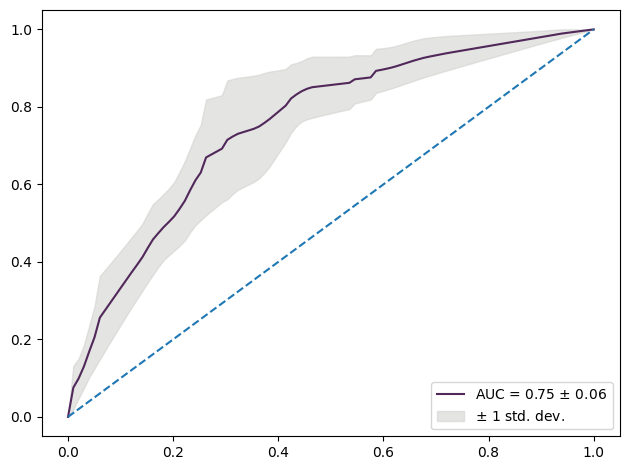

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

aucs = []
tprs = []
mean_fpr = np.linspace(0,1,100)
for i in range(5):
    test = pd.read_csv("test_set_pred_morgan_{}.csv".format(i))
    fpr, tpr, _ = metrics.roc_curve(test[BIN],test["proba1"])
    roc_auc = metrics.auc(fpr, tpr)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(
        mean_fpr,
        mean_tpr,
        color="#50285a",
        label=r"AUC = %0.2f $\pm$ %0.2f" % (mean_auc, std_auc),
    )
ax.plot([0, 1], [0, 1], ls="--")
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="#d2d2d0",
    alpha=0.6,
    label=r"$\pm$ 1 std. dev.",
    )
ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        )
ax.legend(loc="lower right")
ax.set_xlabel="1-Specificity (FPR)",
ax.set_ylabel="Sensitivity (TPR)",
plt.tight_layout()

## 8. Train an ML Model with Ersilia Compound Embeddings

In [20]:
import lazyqsar as lq

for i in range(5):
    train = pd.read_csv("train_set_{}.csv".format(i))
    test = pd.read_csv("test_set_{}.csv".format(i))
    smiles_train = train[SMILES]
    y_train = train[BIN]
    model = lq.ErsiliaBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
    model.fit(train[SMILES], train[BIN])
    y_hat = model.predict_proba(test[SMILES])
    test["proba1"] = y_hat[:,1]
    test.to_csv("test_set_pred_eosce_{}.csv".format(i))

[flaml.automl.logger: 09-26 15:31:35] {1679} INFO - task = classification
[flaml.automl.logger: 09-26 15:31:35] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-26 15:31:35] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-26 15:31:35] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost']
[flaml.automl.logger: 09-26 15:31:35] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 09-26 15:31:35] {2344} INFO - Estimated sufficient time budget=277s. Estimated necessary time budget=0s.
[flaml.automl.logger: 09-26 15:31:35] {2391} INFO -  at 0.0s,	estimator rf's best error=0.2302,	best estimator rf's best error=0.2302
[flaml.automl.logger: 09-26 15:31:35] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-26 15:31:35] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.0615,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:35] {2218} INFO - iteration 2, current learn

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:35] {2391} INFO -  at 0.3s,	estimator rf's best error=0.1111,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:35] {2218} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 09-26 15:31:35] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.0615,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:35] {2218} INFO - iteration 5, current learner rf
[flaml.automl.logger: 09-26 15:31:35] {2391} INFO -  at 0.5s,	estimator rf's best error=0.1111,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:35] {2218} INFO - iteration 6, current learner rf
[flaml.automl.logger: 09-26 15:31:35] {2391} INFO -  at 0.5s,	estimator rf's best error=0.1111,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:35] {2218} INFO - iteration 7, current learner rf
[flaml.automl.logger: 09-26 15:31:35] {2391} INFO -  at 0.6s,	estimator rf's best error=0.1111,	best estimator lgbm'

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:36] {2391} INFO -  at 1.3s,	estimator lgbm's best error=0.0615,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:36] {2218} INFO - iteration 17, current learner rf
[flaml.automl.logger: 09-26 15:31:36] {2391} INFO -  at 1.3s,	estimator rf's best error=0.1071,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:36] {2218} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 09-26 15:31:36] {2391} INFO -  at 1.4s,	estimator lgbm's best error=0.0615,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:36] {2218} INFO - iteration 19, current learner lgbm
[flaml.automl.logger: 09-26 15:31:36] {2391} INFO -  at 1.5s,	estimator lgbm's best error=0.0615,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:36] {2218} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 09-26 15:31:36] {2391} INFO -  at 1.6s,	estimator lgbm's best error=0.0615,	best e

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:37] {2391} INFO -  at 2.1s,	estimator xgboost's best error=0.1091,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:37] {2218} INFO - iteration 25, current learner lgbm
[flaml.automl.logger: 09-26 15:31:37] {2391} INFO -  at 2.1s,	estimator lgbm's best error=0.0615,	best estimator lgbm's best error=0.0615
[flaml.automl.logger: 09-26 15:31:37] {2218} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 09-26 15:31:37] {2391} INFO -  at 2.2s,	estimator lgbm's best error=0.0556,	best estimator lgbm's best error=0.0556
[flaml.automl.logger: 09-26 15:31:37] {2218} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 09-26 15:31:37] {2391} INFO -  at 2.4s,	estimator xgboost's best error=0.1091,	best estimator lgbm's best error=0.0556
[flaml.automl.logger: 09-26 15:31:37] {2218} INFO - iteration 28, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:37] {2391} INFO -  at 2.5s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:37] {2218} INFO - iteration 29, current learner xgboost
[flaml.automl.logger: 09-26 15:31:38] {2391} INFO -  at 2.7s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:38] {2218} INFO - iteration 30, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:38] {2391} INFO -  at 2.8s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:38] {2218} INFO - iteration 31, current learner xgboost
[flaml.automl.logger: 09-26 15:31:38] {2391} INFO -  at 2.9s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:38] {2218} INFO - iteration 32, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:38] {2391} INFO -  at 3.1s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:38] {2218} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 09-26 15:31:38] {2391} INFO -  at 3.3s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:38] {2218} INFO - iteration 34, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:38] {2391} INFO -  at 3.4s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:38] {2218} INFO - iteration 35, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:38] {2391} INFO -  at 3.5s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:38] {2218} INFO - iteration 36, current learner xgboost
[flaml.automl.logger: 09-26 15:31:38] {2391} INFO -  at 3.6s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:38] {2218} INFO - iteration 37, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:39] {2391} INFO -  at 3.8s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:39] {2218} INFO - iteration 38, current learner xgboost
[flaml.automl.logger: 09-26 15:31:39] {2391} INFO -  at 3.9s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:39] {2218} INFO - iteration 39, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:39] {2391} INFO -  at 4.0s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:39] {2218} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 09-26 15:31:39] {2391} INFO -  at 4.2s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:39] {2218} INFO - iteration 41, current learner rf
[flaml.automl.logger: 09-26 15:31:39] {2391} INFO -  at 4.2s,	estimator rf's best error=0.1071,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:39] {2218} INFO - iteration 42, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:39] {2391} INFO -  at 4.3s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:39] {2218} INFO - iteration 43, current learner xgboost
[flaml.automl.logger: 09-26 15:31:39] {2391} INFO -  at 4.5s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:39] {2218} INFO - iteration 44, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:39] {2391} INFO -  at 4.6s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:39] {2218} INFO - iteration 45, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:40] {2391} INFO -  at 4.9s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:40] {2218} INFO - iteration 46, current learner xgboost
[flaml.automl.logger: 09-26 15:31:40] {2391} INFO -  at 5.0s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:40] {2218} INFO - iteration 47, current learner rf
[flaml.automl.logger: 09-26 15:31:40] {2391} INFO -  at 5.1s,	estimator rf's best error=0.1071,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:40] {2218} INFO - iteration 48, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:40] {2391} INFO -  at 5.2s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:40] {2218} INFO - iteration 49, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:40] {2391} INFO -  at 5.4s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:40] {2218} INFO - iteration 50, current learner xgboost
[flaml.automl.logger: 09-26 15:31:40] {2391} INFO -  at 5.5s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:40] {2218} INFO - iteration 51, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:40] {2391} INFO -  at 5.7s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:40] {2218} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 09-26 15:31:41] {2391} INFO -  at 5.8s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:41] {2218} INFO - iteration 53, current learner rf
[flaml.automl.logger: 09-26 15:31:41] {2391} INFO -  at 5.8s,	estimator rf's best error=0.1071,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:41] {2218} INFO - iteration 54, current learner xgboost
[flaml.automl.logger: 09-26 15:31:41] {2391} INFO -  at 6.0s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:41] {2218} INFO - iteration 55, current learner lgbm
[flaml.automl.logger: 09-26 15:31:41] {2391} INFO -  at 6.1s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:41] {2218} INFO - iteration 56, current learner lgbm
[flaml.automl.logger: 09-26 15:31:42] {2391} INFO -  at 6.8s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:42] {2218} INFO - iteration 57, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:42] {2391} INFO -  at 7.4s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:42] {2218} INFO - iteration 58, current learner rf
[flaml.automl.logger: 09-26 15:31:42] {2391} INFO -  at 7.5s,	estimator rf's best error=0.1071,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:42] {2218} INFO - iteration 59, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:43] {2391} INFO -  at 8.5s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:43] {2218} INFO - iteration 60, current learner rf
[flaml.automl.logger: 09-26 15:31:43] {2391} INFO -  at 8.6s,	estimator rf's best error=0.1071,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:43] {2218} INFO - iteration 61, current learner xgboost
[flaml.automl.logger: 09-26 15:31:44] {2391} INFO -  at 8.7s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:44] {2218} INFO - iteration 62, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:44] {2391} INFO -  at 8.9s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:44] {2218} INFO - iteration 63, current learner rf
[flaml.automl.logger: 09-26 15:31:44] {2391} INFO -  at 8.9s,	estimator rf's best error=0.1071,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:44] {2218} INFO - iteration 64, current learner xgboost
[flaml.automl.logger: 09-26 15:31:44] {2391} INFO -  at 9.1s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:44] {2218} INFO - iteration 65, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:44] {2391} INFO -  at 9.3s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:44] {2218} INFO - iteration 66, current learner xgboost
[flaml.automl.logger: 09-26 15:31:44] {2391} INFO -  at 9.4s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:44] {2218} INFO - iteration 67, current learner rf
[flaml.automl.logger: 09-26 15:31:44] {2391} INFO -  at 9.4s,	estimator rf's best error=0.1071,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:44] {2218} INFO - iteration 68, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:44] {2391} INFO -  at 9.6s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:44] {2218} INFO - iteration 69, current learner xgboost
[flaml.automl.logger: 09-26 15:31:45] {2391} INFO -  at 9.7s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:45] {2218} INFO - iteration 70, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:45] {2391} INFO -  at 9.9s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:45] {2218} INFO - iteration 71, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:45] {2391} INFO -  at 10.1s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:45] {2218} INFO - iteration 72, current learner xgboost
[flaml.automl.logger: 09-26 15:31:45] {2391} INFO -  at 10.2s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:45] {2218} INFO - iteration 73, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:45] {2391} INFO -  at 10.3s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:45] {2218} INFO - iteration 74, current learner rf
[flaml.automl.logger: 09-26 15:31:45] {2391} INFO -  at 10.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:45] {2218} INFO - iteration 75, current learner rf
[flaml.automl.logger: 09-26 15:31:45] {2391} INFO -  at 10.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:45] {2218} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 09-26 15:31:45] {2391} INFO -  at 10.6s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:45] {2218} INFO - iteration 77, current learner rf
[flaml.automl.logger: 09-26 15:31:46] {2391} INFO -  at 10.7s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:46] {2391} INFO -  at 11.0s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:46] {2218} INFO - iteration 82, current learner lgbm
[flaml.automl.logger: 09-26 15:31:46] {2391} INFO -  at 11.1s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:46] {2218} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 09-26 15:31:46] {2391} INFO -  at 11.2s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:46] {2218} INFO - iteration 84, current learner rf
[flaml.automl.logger: 09-26 15:31:46] {2391} INFO -  at 11.3s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:46] {2218} INFO - iteration 85, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:46] {2391} INFO -  at 11.4s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:46] {2218} INFO - iteration 86, current learner rf
[flaml.automl.logger: 09-26 15:31:46] {2391} INFO -  at 11.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:46] {2218} INFO - iteration 87, current learner rf
[flaml.automl.logger: 09-26 15:31:46] {2391} INFO -  at 11.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:46] {2218} INFO - iteration 88, current learner xgboost
[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 11.7s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 89, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 11.8s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 90, current learner xgboost
[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 12.0s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 91, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 12.1s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 92, current learner rf
[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 12.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 93, current learner rf
[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 12.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 94, current learner xgboost
[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 12.3s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 95, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 12.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 96, current learner rf
[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 12.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 97, current learner rf
[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 12.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 98, current learner rf
[flaml.automl.logger: 09-26 15:31:47] {2391} INFO -  at 12.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:47] {2218} INFO - iteration 99, current learner xgboost
[flaml.automl.logger: 09-26 15:31:48] {2391} INFO -  at 12.7s,	estimator xgboost's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:48] {2391} INFO -  at 12.8s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:48] {2218} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 09-26 15:31:48] {2391} INFO -  at 13.0s,	estimator lgbm's best error=0.0556,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:48] {2218} INFO - iteration 103, current learner rf
[flaml.automl.logger: 09-26 15:31:48] {2391} INFO -  at 13.0s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:48] {2218} INFO - iteration 104, current learner rf
[flaml.automl.logger: 09-26 15:31:48] {2391} INFO -  at 13.1s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:48] {2218} INFO - iteration 105, current learner xgboost
[flaml.automl.logger: 09-26 15:31:48] {2391} INFO -  at 13.2s,	estimator xgboost's best

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:48] {2391} INFO -  at 13.5s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:48] {2218} INFO - iteration 108, current learner lgbm
[flaml.automl.logger: 09-26 15:31:48] {2391} INFO -  at 13.5s,	estimator lgbm's best error=0.0476,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:48] {2218} INFO - iteration 109, current learner rf
[flaml.automl.logger: 09-26 15:31:48] {2391} INFO -  at 13.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:48] {2218} INFO - iteration 110, current learner xgboost
[flaml.automl.logger: 09-26 15:31:49] {2391} INFO -  at 13.8s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:49] {2218} INFO - iteration 111, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:49] {2391} INFO -  at 13.9s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:49] {2218} INFO - iteration 112, current learner xgboost
[flaml.automl.logger: 09-26 15:31:49] {2391} INFO -  at 14.1s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:49] {2218} INFO - iteration 113, current learner rf
[flaml.automl.logger: 09-26 15:31:49] {2391} INFO -  at 14.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:49] {2218} INFO - iteration 114, current learner rf
[flaml.automl.logger: 09-26 15:31:49] {2391} INFO -  at 14.3s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:49] {2218} INFO - iteration 115, current learner xgboost
[flaml.automl.logger: 09-26 15:31:49] {2391} INFO -  at 14.4s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:49] {2218} INFO - iteration 116, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:49] {2391} INFO -  at 14.5s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:49] {2218} INFO - iteration 117, current learner rf
[flaml.automl.logger: 09-26 15:31:49] {2391} INFO -  at 14.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:49] {2218} INFO - iteration 118, current learner xgboost
[flaml.automl.logger: 09-26 15:31:50] {2391} INFO -  at 14.7s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:50] {2218} INFO - iteration 119, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:50] {2391} INFO -  at 14.9s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:50] {2218} INFO - iteration 120, current learner xgboost
[flaml.automl.logger: 09-26 15:31:50] {2391} INFO -  at 15.0s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:50] {2218} INFO - iteration 121, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:50] {2391} INFO -  at 15.1s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:50] {2218} INFO - iteration 122, current learner rf
[flaml.automl.logger: 09-26 15:31:50] {2391} INFO -  at 15.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:50] {2218} INFO - iteration 123, current learner rf
[flaml.automl.logger: 09-26 15:31:50] {2391} INFO -  at 15.3s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:50] {2218} INFO - iteration 124, current learner rf
[flaml.automl.logger: 09-26 15:31:50] {2391} INFO -  at 15.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:50] {2218} INFO - iteration 125, current learner rf
[flaml.automl.logger: 09-26 15:31:50] {2391} INFO -  at 15.4s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:51] {2391} INFO -  at 15.7s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:51] {2218} INFO - iteration 128, current learner lgbm
[flaml.automl.logger: 09-26 15:31:51] {2391} INFO -  at 15.8s,	estimator lgbm's best error=0.0397,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:51] {2218} INFO - iteration 129, current learner lgbm
[flaml.automl.logger: 09-26 15:31:51] {2391} INFO -  at 16.0s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:51] {2218} INFO - iteration 130, current learner lgbm
[flaml.automl.logger: 09-26 15:31:51] {2391} INFO -  at 16.1s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:51] {2218} INFO - iteration 131, current learner lgbm
[flaml.automl.logger: 09-26 15:31:51] {2391} INFO -  at 16.2s,	estimator lgbm

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:51] {2391} INFO -  at 16.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:51] {2218} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 16.7s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:52] {2218} INFO - iteration 138, current learner rf
[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 16.8s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:52] {2218} INFO - iteration 139, current learner xgboost
[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 16.9s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:52] {2218} INFO - iteration 140, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 17.0s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:52] {2218} INFO - iteration 141, current learner xgboost
[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 17.2s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:52] {2218} INFO - iteration 142, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 17.3s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:52] {2218} INFO - iteration 143, current learner lgbm
[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 17.4s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:52] {2218} INFO - iteration 144, current learner rf
[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 17.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:52] {2218} INFO - iteration 145, current learner rf
[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 17.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:52] {2218} INFO - iteration 146, current learner rf
[flaml.automl.logger: 09-26 15:31:52] {2391} INFO -  at 17.6s,	estimator rf's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:53] {2391} INFO -  at 18.3s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:53] {2218} INFO - iteration 156, current learner rf
[flaml.automl.logger: 09-26 15:31:53] {2391} INFO -  at 18.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:53] {2218} INFO - iteration 157, current learner rf
[flaml.automl.logger: 09-26 15:31:53] {2391} INFO -  at 18.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:53] {2218} INFO - iteration 158, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:55] {2391} INFO -  at 20.0s,	estimator xgboost's best error=0.0258,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:55] {2218} INFO - iteration 159, current learner rf
[flaml.automl.logger: 09-26 15:31:55] {2391} INFO -  at 20.1s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:55] {2218} INFO - iteration 160, current learner lgbm
[flaml.automl.logger: 09-26 15:31:56] {2391} INFO -  at 20.8s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0258
[flaml.automl.logger: 09-26 15:31:56] {2218} INFO - iteration 161, current learner xgboost
[flaml.automl.logger: 09-26 15:31:56] {2391} INFO -  at 21.0s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:56] {2218} INFO - iteration 162, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:56] {2391} INFO -  at 21.1s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:56] {2218} INFO - iteration 163, current learner rf
[flaml.automl.logger: 09-26 15:31:56] {2391} INFO -  at 21.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:56] {2218} INFO - iteration 164, current learner lgbm
[flaml.automl.logger: 09-26 15:31:56] {2391} INFO -  at 21.3s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:56] {2218} INFO - iteration 165, current learner xgboost
[flaml.automl.logger: 09-26 15:31:56] {2391} INFO -  at 21.4s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:56] {2218} INFO - iteration 166, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:56] {2391} INFO -  at 21.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:56] {2218} INFO - iteration 167, current learner rf
[flaml.automl.logger: 09-26 15:31:57] {2391} INFO -  at 21.7s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:57] {2218} INFO - iteration 168, current learner rf
[flaml.automl.logger: 09-26 15:31:57] {2391} INFO -  at 21.8s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:57] {2218} INFO - iteration 169, current learner rf
[flaml.automl.logger: 09-26 15:31:57] {2391} INFO -  at 21.9s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:57] {2218} INFO - iteration 170, current learner lgbm
[flaml.automl.logger: 09-26 15:31:57] {2391} INFO -  at 22.0s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:57] {2391} INFO -  at 22.3s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:57] {2218} INFO - iteration 173, current learner rf
[flaml.automl.logger: 09-26 15:31:57] {2391} INFO -  at 22.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:57] {2218} INFO - iteration 174, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:57] {2391} INFO -  at 22.6s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:57] {2218} INFO - iteration 175, current learner xgboost
[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 22.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:58] {2218} INFO - iteration 176, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 22.8s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:58] {2218} INFO - iteration 177, current learner lgbm
[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 22.9s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:58] {2218} INFO - iteration 178, current learner xgboost
[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 23.0s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:58] {2218} INFO - iteration 179, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 23.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:58] {2218} INFO - iteration 180, current learner rf
[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 23.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:58] {2218} INFO - iteration 181, current learner rf
[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 23.3s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:58] {2218} INFO - iteration 182, current learner lgbm
[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 23.4s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:58] {2218} INFO - iteration 183, current learner xgboost
[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 23.5s,	estimator xgboost's

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:58] {2391} INFO -  at 23.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:58] {2218} INFO - iteration 186, current learner rf
[flaml.automl.logger: 09-26 15:31:59] {2391} INFO -  at 23.7s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:59] {2218} INFO - iteration 187, current learner rf
[flaml.automl.logger: 09-26 15:31:59] {2391} INFO -  at 23.8s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:59] {2218} INFO - iteration 188, current learner xgboost
[flaml.automl.logger: 09-26 15:31:59] {2391} INFO -  at 23.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:59] {2218} INFO - iteration 189, current learner rf
[flaml.automl.logger: 09-26 15:31:59] {2391} INFO -  at 24.0s,	estimator rf's bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:59] {2391} INFO -  at 24.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:59] {2218} INFO - iteration 191, current learner lgbm
[flaml.automl.logger: 09-26 15:31:59] {2391} INFO -  at 24.3s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:59] {2218} INFO - iteration 192, current learner xgboost
[flaml.automl.logger: 09-26 15:31:59] {2391} INFO -  at 24.4s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:59] {2218} INFO - iteration 193, current learner rf
[flaml.automl.logger: 09-26 15:31:59] {2391} INFO -  at 24.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:31:59] {2218} INFO - iteration 194, current learner rf
[flaml.automl.logger: 09-26 15:31:59] {2391} INFO -  at 24.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:31:59] {2218} INFO - iteration 195, current learner xgboost
[flaml.automl.logger: 09-26 15:32:00] {2391} INFO -  at 24.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:00] {2218} INFO - iteration 196, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:00] {2391} INFO -  at 24.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:00] {2218} INFO - iteration 197, current learner xgboost
[flaml.automl.logger: 09-26 15:32:00] {2391} INFO -  at 25.0s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:00] {2218} INFO - iteration 198, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:00] {2391} INFO -  at 25.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:00] {2218} INFO - iteration 199, current learner rf
[flaml.automl.logger: 09-26 15:32:00] {2391} INFO -  at 25.3s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:00] {2218} INFO - iteration 200, current learner rf
[flaml.automl.logger: 09-26 15:32:00] {2391} INFO -  at 25.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:00] {2218} INFO - iteration 201, current learner xgboost
[flaml.automl.logger: 09-26 15:32:00] {2391} INFO -  at 25.5s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:00] {2218} INFO - iteration 202, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:00] {2391} INFO -  at 25.6s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:00] {2218} INFO - iteration 203, current learner xgboost
[flaml.automl.logger: 09-26 15:32:01] {2391} INFO -  at 25.8s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:01] {2218} INFO - iteration 204, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:01] {2391} INFO -  at 25.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:01] {2218} INFO - iteration 205, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:01] {2391} INFO -  at 26.3s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:01] {2218} INFO - iteration 206, current learner xgboost
[flaml.automl.logger: 09-26 15:32:01] {2391} INFO -  at 26.4s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:01] {2218} INFO - iteration 207, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:01] {2391} INFO -  at 26.6s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:01] {2218} INFO - iteration 208, current learner lgbm
[flaml.automl.logger: 09-26 15:32:01] {2391} INFO -  at 26.6s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:01] {2218} INFO - iteration 209, current learner xgboost
[flaml.automl.logger: 09-26 15:32:02] {2391} INFO -  at 26.8s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:02] {2218} INFO - iteration 210, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:02] {2391} INFO -  at 26.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:02] {2218} INFO - iteration 211, current learner xgboost
[flaml.automl.logger: 09-26 15:32:02] {2391} INFO -  at 27.1s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:02] {2218} INFO - iteration 212, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:02] {2391} INFO -  at 27.3s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:02] {2218} INFO - iteration 213, current learner lgbm
[flaml.automl.logger: 09-26 15:32:02] {2391} INFO -  at 27.4s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:02] {2218} INFO - iteration 214, current learner xgboost
[flaml.automl.logger: 09-26 15:32:02] {2391} INFO -  at 27.5s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:02] {2218} INFO - iteration 215, current learner rf
[flaml.automl.logger: 09-26 15:32:02] {2391} INFO -  at 27.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:02] {2218} INFO - iteration 216, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:02] {2391} INFO -  at 27.7s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:02] {2218} INFO - iteration 217, current learner rf
[flaml.automl.logger: 09-26 15:32:03] {2391} INFO -  at 27.8s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:03] {2218} INFO - iteration 218, current learner xgboost
[flaml.automl.logger: 09-26 15:32:03] {2391} INFO -  at 27.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:03] {2218} INFO - iteration 219, current learner rf
[flaml.automl.logger: 09-26 15:32:03] {2391} INFO -  at 28.0s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:03] {2218} INFO - iteration 220, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:03] {2391} INFO -  at 28.1s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:03] {2218} INFO - iteration 221, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:03] {2391} INFO -  at 28.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:03] {2218} INFO - iteration 222, current learner rf
[flaml.automl.logger: 09-26 15:32:03] {2391} INFO -  at 28.3s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:03] {2218} INFO - iteration 223, current learner rf
[flaml.automl.logger: 09-26 15:32:03] {2391} INFO -  at 28.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:03] {2218} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 09-26 15:32:03] {2391} INFO -  at 28.4s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:03] {2218} INFO - iteration 225, current learner rf
[flaml.automl.logger: 09-26 15:32:03] {2391} INFO -  at 28.5s,	estimator rf's best erro

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:04] {2391} INFO -  at 28.8s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:04] {2218} INFO - iteration 228, current learner xgboost
[flaml.automl.logger: 09-26 15:32:04] {2391} INFO -  at 28.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:04] {2218} INFO - iteration 229, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:04] {2391} INFO -  at 29.1s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:04] {2218} INFO - iteration 230, current learner xgboost
[flaml.automl.logger: 09-26 15:32:04] {2391} INFO -  at 29.3s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:04] {2218} INFO - iteration 231, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:04] {2391} INFO -  at 29.5s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:04] {2218} INFO - iteration 232, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:05] {2391} INFO -  at 29.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:05] {2218} INFO - iteration 233, current learner lgbm
[flaml.automl.logger: 09-26 15:32:05] {2391} INFO -  at 29.9s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:05] {2218} INFO - iteration 234, current learner xgboost
[flaml.automl.logger: 09-26 15:32:05] {2391} INFO -  at 30.0s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:05] {2218} INFO - iteration 235, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:05] {2391} INFO -  at 30.1s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:05] {2218} INFO - iteration 236, current learner rf
[flaml.automl.logger: 09-26 15:32:05] {2391} INFO -  at 30.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:05] {2218} INFO - iteration 237, current learner xgboost
[flaml.automl.logger: 09-26 15:32:05] {2391} INFO -  at 30.4s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:05] {2218} INFO - iteration 238, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:05] {2391} INFO -  at 30.5s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:05] {2218} INFO - iteration 239, current learner rf
[flaml.automl.logger: 09-26 15:32:05] {2391} INFO -  at 30.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:05] {2218} INFO - iteration 240, current learner xgboost
[flaml.automl.logger: 09-26 15:32:05] {2391} INFO -  at 30.6s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:05] {2218} INFO - iteration 241, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:06] {2391} INFO -  at 30.8s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:06] {2218} INFO - iteration 242, current learner xgboost
[flaml.automl.logger: 09-26 15:32:06] {2391} INFO -  at 30.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:06] {2218} INFO - iteration 243, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:06] {2391} INFO -  at 31.0s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:06] {2218} INFO - iteration 244, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:07] {2391} INFO -  at 32.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:07] {2218} INFO - iteration 245, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:08] {2391} INFO -  at 33.3s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:08] {2218} INFO - iteration 246, current learner rf
[flaml.automl.logger: 09-26 15:32:08] {2391} INFO -  at 33.3s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:08] {2218} INFO - iteration 247, current learner xgboost
[flaml.automl.logger: 09-26 15:32:08] {2391} INFO -  at 33.5s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:08] {2218} INFO - iteration 248, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:08] {2391} INFO -  at 33.6s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:08] {2218} INFO - iteration 249, current learner rf
[flaml.automl.logger: 09-26 15:32:09] {2391} INFO -  at 33.7s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:09] {2218} INFO - iteration 250, current learner lgbm
[flaml.automl.logger: 09-26 15:32:09] {2391} INFO -  at 33.8s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:09] {2218} INFO - iteration 251, current learner xgboost
[flaml.automl.logger: 09-26 15:32:09] {2391} INFO -  at 34.0s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:09] {2218} INFO - iteration 252, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:09] {2391} INFO -  at 34.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:09] {2218} INFO - iteration 253, current learner rf
[flaml.automl.logger: 09-26 15:32:09] {2391} INFO -  at 34.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:09] {2218} INFO - iteration 254, current learner xgboost
[flaml.automl.logger: 09-26 15:32:09] {2391} INFO -  at 34.3s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:09] {2218} INFO - iteration 255, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:09] {2391} INFO -  at 34.5s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:09] {2218} INFO - iteration 256, current learner xgboost
[flaml.automl.logger: 09-26 15:32:09] {2391} INFO -  at 34.6s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:09] {2218} INFO - iteration 257, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:10] {2391} INFO -  at 34.8s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:10] {2218} INFO - iteration 258, current learner xgboost
[flaml.automl.logger: 09-26 15:32:10] {2391} INFO -  at 35.0s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:10] {2218} INFO - iteration 259, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:10] {2391} INFO -  at 35.1s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:10] {2218} INFO - iteration 260, current learner xgboost
[flaml.automl.logger: 09-26 15:32:10] {2391} INFO -  at 35.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:10] {2218} INFO - iteration 261, current learner rf
[flaml.automl.logger: 09-26 15:32:10] {2391} INFO -  at 35.3s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:10] {2218} INFO - iteration 262, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:10] {2391} INFO -  at 35.5s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:10] {2218} INFO - iteration 263, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:11] {2391} INFO -  at 35.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:11] {2218} INFO - iteration 264, current learner xgboost
[flaml.automl.logger: 09-26 15:32:11] {2391} INFO -  at 35.8s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:11] {2218} INFO - iteration 265, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:11] {2391} INFO -  at 36.0s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:11] {2218} INFO - iteration 266, current learner xgboost
[flaml.automl.logger: 09-26 15:32:11] {2391} INFO -  at 36.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:11] {2218} INFO - iteration 267, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:11] {2391} INFO -  at 36.3s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:11] {2218} INFO - iteration 268, current learner lgbm
[flaml.automl.logger: 09-26 15:32:11] {2391} INFO -  at 36.4s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:11] {2218} INFO - iteration 269, current learner xgboost
[flaml.automl.logger: 09-26 15:32:11] {2391} INFO -  at 36.6s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:11] {2218} INFO - iteration 270, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:12] {2391} INFO -  at 36.7s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:12] {2218} INFO - iteration 271, current learner lgbm
[flaml.automl.logger: 09-26 15:32:12] {2391} INFO -  at 36.8s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:12] {2218} INFO - iteration 272, current learner lgbm
[flaml.automl.logger: 09-26 15:32:12] {2391} INFO -  at 36.9s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:12] {2218} INFO - iteration 273, current learner lgbm
[flaml.automl.logger: 09-26 15:32:12] {2391} INFO -  at 37.0s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:12] {2218} INFO - iteration 274, current learner rf
[flaml.automl.logger: 09-26 15:32:12] {2391} INFO -  at 37.0s,	estimator rf's best

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:12] {2391} INFO -  at 37.2s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:12] {2218} INFO - iteration 277, current learner xgboost
[flaml.automl.logger: 09-26 15:32:12] {2391} INFO -  at 37.4s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:12] {2218} INFO - iteration 278, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:12] {2391} INFO -  at 37.5s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:12] {2218} INFO - iteration 279, current learner rf
[flaml.automl.logger: 09-26 15:32:12] {2391} INFO -  at 37.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:12] {2218} INFO - iteration 280, current learner lgbm
[flaml.automl.logger: 09-26 15:32:13] {2391} INFO -  at 37.7s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:13] {2218} INFO - iteration 281, current learner lgbm
[flaml.automl.logger: 09-26 15:32:13] {2391} INFO -  at 37.8s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:13] {2218} INFO - iteration 282, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:13] {2391} INFO -  at 38.1s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:13] {2218} INFO - iteration 283, current learner xgboost
[flaml.automl.logger: 09-26 15:32:13] {2391} INFO -  at 38.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:13] {2218} INFO - iteration 284, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:13] {2391} INFO -  at 38.3s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:13] {2218} INFO - iteration 285, current learner xgboost
[flaml.automl.logger: 09-26 15:32:13] {2391} INFO -  at 38.4s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:13] {2218} INFO - iteration 286, current learner rf
[flaml.automl.logger: 09-26 15:32:13] {2391} INFO -  at 38.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:13] {2218} INFO - iteration 287, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:13] {2391} INFO -  at 38.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:13] {2218} INFO - iteration 288, current learner xgboost
[flaml.automl.logger: 09-26 15:32:14] {2391} INFO -  at 38.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:14] {2218} INFO - iteration 289, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:14] {2391} INFO -  at 38.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:14] {2218} INFO - iteration 290, current learner xgboost
[flaml.automl.logger: 09-26 15:32:14] {2391} INFO -  at 39.0s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:14] {2218} INFO - iteration 291, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:14] {2391} INFO -  at 39.1s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:14] {2218} INFO - iteration 292, current learner xgboost
[flaml.automl.logger: 09-26 15:32:14] {2391} INFO -  at 39.3s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:14] {2218} INFO - iteration 293, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:14] {2391} INFO -  at 39.5s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:14] {2218} INFO - iteration 294, current learner xgboost
[flaml.automl.logger: 09-26 15:32:14] {2391} INFO -  at 39.6s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:14] {2218} INFO - iteration 295, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:15] {2391} INFO -  at 39.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:15] {2218} INFO - iteration 296, current learner lgbm
[flaml.automl.logger: 09-26 15:32:15] {2391} INFO -  at 39.8s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:15] {2218} INFO - iteration 297, current learner lgbm
[flaml.automl.logger: 09-26 15:32:15] {2391} INFO -  at 39.9s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:15] {2218} INFO - iteration 298, current learner rf
[flaml.automl.logger: 09-26 15:32:15] {2391} INFO -  at 40.0s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:15] {2218} INFO - iteration 299, current learner lgbm
[flaml.automl.logger: 09-26 15:32:15] {2391} INFO -  at 40.1s,	estimator lgbm's b

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:15] {2391} INFO -  at 40.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:15] {2218} INFO - iteration 303, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:15] {2391} INFO -  at 40.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:15] {2218} INFO - iteration 304, current learner xgboost
[flaml.automl.logger: 09-26 15:32:16] {2391} INFO -  at 40.8s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:16] {2218} INFO - iteration 305, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:16] {2391} INFO -  at 40.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:16] {2218} INFO - iteration 306, current learner xgboost
[flaml.automl.logger: 09-26 15:32:16] {2391} INFO -  at 41.1s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:16] {2218} INFO - iteration 307, current learner rf
[flaml.automl.logger: 09-26 15:32:16] {2391} INFO -  at 41.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:16] {2218} INFO - iteration 308, current learner lgbm
[flaml.automl.logger: 09-26 15:32:16] {2391} INFO -  at 41.3s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:16] {2218} INFO - iteration 309, current learner lgbm
[flaml.automl.logger: 09-26 15:32:16] {2391} INFO -  at 41.4s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:16] {2218} INFO - iteration 310, current learner rf
[flaml.automl.logger: 09-26 15:32:16] {2391} INFO -  at 41.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:16] {2218} INFO - iteration 311, current learner xgboo

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 41.7s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:17] {2218} INFO - iteration 313, current learner xgboost
[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 41.8s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:17] {2218} INFO - iteration 314, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 42.0s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:17] {2218} INFO - iteration 315, current learner rf
[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 42.1s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:17] {2218} INFO - iteration 316, current learner rf
[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 42.1s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:17] {2218} INFO - iteration 317, current learner rf
[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 42.2s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:17] {2218} INFO - iteration 318, current learner xgboost
[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 42.3s,	estimator xgboost's bes

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 42.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:17] {2218} INFO - iteration 321, current learner rf
[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 42.5s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:17] {2218} INFO - iteration 322, current learner xgboost
[flaml.automl.logger: 09-26 15:32:17] {2391} INFO -  at 42.7s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:17] {2218} INFO - iteration 323, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:18] {2391} INFO -  at 42.8s,	estimator lgbm's best error=0.0357,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:18] {2218} INFO - iteration 324, current learner xgboost
[flaml.automl.logger: 09-26 15:32:18] {2391} INFO -  at 42.9s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:18] {2218} INFO - iteration 325, current learner rf
[flaml.automl.logger: 09-26 15:32:18] {2391} INFO -  at 43.0s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:18] {2218} INFO - iteration 326, current learner rf
[flaml.automl.logger: 09-26 15:32:18] {2391} INFO -  at 43.1s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:18] {2218} INFO - iteration 327, current learner xgboost
[flaml.automl.logger: 09-26 15:32:18] {2391} INFO -  at 43.2s,	estimator xgboost's best error=0.0139,	best estimator xgboost's best error=0.0139
[flaml.automl.logger: 09-26 15:32:18] {2218} INFO - iteration 328, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:19] {2391} INFO -  at 44.5s,	estimator lgbm's best error=0.0079,	best estimator lgbm's best error=0.0079
[flaml.automl.logger: 09-26 15:32:19] {2218} INFO - iteration 329, current learner rf
[flaml.automl.logger: 09-26 15:32:19] {2391} INFO -  at 44.6s,	estimator rf's best error=0.0754,	best estimator lgbm's best error=0.0079
[flaml.automl.logger: 09-26 15:32:19] {2218} INFO - iteration 330, current learner lgbm
[flaml.automl.logger: 09-26 15:32:20] {2391} INFO -  at 44.8s,	estimator lgbm's best error=0.0079,	best estimator lgbm's best error=0.0079
[flaml.automl.logger: 09-26 15:32:20] {2218} INFO - iteration 331, current learner lgbm
[flaml.automl.logger: 09-26 15:32:20] {2391} INFO -  at 45.4s,	estimator lgbm's best error=0.0079,	best estimator lgbm's best error=0.0079
[flaml.automl.logger: 09-26 15:32:20] {2218} INFO - iteration 332, current learner lgbm
[flaml.automl.logger: 09-26 15:32:21] {2391} INFO -  at 45.8s,	estimator lgbm's best error=0.007

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:22] {2391} INFO -  at 47.0s,	estimator xgboost's best error=0.0139,	best estimator lgbm's best error=0.0079
[flaml.automl.logger: 09-26 15:32:22] {2218} INFO - iteration 342, current learner lgbm
[flaml.automl.logger: 09-26 15:32:22] {2391} INFO -  at 47.3s,	estimator lgbm's best error=0.0079,	best estimator lgbm's best error=0.0079
[flaml.automl.logger: 09-26 15:32:22] {2218} INFO - iteration 343, current learner xgboost
[flaml.automl.logger: 09-26 15:32:22] {2391} INFO -  at 47.3s,	estimator xgboost's best error=0.0139,	best estimator lgbm's best error=0.0079
[flaml.automl.logger: 09-26 15:32:22] {2218} INFO - iteration 344, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:22] {2391} INFO -  at 47.5s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:22] {2218} INFO - iteration 345, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:23] {2391} INFO -  at 47.9s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:23] {2218} INFO - iteration 346, current learner xgboost
[flaml.automl.logger: 09-26 15:32:23] {2391} INFO -  at 48.0s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:23] {2218} INFO - iteration 347, current learner rf
[flaml.automl.logger: 09-26 15:32:23] {2391} INFO -  at 48.0s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:23] {2218} INFO - iteration 348, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:23] {2391} INFO -  at 48.3s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:23] {2218} INFO - iteration 349, current learner lgbm
[flaml.automl.logger: 09-26 15:32:23] {2391} INFO -  at 48.4s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:23] {2218} INFO - iteration 350, current learner lgbm
[flaml.automl.logger: 09-26 15:32:23] {2391} INFO -  at 48.6s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:23] {2218} INFO - iteration 351, current learner xgboost
[flaml.automl.logger: 09-26 15:32:24] {2391} INFO -  at 48.7s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:24] {2218} INFO - iteration 352, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:24] {2391} INFO -  at 48.8s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:24] {2218} INFO - iteration 353, current learner xgboost
[flaml.automl.logger: 09-26 15:32:24] {2391} INFO -  at 49.0s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:24] {2218} INFO - iteration 354, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:24] {2391} INFO -  at 49.1s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:24] {2218} INFO - iteration 355, current learner lgbm
[flaml.automl.logger: 09-26 15:32:24] {2391} INFO -  at 49.2s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:24] {2218} INFO - iteration 356, current learner lgbm
[flaml.automl.logger: 09-26 15:32:24] {2391} INFO -  at 49.4s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:24] {2218} INFO - iteration 357, current learner lgbm
[flaml.automl.logger: 09-26 15:32:24] {2391} INFO -  at 49.5s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:24] {2218} INFO - iteration 358, current learner lgbm
[flaml.automl.logger: 09-26 15:32:24] {2391} INFO -  at 49.7s,	estimator lgbm's 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:25] {2391} INFO -  at 49.9s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:25] {2218} INFO - iteration 360, current learner lgbm
[flaml.automl.logger: 09-26 15:32:25] {2391} INFO -  at 50.0s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:25] {2218} INFO - iteration 361, current learner xgboost
[flaml.automl.logger: 09-26 15:32:25] {2391} INFO -  at 50.2s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:25] {2218} INFO - iteration 362, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:25] {2391} INFO -  at 50.4s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:25] {2218} INFO - iteration 363, current learner lgbm
[flaml.automl.logger: 09-26 15:32:25] {2391} INFO -  at 50.5s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:25] {2218} INFO - iteration 364, current learner lgbm
[flaml.automl.logger: 09-26 15:32:25] {2391} INFO -  at 50.7s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:25] {2218} INFO - iteration 365, current learner xgboost
[flaml.automl.logger: 09-26 15:32:26] {2391} INFO -  at 50.8s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:26] {2218} INFO - iteration 366, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:26] {2391} INFO -  at 51.0s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:26] {2218} INFO - iteration 367, current learner xgboost
[flaml.automl.logger: 09-26 15:32:26] {2391} INFO -  at 51.2s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:26] {2218} INFO - iteration 368, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:26] {2391} INFO -  at 51.3s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:26] {2218} INFO - iteration 369, current learner xgboost
[flaml.automl.logger: 09-26 15:32:26] {2391} INFO -  at 51.5s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:26] {2218} INFO - iteration 370, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:26] {2391} INFO -  at 51.6s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:26] {2218} INFO - iteration 371, current learner lgbm
[flaml.automl.logger: 09-26 15:32:27] {2391} INFO -  at 51.8s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:27] {2218} INFO - iteration 372, current learner lgbm
[flaml.automl.logger: 09-26 15:32:27] {2391} INFO -  at 52.0s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:27] {2218} INFO - iteration 373, current learner lgbm
[flaml.automl.logger: 09-26 15:32:27] {2391} INFO -  at 52.1s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:27] {2218} INFO - iteration 374, current learner rf
[flaml.automl.logger: 09-26 15:32:27] {2391} INFO -  at 52.2s,	estimator rf's best

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:28] {2391} INFO -  at 53.0s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:28] {2218} INFO - iteration 381, current learner lgbm
[flaml.automl.logger: 09-26 15:32:28] {2391} INFO -  at 53.1s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:28] {2218} INFO - iteration 382, current learner lgbm
[flaml.automl.logger: 09-26 15:32:28] {2391} INFO -  at 53.3s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:28] {2218} INFO - iteration 383, current learner lgbm
[flaml.automl.logger: 09-26 15:32:28] {2391} INFO -  at 53.4s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:28] {2218} INFO - iteration 384, current learner lgbm
[flaml.automl.logger: 09-26 15:32:28] {2391} INFO -  at 53.6s,	estimator lgbm's 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:29] {2391} INFO -  at 53.8s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:29] {2218} INFO - iteration 386, current learner lgbm
[flaml.automl.logger: 09-26 15:32:29] {2391} INFO -  at 54.0s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:29] {2218} INFO - iteration 387, current learner lgbm
[flaml.automl.logger: 09-26 15:32:29] {2391} INFO -  at 54.1s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:29] {2218} INFO - iteration 388, current learner lgbm
[flaml.automl.logger: 09-26 15:32:29] {2391} INFO -  at 54.2s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:29] {2218} INFO - iteration 389, current learner lgbm
[flaml.automl.logger: 09-26 15:32:29] {2391} INFO -  at 54.3s,	estimator lgbm

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:30] {2391} INFO -  at 55.4s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:30] {2218} INFO - iteration 396, current learner rf
[flaml.automl.logger: 09-26 15:32:30] {2391} INFO -  at 55.4s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:30] {2218} INFO - iteration 397, current learner lgbm
[flaml.automl.logger: 09-26 15:32:30] {2391} INFO -  at 55.6s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:30] {2218} INFO - iteration 398, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:31] {2391} INFO -  at 55.9s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:31] {2218} INFO - iteration 399, current learner lgbm
[flaml.automl.logger: 09-26 15:32:33] {2391} INFO -  at 57.9s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:33] {2218} INFO - iteration 400, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:33] {2391} INFO -  at 58.2s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:33] {2218} INFO - iteration 401, current learner lgbm
[flaml.automl.logger: 09-26 15:32:33] {2391} INFO -  at 58.4s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:33] {2218} INFO - iteration 402, current learner lgbm
[flaml.automl.logger: 09-26 15:32:33] {2391} INFO -  at 58.5s,	estimator lgbm's best error=0.0079,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:33] {2218} INFO - iteration 403, current learner xgboost
[flaml.automl.logger: 09-26 15:32:33] {2391} INFO -  at 58.6s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:33] {2218} INFO - iteration 404, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:34] {2391} INFO -  at 58.9s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:34] {2218} INFO - iteration 405, current learner rf
[flaml.automl.logger: 09-26 15:32:34] {2391} INFO -  at 59.0s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:34] {2218} INFO - iteration 406, current learner xgboost
[flaml.automl.logger: 09-26 15:32:34] {2391} INFO -  at 59.1s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:34] {2218} INFO - iteration 407, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:34] {2391} INFO -  at 59.4s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:34] {2218} INFO - iteration 408, current learner xgboost
[flaml.automl.logger: 09-26 15:32:34] {2391} INFO -  at 59.6s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:34] {2218} INFO - iteration 409, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:34] {2391} INFO -  at 59.6s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:34] {2218} INFO - iteration 410, current learner rf
[flaml.automl.logger: 09-26 15:32:35] {2391} INFO -  at 59.7s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:35] {2218} INFO - iteration 411, current learner rf
[flaml.automl.logger: 09-26 15:32:35] {2391} INFO -  at 59.8s,	estimator rf's best error=0.0754,	best estimator xgboost's best error=0.0040
[flaml.automl.logger: 09-26 15:32:35] {2218} INFO - iteration 412, current learner xgboost
[flaml.automl.logger: 09-26 15:32:35] {2391} INFO -  at 59.9s,	estimator xgboost's best error=0.0040,	best estimator xgboost's best error=0.0040


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:35] {2627} INFO - retrain xgboost for 0.2s
[flaml.automl.logger: 09-26 15:32:35] {2630} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.7537124507291366, colsample_bynode=None,
              colsample_bytree=0.9224977708791436, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06598569096967788, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=5,
              min_child_weight=0.1908285957948043, missing=nan,
              monotone_constraints=None, n_estimators=4, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
[flaml.automl.logger: 09-26 15:32:35

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:36] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.3056,	best estimator rf's best error=0.2817
[flaml.automl.logger: 09-26 15:32:36] {2218} INFO - iteration 5, current learner rf
[flaml.automl.logger: 09-26 15:32:36] {2391} INFO -  at 0.5s,	estimator rf's best error=0.2817,	best estimator rf's best error=0.2817
[flaml.automl.logger: 09-26 15:32:36] {2218} INFO - iteration 6, current learner rf
[flaml.automl.logger: 09-26 15:32:36] {2391} INFO -  at 0.6s,	estimator rf's best error=0.2599,	best estimator rf's best error=0.2599
[flaml.automl.logger: 09-26 15:32:36] {2218} INFO - iteration 7, current learner rf
[flaml.automl.logger: 09-26 15:32:36] {2391} INFO -  at 0.6s,	estimator rf's best error=0.2599,	best estimator rf's best error=0.2599
[flaml.automl.logger: 09-26 15:32:36] {2218} INFO - iteration 8, current learner rf
[flaml.automl.logger: 09-26 15:32:36] {2391} INFO -  at 0.7s,	estimator rf's best error=0.2599,	best estimator rf's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:37] {2218} INFO - iteration 14, current learner rf
[flaml.automl.logger: 09-26 15:32:37] {2391} INFO -  at 1.2s,	estimator rf's best error=0.2143,	best estimator rf's best error=0.2143
[flaml.automl.logger: 09-26 15:32:37] {2218} INFO - iteration 15, current learner rf
[flaml.automl.logger: 09-26 15:32:37] {2391} INFO -  at 1.2s,	estimator rf's best error=0.2143,	best estimator rf's best error=0.2143
[flaml.automl.logger: 09-26 15:32:37] {2218} INFO - iteration 16, current learner xgboost
[flaml.automl.logger: 09-26 15:32:37] {2391} INFO -  at 1.4s,	estimator xgboost's best error=0.3671,	best estimator rf's best error=0.2143
[flaml.automl.logger: 09-26 15:32:37] {2218} INFO - iteration 17, current learner rf
[flaml.automl.logger: 09-26 15:32:37] {2391} INFO -  at 1.4s,	estimator rf's best error=0.2143,	best estimator rf's best error=0.2143
[flaml.automl.logger: 09-26 15:32:37] {2218} INFO - iteration 18, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:37] {2391} INFO -  at 1.5s,	estimator rf's best error=0.1865,	best estimator rf's best error=0.1865
[flaml.automl.logger: 09-26 15:32:37] {2218} INFO - iteration 19, current learner rf
[flaml.automl.logger: 09-26 15:32:37] {2391} INFO -  at 1.5s,	estimator rf's best error=0.1865,	best estimator rf's best error=0.1865
[flaml.automl.logger: 09-26 15:32:37] {2218} INFO - iteration 20, current learner rf
[flaml.automl.logger: 09-26 15:32:37] {2391} INFO -  at 1.6s,	estimator rf's best error=0.1468,	best estimator rf's best error=0.1468
[flaml.automl.logger: 09-26 15:32:37] {2218} INFO - iteration 21, current learner rf
[flaml.automl.logger: 09-26 15:32:37] {2391} INFO -  at 1.7s,	estimator rf's best error=0.1468,	best estimator rf's best error=0.1468
[flaml.automl.logger: 09-26 15:32:37] {2218} INFO - iteration 22, current learner rf
[flaml.automl.logger: 09-26 15:32:37] {2391} INFO -  at 1.7s,	estimator rf's best error=0.1429,	best estimator rf's best err

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:38] {2391} INFO -  at 2.8s,	estimator xgboost's best error=0.2063,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:38] {2218} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 09-26 15:32:38] {2391} INFO -  at 3.0s,	estimator xgboost's best error=0.2063,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:38] {2218} INFO - iteration 38, current learner rf
[flaml.automl.logger: 09-26 15:32:38] {2391} INFO -  at 3.0s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:38] {2218} INFO - iteration 39, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:39] {2391} INFO -  at 3.1s,	estimator xgboost's best error=0.1587,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:39] {2218} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 09-26 15:32:39] {2391} INFO -  at 3.3s,	estimator xgboost's best error=0.1587,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:39] {2218} INFO - iteration 41, current learner rf
[flaml.automl.logger: 09-26 15:32:39] {2391} INFO -  at 3.3s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:39] {2218} INFO - iteration 42, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:39] {2391} INFO -  at 3.5s,	estimator xgboost's best error=0.1587,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:39] {2218} INFO - iteration 43, current learner xgboost
[flaml.automl.logger: 09-26 15:32:39] {2391} INFO -  at 3.7s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:39] {2218} INFO - iteration 44, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:39] {2391} INFO -  at 3.8s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:39] {2218} INFO - iteration 45, current learner rf
[flaml.automl.logger: 09-26 15:32:39] {2391} INFO -  at 3.9s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:39] {2218} INFO - iteration 46, current learner xgboost
[flaml.automl.logger: 09-26 15:32:39] {2391} INFO -  at 4.0s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:39] {2218} INFO - iteration 47, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:40] {2391} INFO -  at 4.1s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:40] {2218} INFO - iteration 48, current learner rf
[flaml.automl.logger: 09-26 15:32:40] {2391} INFO -  at 4.1s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:40] {2218} INFO - iteration 49, current learner xgboost
[flaml.automl.logger: 09-26 15:32:40] {2391} INFO -  at 4.3s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:40] {2218} INFO - iteration 50, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:40] {2391} INFO -  at 4.4s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:40] {2218} INFO - iteration 51, current learner rf
[flaml.automl.logger: 09-26 15:32:40] {2391} INFO -  at 4.5s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:40] {2218} INFO - iteration 52, current learner rf
[flaml.automl.logger: 09-26 15:32:40] {2391} INFO -  at 4.6s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:40] {2218} INFO - iteration 53, current learner rf
[flaml.automl.logger: 09-26 15:32:40] {2391} INFO -  at 4.6s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:40] {2218} INFO - iteration 54, current learner rf
[flaml.automl.logger: 09-26 15:32:40] {2391} INFO -  at 4.8s,	estimator rf's best error=0.1012,	best estimator rf's best err

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:41] {2391} INFO -  at 5.5s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:41] {2218} INFO - iteration 65, current learner xgboost
[flaml.automl.logger: 09-26 15:32:41] {2391} INFO -  at 5.7s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:41] {2218} INFO - iteration 66, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:41] {2391} INFO -  at 5.7s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:41] {2218} INFO - iteration 67, current learner rf
[flaml.automl.logger: 09-26 15:32:41] {2391} INFO -  at 5.8s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:41] {2218} INFO - iteration 68, current learner rf
[flaml.automl.logger: 09-26 15:32:41] {2391} INFO -  at 5.9s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:41] {2218} INFO - iteration 69, current learner lgbm
[flaml.automl.logger: 09-26 15:32:43] {2391} INFO -  at 7.1s,	estimator lgbm's best error=0.1944,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:43] {2218} INFO - iteration 70, current learner lgbm
[flaml.automl.logger: 09-26 15:32:43] {2391} INFO -  at 7.7s,	estimator lgbm's best error=0.1944,	best estimator rf's 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:44] {2391} INFO -  at 8.3s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:44] {2218} INFO - iteration 72, current learner lgbm
[flaml.automl.logger: 09-26 15:32:44] {2391} INFO -  at 8.5s,	estimator lgbm's best error=0.1944,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:44] {2218} INFO - iteration 73, current learner xgboost
[flaml.automl.logger: 09-26 15:32:44] {2391} INFO -  at 8.7s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:44] {2218} INFO - iteration 74, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:44] {2391} INFO -  at 8.8s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:44] {2218} INFO - iteration 75, current learner rf
[flaml.automl.logger: 09-26 15:32:44] {2391} INFO -  at 8.9s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:44] {2218} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 09-26 15:32:45] {2391} INFO -  at 9.8s,	estimator lgbm's best error=0.1944,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:45] {2218} INFO - iteration 77, current learner rf
[flaml.automl.logger: 09-26 15:32:45] {2391} INFO -  at 9.9s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:45] {2218} INFO - iteration 78, current learner rf
[flaml.automl.logger: 09-26 15:32:45] {2391} INFO -  at 10.0s,	estimator rf's best error=0.1012,	best estimator rf's bes

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:46] {2391} INFO -  at 11.0s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:46] {2218} INFO - iteration 80, current learner rf
[flaml.automl.logger: 09-26 15:32:47] {2391} INFO -  at 11.1s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:47] {2218} INFO - iteration 81, current learner lgbm
[flaml.automl.logger: 09-26 15:32:47] {2391} INFO -  at 11.2s,	estimator lgbm's best error=0.1944,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:47] {2218} INFO - iteration 82, current learner lgbm
[flaml.automl.logger: 09-26 15:32:47] {2391} INFO -  at 11.3s,	estimator lgbm's best error=0.1944,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:47] {2218} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 09-26 15:32:47] {2391} INFO -  at 11.5s,	estimator xgboost's best error=0.1369,	

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:47] {2391} INFO -  at 11.6s,	estimator lgbm's best error=0.1667,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:47] {2218} INFO - iteration 85, current learner lgbm
[flaml.automl.logger: 09-26 15:32:47] {2391} INFO -  at 11.7s,	estimator lgbm's best error=0.1667,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:47] {2218} INFO - iteration 86, current learner rf
[flaml.automl.logger: 09-26 15:32:47] {2391} INFO -  at 11.8s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:47] {2218} INFO - iteration 87, current learner rf
[flaml.automl.logger: 09-26 15:32:47] {2391} INFO -  at 11.8s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:47] {2218} INFO - iteration 88, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:48] {2391} INFO -  at 12.1s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:48] {2218} INFO - iteration 89, current learner rf
[flaml.automl.logger: 09-26 15:32:48] {2391} INFO -  at 12.2s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:48] {2218} INFO - iteration 90, current learner xgboost
[flaml.automl.logger: 09-26 15:32:48] {2391} INFO -  at 12.3s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:48] {2218} INFO - iteration 91, current learner rf
[flaml.automl.logger: 09-26 15:32:48] {2391} INFO -  at 12.4s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:48] {2218} INFO - iteration 92, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:48] {2391} INFO -  at 12.5s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:48] {2218} INFO - iteration 93, current learner rf
[flaml.automl.logger: 09-26 15:32:48] {2391} INFO -  at 12.6s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:48] {2218} INFO - iteration 94, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:48] {2391} INFO -  at 12.8s,	estimator xgboost's best error=0.1369,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:48] {2218} INFO - iteration 95, current learner rf
[flaml.automl.logger: 09-26 15:32:48] {2391} INFO -  at 12.9s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:48] {2218} INFO - iteration 96, current learner rf
[flaml.automl.logger: 09-26 15:32:48] {2391} INFO -  at 13.0s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:48] {2218} INFO - iteration 97, current learner rf
[flaml.automl.logger: 09-26 15:32:49] {2391} INFO -  at 13.1s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:49] {2218} INFO - iteration 98, current learner rf
[flaml.automl.logger: 09-26 15:32:49] {2391} INFO -  at 13.1s,	estimator rf's best error=0.1012,	best estimator rf'

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:49] {2391} INFO -  at 13.4s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:49] {2218} INFO - iteration 101, current learner rf
[flaml.automl.logger: 09-26 15:32:49] {2391} INFO -  at 13.5s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:49] {2218} INFO - iteration 102, current learner rf
[flaml.automl.logger: 09-26 15:32:49] {2391} INFO -  at 13.5s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:49] {2218} INFO - iteration 103, current learner rf
[flaml.automl.logger: 09-26 15:32:49] {2391} INFO -  at 13.6s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:49] {2218} INFO - iteration 104, current learner rf
[flaml.automl.logger: 09-26 15:32:49] {2391} INFO -  at 13.7s,	estimator rf's best error=0.1012,	best estimator rf's

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:49] {2391} INFO -  at 13.9s,	estimator rf's best error=0.1012,	best estimator rf's best error=0.1012
[flaml.automl.logger: 09-26 15:32:49] {2218} INFO - iteration 107, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:50] {2391} INFO -  at 14.2s,	estimator xgboost's best error=0.0992,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:50] {2218} INFO - iteration 108, current learner xgboost
[flaml.automl.logger: 09-26 15:32:50] {2391} INFO -  at 14.4s,	estimator xgboost's best error=0.0992,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:50] {2218} INFO - iteration 109, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:50] {2391} INFO -  at 14.5s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:50] {2218} INFO - iteration 110, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:50] {2391} INFO -  at 14.7s,	estimator xgboost's best error=0.0992,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:50] {2218} INFO - iteration 111, current learner xgboost
[flaml.automl.logger: 09-26 15:32:50] {2391} INFO -  at 14.9s,	estimator xgboost's best error=0.0992,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:50] {2218} INFO - iteration 112, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:51] {2391} INFO -  at 15.2s,	estimator xgboost's best error=0.0992,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:51] {2218} INFO - iteration 113, current learner rf
[flaml.automl.logger: 09-26 15:32:51] {2391} INFO -  at 15.3s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:51] {2218} INFO - iteration 114, current learner rf
[flaml.automl.logger: 09-26 15:32:51] {2391} INFO -  at 15.4s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:51] {2218} INFO - iteration 115, current learner xgboost
[flaml.automl.logger: 09-26 15:32:51] {2391} INFO -  at 15.5s,	estimator xgboost's best error=0.0992,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:51] {2218} INFO - iteration 116, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:51] {2391} INFO -  at 15.8s,	estimator xgboost's best error=0.0992,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:51] {2218} INFO - iteration 117, current learner rf
[flaml.automl.logger: 09-26 15:32:51] {2391} INFO -  at 15.9s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:51] {2218} INFO - iteration 118, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:52] {2391} INFO -  at 16.3s,	estimator xgboost's best error=0.0992,	best estimator xgboost's best error=0.0992
[flaml.automl.logger: 09-26 15:32:52] {2218} INFO - iteration 119, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:52] {2391} INFO -  at 16.5s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:52] {2218} INFO - iteration 120, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:52] {2391} INFO -  at 16.9s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:52] {2218} INFO - iteration 121, current learner xgboost
[flaml.automl.logger: 09-26 15:32:52] {2391} INFO -  at 17.0s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:52] {2218} INFO - iteration 122, current learner rf
[flaml.automl.logger: 09-26 15:32:52] {2391} INFO -  at 17.0s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:52] {2218} INFO - iteration 123, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:53] {2391} INFO -  at 17.1s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:53] {2218} INFO - iteration 124, current learner rf
[flaml.automl.logger: 09-26 15:32:53] {2391} INFO -  at 17.2s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:53] {2218} INFO - iteration 125, current learner rf
[flaml.automl.logger: 09-26 15:32:53] {2391} INFO -  at 17.3s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:53] {2218} INFO - iteration 126, current learner rf
[flaml.automl.logger: 09-26 15:32:53] {2391} INFO -  at 17.3s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:53] {2218} INFO - iteration 127, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:53] {2391} INFO -  at 17.9s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:53] {2218} INFO - iteration 128, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:54] {2391} INFO -  at 18.2s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:54] {2218} INFO - iteration 129, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:54] {2391} INFO -  at 18.5s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:54] {2218} INFO - iteration 130, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:55] {2391} INFO -  at 19.1s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:55] {2218} INFO - iteration 131, current learner rf
[flaml.automl.logger: 09-26 15:32:55] {2391} INFO -  at 19.2s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:55] {2218} INFO - iteration 132, current learner rf
[flaml.automl.logger: 09-26 15:32:55] {2391} INFO -  at 19.3s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:55] {2218} INFO - iteration 133, current learner xgboost
[flaml.automl.logger: 09-26 15:32:55] {2391} INFO -  at 19.4s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:55] {2218} INFO - iteration 134, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:55] {2391} INFO -  at 20.0s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:55] {2218} INFO - iteration 135, current learner xgboost
[flaml.automl.logger: 09-26 15:32:56] {2391} INFO -  at 20.1s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:56] {2218} INFO - iteration 136, current learner rf
[flaml.automl.logger: 09-26 15:32:56] {2391} INFO -  at 20.2s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:56] {2218} INFO - iteration 137, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:56] {2391} INFO -  at 20.4s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:56] {2218} INFO - iteration 138, current learner rf
[flaml.automl.logger: 09-26 15:32:56] {2391} INFO -  at 20.4s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:56] {2218} INFO - iteration 139, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:56] {2391} INFO -  at 20.7s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:56] {2218} INFO - iteration 140, current learner rf
[flaml.automl.logger: 09-26 15:32:56] {2391} INFO -  at 20.9s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:56] {2218} INFO - iteration 141, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:57] {2391} INFO -  at 21.5s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:57] {2218} INFO - iteration 142, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:32:59] {2391} INFO -  at 23.9s,	estimator xgboost's best error=0.0873,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:32:59] {2218} INFO - iteration 143, current learner lgbm
[flaml.automl.logger: 09-26 15:33:00] {2391} INFO -  at 24.4s,	estimator lgbm's best error=0.1230,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:33:00] {2218} INFO - iteration 144, current learner rf
[flaml.automl.logger: 09-26 15:33:00] {2391} INFO -  at 24.5s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:33:00] {2218} INFO - iteration 145, current learner rf
[flaml.automl.logger: 09-26 15:33:00] {2391} INFO -  at 24.5s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:33:00] {2218} INFO - iteration 146, current learner rf
[flaml.automl.logger: 09-26 15:33:00] {2391} INFO -  at 24.6s,	estimator rf's best erro

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:01] {2391} INFO -  at 25.6s,	estimator lgbm's best error=0.1230,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:33:01] {2218} INFO - iteration 156, current learner rf
[flaml.automl.logger: 09-26 15:33:01] {2391} INFO -  at 25.6s,	estimator rf's best error=0.1012,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:33:01] {2218} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 09-26 15:33:01] {2391} INFO -  at 25.8s,	estimator lgbm's best error=0.1071,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:33:01] {2218} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 09-26 15:33:01] {2391} INFO -  at 25.9s,	estimator lgbm's best error=0.1032,	best estimator xgboost's best error=0.0873
[flaml.automl.logger: 09-26 15:33:01] {2218} INFO - iteration 159, current learner lgbm
[flaml.automl.logger: 09-26 15:33:01] {2391} INFO -  at 26.0s,	estimator lgbm's best

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:04] {2391} INFO -  at 28.8s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:04] {2218} INFO - iteration 175, current learner lgbm
[flaml.automl.logger: 09-26 15:33:05] {2391} INFO -  at 29.3s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:05] {2218} INFO - iteration 176, current learner lgbm
[flaml.automl.logger: 09-26 15:33:06] {2391} INFO -  at 30.4s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:06] {2218} INFO - iteration 177, current learner lgbm
[flaml.automl.logger: 09-26 15:33:06] {2391} INFO -  at 30.7s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:06] {2218} INFO - iteration 178, current learner lgbm
[flaml.automl.logger: 09-26 15:33:06] {2391} INFO -  at 30.8s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:08] {2391} INFO -  at 32.6s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:08] {2218} INFO - iteration 194, current learner rf
[flaml.automl.logger: 09-26 15:33:08] {2391} INFO -  at 32.7s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:08] {2218} INFO - iteration 195, current learner lgbm
[flaml.automl.logger: 09-26 15:33:08] {2391} INFO -  at 32.8s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:08] {2218} INFO - iteration 196, current learner lgbm
[flaml.automl.logger: 09-26 15:33:08] {2391} INFO -  at 32.9s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:08] {2218} INFO - iteration 197, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:09] {2391} INFO -  at 33.3s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:09] {2218} INFO - iteration 198, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:10] {2391} INFO -  at 34.2s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:10] {2218} INFO - iteration 199, current learner rf
[flaml.automl.logger: 09-26 15:33:10] {2391} INFO -  at 34.3s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:10] {2218} INFO - iteration 200, current learner rf
[flaml.automl.logger: 09-26 15:33:10] {2391} INFO -  at 34.5s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:10] {2218} INFO - iteration 201, current learner lgbm
[flaml.automl.logger: 09-26 15:33:12] {2391} INFO -  at 36.1s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:12] {2218} INFO - iteration 202, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:12] {2391} INFO -  at 36.3s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:12] {2218} INFO - iteration 203, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:12] {2391} INFO -  at 36.7s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:12] {2218} INFO - iteration 204, current learner lgbm
[flaml.automl.logger: 09-26 15:33:12] {2391} INFO -  at 36.8s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:12] {2218} INFO - iteration 205, current learner xgboost
[flaml.automl.logger: 09-26 15:33:12] {2391} INFO -  at 36.9s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:12] {2218} INFO - iteration 206, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:13] {2391} INFO -  at 37.2s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:13] {2218} INFO - iteration 207, current learner rf
[flaml.automl.logger: 09-26 15:33:13] {2391} INFO -  at 37.2s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:13] {2218} INFO - iteration 208, current learner lgbm
[flaml.automl.logger: 09-26 15:33:13] {2391} INFO -  at 37.3s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:13] {2218} INFO - iteration 209, current learner lgbm
[flaml.automl.logger: 09-26 15:33:13] {2391} INFO -  at 37.7s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:13] {2218} INFO - iteration 210, current learner lgbm
[flaml.automl.logger: 09-26 15:33:13] {2391} INFO -  at 37.9s,	estimator lgbm's best error=0.079

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:14] {2391} INFO -  at 38.5s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:14] {2218} INFO - iteration 213, current learner rf
[flaml.automl.logger: 09-26 15:33:14] {2391} INFO -  at 38.6s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:14] {2218} INFO - iteration 214, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:14] {2391} INFO -  at 38.9s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:14] {2218} INFO - iteration 215, current learner rf
[flaml.automl.logger: 09-26 15:33:14] {2391} INFO -  at 39.0s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:14] {2218} INFO - iteration 216, current learner rf
[flaml.automl.logger: 09-26 15:33:15] {2391} INFO -  at 39.1s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:15] {2218} INFO - iteration 217, current learner rf
[flaml.automl.logger: 09-26 15:33:15] {2391} INFO -  at 39.1s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:15] {2218} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 09-26 15:33:15] {2391} INFO -  at 39.2s,	estimator lgbm's best error=0.0794,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:16] {2391} INFO -  at 40.2s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:16] {2218} INFO - iteration 222, current learner rf
[flaml.automl.logger: 09-26 15:33:16] {2391} INFO -  at 40.2s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:16] {2218} INFO - iteration 223, current learner rf
[flaml.automl.logger: 09-26 15:33:16] {2391} INFO -  at 40.3s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:16] {2218} INFO - iteration 224, current learner rf
[flaml.automl.logger: 09-26 15:33:16] {2391} INFO -  at 40.4s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:16] {2218} INFO - iteration 225, current learner rf
[flaml.automl.logger: 09-26 15:33:16] {2391} INFO -  at 40.4s,	estimator rf's best error=0.1012,	best e

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:17] {2391} INFO -  at 41.2s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:17] {2218} INFO - iteration 231, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:17] {2391} INFO -  at 41.4s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:17] {2218} INFO - iteration 232, current learner xgboost
[flaml.automl.logger: 09-26 15:33:17] {2391} INFO -  at 41.5s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:17] {2218} INFO - iteration 233, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:17] {2391} INFO -  at 41.7s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:17] {2218} INFO - iteration 234, current learner lgbm
[flaml.automl.logger: 09-26 15:33:17] {2391} INFO -  at 41.9s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:17] {2218} INFO - iteration 235, current learner lgbm
[flaml.automl.logger: 09-26 15:33:17] {2391} INFO -  at 42.0s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:17] {2218} INFO - iteration 236, current learner rf
[flaml.automl.logger: 09-26 15:33:17] {2391} INFO -  at 42.0s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:17] {2218} INFO - iteration 237, current learner lgbm
[flaml.automl.logger: 09-26 15:33:18] {2391} INFO -  at 42.2s,	estimator lgbm's best error=0.079

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:19] {2391} INFO -  at 43.7s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:19] {2218} INFO - iteration 245, current learner lgbm
[flaml.automl.logger: 09-26 15:33:19] {2391} INFO -  at 43.8s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:19] {2218} INFO - iteration 246, current learner rf
[flaml.automl.logger: 09-26 15:33:19] {2391} INFO -  at 43.9s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:19] {2218} INFO - iteration 247, current learner lgbm
[flaml.automl.logger: 09-26 15:33:19] {2391} INFO -  at 44.0s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:19] {2218} INFO - iteration 248, current learner lgbm
[flaml.automl.logger: 09-26 15:33:20] {2391} INFO -  at 44.2s,	estimator lgbm's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:20] {2391} INFO -  at 44.7s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:20] {2218} INFO - iteration 254, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:20] {2391} INFO -  at 45.0s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:20] {2218} INFO - iteration 255, current learner rf
[flaml.automl.logger: 09-26 15:33:20] {2391} INFO -  at 45.0s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:20] {2218} INFO - iteration 256, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:21] {2391} INFO -  at 45.3s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:21] {2218} INFO - iteration 257, current learner lgbm
[flaml.automl.logger: 09-26 15:33:21] {2391} INFO -  at 45.5s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:21] {2218} INFO - iteration 258, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:21] {2391} INFO -  at 45.8s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:21] {2218} INFO - iteration 259, current learner lgbm
[flaml.automl.logger: 09-26 15:33:21] {2391} INFO -  at 45.9s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:21] {2218} INFO - iteration 260, current learner lgbm
[flaml.automl.logger: 09-26 15:33:22] {2391} INFO -  at 46.2s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:22] {2218} INFO - iteration 261, current learner rf
[flaml.automl.logger: 09-26 15:33:22] {2391} INFO -  at 46.2s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:22] {2218} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 09-26 15:33:23] {2391} INFO -  at 47.9s,	estimator lgbm's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:24] {2391} INFO -  at 48.7s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:24] {2218} INFO - iteration 265, current learner lgbm
[flaml.automl.logger: 09-26 15:33:24] {2391} INFO -  at 48.9s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:24] {2218} INFO - iteration 266, current learner lgbm
[flaml.automl.logger: 09-26 15:33:24] {2391} INFO -  at 49.0s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:24] {2218} INFO - iteration 267, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:25] {2391} INFO -  at 49.2s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:25] {2218} INFO - iteration 268, current learner rf
[flaml.automl.logger: 09-26 15:33:25] {2391} INFO -  at 49.3s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:25] {2218} INFO - iteration 269, current learner lgbm
[flaml.automl.logger: 09-26 15:33:25] {2391} INFO -  at 49.4s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:25] {2218} INFO - iteration 270, current learner rf
[flaml.automl.logger: 09-26 15:33:25] {2391} INFO -  at 49.4s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:25] {2218} INFO - iteration 271, current learner rf
[flaml.automl.logger: 09-26 15:33:25] {2391} INFO -  at 49.5s,	estimator rf's best error=0.1012,	be

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:26] {2391} INFO -  at 50.6s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:26] {2218} INFO - iteration 278, current learner lgbm
[flaml.automl.logger: 09-26 15:33:26] {2391} INFO -  at 50.8s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:26] {2218} INFO - iteration 279, current learner rf
[flaml.automl.logger: 09-26 15:33:26] {2391} INFO -  at 50.9s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:26] {2218} INFO - iteration 280, current learner rf
[flaml.automl.logger: 09-26 15:33:26] {2391} INFO -  at 50.9s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:26] {2218} INFO - iteration 281, current learner rf
[flaml.automl.logger: 09-26 15:33:26] {2391} INFO -  at 51.0s,	estimator rf's best error=0.1012,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:27] {2391} INFO -  at 51.4s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:27] {2218} INFO - iteration 286, current learner rf
[flaml.automl.logger: 09-26 15:33:27] {2391} INFO -  at 51.5s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:27] {2218} INFO - iteration 287, current learner rf
[flaml.automl.logger: 09-26 15:33:27] {2391} INFO -  at 51.5s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:27] {2218} INFO - iteration 288, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:27] {2391} INFO -  at 52.0s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:27] {2218} INFO - iteration 289, current learner lgbm
[flaml.automl.logger: 09-26 15:33:28] {2391} INFO -  at 52.2s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:28] {2218} INFO - iteration 290, current learner lgbm
[flaml.automl.logger: 09-26 15:33:28] {2391} INFO -  at 52.4s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:28] {2218} INFO - iteration 291, current learner lgbm
[flaml.automl.logger: 09-26 15:33:28] {2391} INFO -  at 52.5s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:28] {2218} INFO - iteration 292, current learner lgbm
[flaml.automl.logger: 09-26 15:33:28] {2391} INFO -  at 52.7s,	estimator lgbm's best erro

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:29] {2391} INFO -  at 53.7s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:29] {2218} INFO - iteration 304, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:30] {2391} INFO -  at 54.3s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:30] {2218} INFO - iteration 305, current learner lgbm
[flaml.automl.logger: 09-26 15:33:30] {2391} INFO -  at 54.5s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:30] {2218} INFO - iteration 306, current learner lgbm
[flaml.automl.logger: 09-26 15:33:30] {2391} INFO -  at 54.6s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:30] {2218} INFO - iteration 307, current learner rf
[flaml.automl.logger: 09-26 15:33:30] {2391} INFO -  at 54.7s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:30] {2218} INFO - iteration 308, current learner rf
[flaml.automl.logger: 09-26 15:33:30] {2391} INFO -  at 54.8s,	estimator rf's best error=0.1012

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:31] {2391} INFO -  at 55.6s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:31] {2218} INFO - iteration 315, current learner rf
[flaml.automl.logger: 09-26 15:33:31] {2391} INFO -  at 55.7s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:31] {2218} INFO - iteration 316, current learner rf
[flaml.automl.logger: 09-26 15:33:31] {2391} INFO -  at 55.7s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:31] {2218} INFO - iteration 317, current learner rf
[flaml.automl.logger: 09-26 15:33:31] {2391} INFO -  at 55.8s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:31] {2218} INFO - iteration 318, current learner rf
[flaml.automl.logger: 09-26 15:33:31] {2391} INFO -  at 55.9s,	estimator rf's best error=0.1012,	best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:32] {2391} INFO -  at 56.5s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:32] {2218} INFO - iteration 323, current learner rf
[flaml.automl.logger: 09-26 15:33:32] {2391} INFO -  at 56.6s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:32] {2218} INFO - iteration 324, current learner lgbm
[flaml.automl.logger: 09-26 15:33:32] {2391} INFO -  at 56.7s,	estimator lgbm's best error=0.0794,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:32] {2218} INFO - iteration 325, current learner rf
[flaml.automl.logger: 09-26 15:33:32] {2391} INFO -  at 56.8s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:32] {2218} INFO - iteration 326, current learner rf
[flaml.automl.logger: 09-26 15:33:32] {2391} INFO -  at 56.9s,	estimator rf's best error=0.1012,	be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:35] {2391} INFO -  at 59.9s,	estimator xgboost's best error=0.0873,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:35] {2218} INFO - iteration 342, current learner rf
[flaml.automl.logger: 09-26 15:33:35] {2391} INFO -  at 60.0s,	estimator rf's best error=0.1012,	best estimator lgbm's best error=0.0794
[flaml.automl.logger: 09-26 15:33:36] {2627} INFO - retrain lgbm for 0.9s
[flaml.automl.logger: 09-26 15:33:36] {2630} INFO - retrained model: LGBMClassifier(colsample_bytree=0.9508230700218325, learning_rate=1.0,
               max_bin=1023, min_child_samples=4, n_estimators=1, n_jobs=-1,
               num_leaves=4, reg_alpha=0.012903847104433734,
               reg_lambda=0.01669952926270567, verbose=-1)
[flaml.automl.logger: 09-26 15:33:36] {1930} INFO - fit succeeded
[flaml.automl.logger: 09-26 15:33:36] {1931} INFO - Time taken to find the best model: 26.171382188796997
[flaml.automl.logger: 09-26 15:33:37] {1679} INFO - 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:37] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.3234,	best estimator rf's best error=0.2381
[flaml.automl.logger: 09-26 15:33:37] {2218} INFO - iteration 5, current learner rf
[flaml.automl.logger: 09-26 15:33:37] {2391} INFO -  at 0.5s,	estimator rf's best error=0.2024,	best estimator rf's best error=0.2024
[flaml.automl.logger: 09-26 15:33:37] {2218} INFO - iteration 6, current learner rf
[flaml.automl.logger: 09-26 15:33:37] {2391} INFO -  at 0.6s,	estimator rf's best error=0.2024,	best estimator rf's best error=0.2024
[flaml.automl.logger: 09-26 15:33:37] {2218} INFO - iteration 7, current learner rf
[flaml.automl.logger: 09-26 15:33:37] {2391} INFO -  at 0.6s,	estimator rf's best error=0.2024,	best estimator rf's best error=0.2024
[flaml.automl.logger: 09-26 15:33:37] {2218} INFO - iteration 8, current learner rf
[flaml.automl.logger: 09-26 15:33:37] {2391} INFO -  at 0.7s,	estimator rf's best error=0.2024,	best estimator rf's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:38] {2391} INFO -  at 1.1s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:38] {2218} INFO - iteration 14, current learner xgboost
[flaml.automl.logger: 09-26 15:33:38] {2391} INFO -  at 1.3s,	estimator xgboost's best error=0.3115,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:38] {2218} INFO - iteration 15, current learner rf
[flaml.automl.logger: 09-26 15:33:38] {2391} INFO -  at 1.3s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:38] {2218} INFO - iteration 16, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:38] {2391} INFO -  at 1.4s,	estimator lgbm's best error=0.3115,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:38] {2218} INFO - iteration 17, current learner rf
[flaml.automl.logger: 09-26 15:33:38] {2391} INFO -  at 1.5s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:38] {2218} INFO - iteration 18, current learner rf
[flaml.automl.logger: 09-26 15:33:38] {2391} INFO -  at 1.5s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:38] {2218} INFO - iteration 19, current learner rf
[flaml.automl.logger: 09-26 15:33:38] {2391} INFO -  at 1.5s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:38] {2218} INFO - iteration 20, current learner rf
[flaml.automl.logger: 09-26 15:33:38] {2391} INFO -  at 1.6s,	estimator rf's best error=0.1806,	best estimator rf's best e

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:39] {2391} INFO -  at 2.1s,	estimator xgboost's best error=0.3115,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:39] {2218} INFO - iteration 25, current learner rf
[flaml.automl.logger: 09-26 15:33:39] {2391} INFO -  at 2.1s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:39] {2218} INFO - iteration 26, current learner rf
[flaml.automl.logger: 09-26 15:33:39] {2391} INFO -  at 2.2s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:39] {2218} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 09-26 15:33:39] {2391} INFO -  at 2.3s,	estimator xgboost's best error=0.2956,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:39] {2218} INFO - iteration 28, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:39] {2391} INFO -  at 2.4s,	estimator lgbm's best error=0.3115,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:39] {2218} INFO - iteration 29, current learner rf
[flaml.automl.logger: 09-26 15:33:39] {2391} INFO -  at 2.4s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:39] {2218} INFO - iteration 30, current learner rf
[flaml.automl.logger: 09-26 15:33:39] {2391} INFO -  at 2.5s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:39] {2218} INFO - iteration 31, current learner rf
[flaml.automl.logger: 09-26 15:33:39] {2391} INFO -  at 2.5s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:39] {2218} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 09-26 15:33:39] {2391} INFO -  at 2.7s,	estimator lgbm's best error=0.2897,	best estimator rf's be

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:40] {2391} INFO -  at 3.0s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:40] {2218} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 09-26 15:33:40] {2391} INFO -  at 3.1s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:40] {2218} INFO - iteration 38, current learner rf
[flaml.automl.logger: 09-26 15:33:40] {2391} INFO -  at 3.2s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:40] {2218} INFO - iteration 39, current learner rf
[flaml.automl.logger: 09-26 15:33:40] {2391} INFO -  at 3.2s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:40] {2218} INFO - iteration 40, current learner lgbm
[flaml.automl.logger: 09-26 15:33:40] {2391} INFO -  at 3.3s,	estimator lgbm's best error=0.2897,	best estimator rf's 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:41] {2391} INFO -  at 3.7s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:41] {2218} INFO - iteration 45, current learner rf
[flaml.automl.logger: 09-26 15:33:41] {2391} INFO -  at 3.8s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:41] {2218} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 09-26 15:33:41] {2391} INFO -  at 3.9s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:41] {2218} INFO - iteration 47, current learner rf
[flaml.automl.logger: 09-26 15:33:41] {2391} INFO -  at 4.0s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:41] {2218} INFO - iteration 48, current learner rf
[flaml.automl.logger: 09-26 15:33:41] {2391} INFO -  at 4.1s,	estimator rf's best error=0.1806,	best estimator rf's be

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:41] {2391} INFO -  at 4.5s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:41] {2218} INFO - iteration 51, current learner rf
[flaml.automl.logger: 09-26 15:33:41] {2391} INFO -  at 4.6s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:41] {2218} INFO - iteration 52, current learner rf
[flaml.automl.logger: 09-26 15:33:42] {2391} INFO -  at 4.8s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:42] {2218} INFO - iteration 53, current learner rf
[flaml.automl.logger: 09-26 15:33:42] {2391} INFO -  at 5.1s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:42] {2218} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 09-26 15:33:42] {2391} INFO -  at 5.2s,	estimator lgbm's best error=0.2897,	best estimator rf's best

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:45] {2391} INFO -  at 8.2s,	estimator xgboost's best error=0.2817,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:45] {2218} INFO - iteration 72, current learner lgbm
[flaml.automl.logger: 09-26 15:33:45] {2391} INFO -  at 8.2s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:45] {2218} INFO - iteration 73, current learner xgboost
[flaml.automl.logger: 09-26 15:33:45] {2391} INFO -  at 8.4s,	estimator xgboost's best error=0.2817,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:45] {2218} INFO - iteration 74, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:46] {2391} INFO -  at 8.8s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:46] {2218} INFO - iteration 75, current learner rf
[flaml.automl.logger: 09-26 15:33:46] {2391} INFO -  at 9.0s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:46] {2218} INFO - iteration 76, current learner xgboost
[flaml.automl.logger: 09-26 15:33:46] {2391} INFO -  at 9.1s,	estimator xgboost's best error=0.2817,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:46] {2218} INFO - iteration 77, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:46] {2391} INFO -  at 9.3s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:46] {2218} INFO - iteration 78, current learner rf
[flaml.automl.logger: 09-26 15:33:46] {2391} INFO -  at 9.5s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:46] {2218} INFO - iteration 79, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:47] {2391} INFO -  at 9.7s,	estimator xgboost's best error=0.2381,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:47] {2218} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 09-26 15:33:48] {2391} INFO -  at 10.8s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:48] {2218} INFO - iteration 81, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:49] {2391} INFO -  at 11.7s,	estimator xgboost's best error=0.2381,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:49] {2218} INFO - iteration 82, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:49] {2391} INFO -  at 12.2s,	estimator xgboost's best error=0.2381,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:49] {2218} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 09-26 15:33:49] {2391} INFO -  at 12.3s,	estimator xgboost's best error=0.2381,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:49] {2218} INFO - iteration 84, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:49] {2391} INFO -  at 12.6s,	estimator xgboost's best error=0.2381,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:49] {2218} INFO - iteration 85, current learner xgboost
[flaml.automl.logger: 09-26 15:33:50] {2391} INFO -  at 12.7s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:50] {2218} INFO - iteration 86, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:50] {2391} INFO -  at 13.0s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:50] {2218} INFO - iteration 87, current learner rf
[flaml.automl.logger: 09-26 15:33:50] {2391} INFO -  at 13.1s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:50] {2218} INFO - iteration 88, current learner xgboost
[flaml.automl.logger: 09-26 15:33:50] {2391} INFO -  at 13.3s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:50] {2218} INFO - iteration 89, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:51] {2391} INFO -  at 13.9s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:51] {2218} INFO - iteration 90, current learner xgboost
[flaml.automl.logger: 09-26 15:33:51] {2391} INFO -  at 14.0s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:51] {2218} INFO - iteration 91, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:51] {2391} INFO -  at 14.2s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:51] {2218} INFO - iteration 92, current learner lgbm
[flaml.automl.logger: 09-26 15:33:51] {2391} INFO -  at 14.2s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:51] {2218} INFO - iteration 93, current learner rf
[flaml.automl.logger: 09-26 15:33:51] {2391} INFO -  at 14.4s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:51] {2218} INFO - iteration 94, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:52] {2391} INFO -  at 14.7s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:52] {2218} INFO - iteration 95, current learner rf
[flaml.automl.logger: 09-26 15:33:52] {2391} INFO -  at 15.3s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:52] {2218} INFO - iteration 96, current learner lgbm
[flaml.automl.logger: 09-26 15:33:52] {2391} INFO -  at 15.4s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:52] {2218} INFO - iteration 97, current learner rf
[flaml.automl.logger: 09-26 15:33:53] {2391} INFO -  at 15.7s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:53] {2218} INFO - iteration 98, current learner rf
[flaml.automl.logger: 09-26 15:33:53] {2391} INFO -  at 15.9s,	estimator rf's best error=0.1806,	best estimator

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:53] {2391} INFO -  at 16.2s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:53] {2218} INFO - iteration 101, current learner rf
[flaml.automl.logger: 09-26 15:33:53] {2391} INFO -  at 16.3s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:53] {2218} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 09-26 15:33:53] {2391} INFO -  at 16.4s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:53] {2218} INFO - iteration 103, current learner rf
[flaml.automl.logger: 09-26 15:33:54] {2391} INFO -  at 16.8s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:54] {2218} INFO - iteration 104, current learner rf
[flaml.automl.logger: 09-26 15:33:54] {2391} INFO -  at 16.9s,	estimator rf's best error=0.1806,	best estimato

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:54] {2391} INFO -  at 17.2s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:54] {2218} INFO - iteration 106, current learner rf
[flaml.automl.logger: 09-26 15:33:54] {2391} INFO -  at 17.4s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:54] {2218} INFO - iteration 107, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:55] {2391} INFO -  at 17.7s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:55] {2218} INFO - iteration 108, current learner lgbm
[flaml.automl.logger: 09-26 15:33:55] {2391} INFO -  at 17.7s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:55] {2218} INFO - iteration 109, current learner rf
[flaml.automl.logger: 09-26 15:33:55] {2391} INFO -  at 17.9s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:55] {2218} INFO - iteration 110, current learner xgboost
[flaml.automl.logger: 09-26 15:33:55] {2391} INFO -  at 18.0s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:55] {2218} INFO - iteration 111, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:55] {2391} INFO -  at 18.2s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:55] {2218} INFO - iteration 112, current learner xgboost
[flaml.automl.logger: 09-26 15:33:55] {2391} INFO -  at 18.3s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:55] {2218} INFO - iteration 113, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:56] {2391} INFO -  at 18.7s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:56] {2218} INFO - iteration 114, current learner rf
[flaml.automl.logger: 09-26 15:33:56] {2391} INFO -  at 19.1s,	estimator rf's best error=0.1806,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:56] {2218} INFO - iteration 115, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:56] {2391} INFO -  at 19.3s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:56] {2218} INFO - iteration 116, current learner lgbm
[flaml.automl.logger: 09-26 15:33:56] {2391} INFO -  at 19.4s,	estimator lgbm's best error=0.2897,	best estimator rf's best error=0.1806
[flaml.automl.logger: 09-26 15:33:56] {2218} INFO - iteration 117, current learner rf
[flaml.automl.logger: 09-26 15:33:56] {2391} INFO -  at 19.6s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:56] {2218} INFO - iteration 118, current learner xgboost
[flaml.automl.logger: 09-26 15:33:57] {2391} INFO -  at 19.7s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:57] {2218} INFO - iteration 119, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:57] {2391} INFO -  at 19.9s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:57] {2218} INFO - iteration 120, current learner xgboost
[flaml.automl.logger: 09-26 15:33:57] {2391} INFO -  at 20.0s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:57] {2218} INFO - iteration 121, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:57] {2391} INFO -  at 20.1s,	estimator lgbm's best error=0.2659,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:57] {2218} INFO - iteration 122, current learner rf
[flaml.automl.logger: 09-26 15:33:57] {2391} INFO -  at 20.2s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:57] {2218} INFO - iteration 123, current learner rf
[flaml.automl.logger: 09-26 15:33:57] {2391} INFO -  at 20.5s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:57] {2218} INFO - iteration 124, current learner rf
[flaml.automl.logger: 09-26 15:33:58] {2391} INFO -  at 20.7s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:58] {2218} INFO - iteration 125, current learner rf
[flaml.automl.logger: 09-26 15:33:58] {2391} INFO -  at 20.9s,	estimator rf's best error=0.1766,	best estimator rf

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:58] {2391} INFO -  at 21.3s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:58] {2218} INFO - iteration 128, current learner rf
[flaml.automl.logger: 09-26 15:33:58] {2391} INFO -  at 21.4s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:58] {2218} INFO - iteration 129, current learner lgbm
[flaml.automl.logger: 09-26 15:33:58] {2391} INFO -  at 21.5s,	estimator lgbm's best error=0.2659,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:58] {2218} INFO - iteration 130, current learner xgboost
[flaml.automl.logger: 09-26 15:33:59] {2391} INFO -  at 21.7s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:59] {2218} INFO - iteration 131, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:33:59] {2391} INFO -  at 21.9s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:59] {2218} INFO - iteration 132, current learner rf
[flaml.automl.logger: 09-26 15:33:59] {2391} INFO -  at 22.1s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:59] {2218} INFO - iteration 133, current learner lgbm
[flaml.automl.logger: 09-26 15:33:59] {2391} INFO -  at 22.3s,	estimator lgbm's best error=0.2659,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:33:59] {2218} INFO - iteration 134, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:00] {2391} INFO -  at 23.5s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:00] {2218} INFO - iteration 135, current learner rf
[flaml.automl.logger: 09-26 15:34:01] {2391} INFO -  at 23.8s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:01] {2218} INFO - iteration 136, current learner rf
[flaml.automl.logger: 09-26 15:34:01] {2391} INFO -  at 24.1s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:01] {2218} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 09-26 15:34:01] {2391} INFO -  at 24.3s,	estimator lgbm's best error=0.2659,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:01] {2218} INFO - iteration 138, current learner rf
[flaml.automl.logger: 09-26 15:34:01] {2391} INFO -  at 24.6s,	estimator rf's best error=0.1766,	best estim

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:02] {2391} INFO -  at 25.3s,	estimator lgbm's best error=0.2659,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:02] {2218} INFO - iteration 143, current learner rf
[flaml.automl.logger: 09-26 15:34:02] {2391} INFO -  at 25.4s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:02] {2218} INFO - iteration 144, current learner rf
[flaml.automl.logger: 09-26 15:34:02] {2391} INFO -  at 25.6s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:02] {2218} INFO - iteration 145, current learner rf
[flaml.automl.logger: 09-26 15:34:03] {2391} INFO -  at 25.9s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:03] {2218} INFO - iteration 146, current learner rf
[flaml.automl.logger: 09-26 15:34:03] {2391} INFO -  at 26.0s,	estimator rf's best error=0.1766,	best estimator rf

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:05] {2391} INFO -  at 28.0s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:05] {2218} INFO - iteration 156, current learner rf
[flaml.automl.logger: 09-26 15:34:05] {2391} INFO -  at 28.3s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:05] {2218} INFO - iteration 157, current learner rf
[flaml.automl.logger: 09-26 15:34:05] {2391} INFO -  at 28.6s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:05] {2218} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 09-26 15:34:06] {2391} INFO -  at 28.7s,	estimator lgbm's best error=0.2659,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:06] {2218} INFO - iteration 159, current learner rf
[flaml.automl.logger: 09-26 15:34:06] {2391} INFO -  at 29.0s,	estimator rf's best error=0.1766,	best estimator 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:06] {2391} INFO -  at 29.5s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:06] {2218} INFO - iteration 162, current learner xgboost
[flaml.automl.logger: 09-26 15:34:06] {2391} INFO -  at 29.6s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:06] {2218} INFO - iteration 163, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:07] {2391} INFO -  at 29.9s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:07] {2218} INFO - iteration 164, current learner rf
[flaml.automl.logger: 09-26 15:34:07] {2391} INFO -  at 30.0s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:07] {2218} INFO - iteration 165, current learner rf
[flaml.automl.logger: 09-26 15:34:07] {2391} INFO -  at 30.2s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:07] {2218} INFO - iteration 166, current learner lgbm
[flaml.automl.logger: 09-26 15:34:07] {2391} INFO -  at 30.4s,	estimator lgbm's best error=0.2659,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:07] {2218} INFO - iteration 167, current learner rf
[flaml.automl.logger: 09-26 15:34:07] {2391} INFO -  at 30.5s,	estimator rf's best error=0.1766,	best estimator 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:09] {2391} INFO -  at 32.0s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:09] {2218} INFO - iteration 175, current learner rf
[flaml.automl.logger: 09-26 15:34:09] {2391} INFO -  at 32.3s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:09] {2218} INFO - iteration 176, current learner rf
[flaml.automl.logger: 09-26 15:34:09] {2391} INFO -  at 32.4s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:09] {2218} INFO - iteration 177, current learner rf
[flaml.automl.logger: 09-26 15:34:09] {2391} INFO -  at 32.5s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:09] {2218} INFO - iteration 178, current learner lgbm
[flaml.automl.logger: 09-26 15:34:09] {2391} INFO -  at 32.6s,	estimator lgbm's best error=0.2659,	best estim

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:12] {2391} INFO -  at 35.0s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:12] {2218} INFO - iteration 193, current learner rf
[flaml.automl.logger: 09-26 15:34:12] {2391} INFO -  at 35.3s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:12] {2218} INFO - iteration 194, current learner rf
[flaml.automl.logger: 09-26 15:34:12] {2391} INFO -  at 35.6s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:12] {2218} INFO - iteration 195, current learner lgbm
[flaml.automl.logger: 09-26 15:34:13] {2391} INFO -  at 36.4s,	estimator lgbm's best error=0.2599,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:13] {2218} INFO - iteration 196, current learner lgbm
[flaml.automl.logger: 09-26 15:34:14] {2391} INFO -  at 36.7s,	estimator lgbm's best error=0.2599,	best e

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:14] {2391} INFO -  at 37.5s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:14] {2218} INFO - iteration 198, current learner xgboost
[flaml.automl.logger: 09-26 15:34:14] {2391} INFO -  at 37.6s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:14] {2218} INFO - iteration 199, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:15] {2391} INFO -  at 37.8s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:15] {2218} INFO - iteration 200, current learner rf
[flaml.automl.logger: 09-26 15:34:15] {2391} INFO -  at 38.0s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:15] {2218} INFO - iteration 201, current learner rf
[flaml.automl.logger: 09-26 15:34:15] {2391} INFO -  at 38.2s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:15] {2218} INFO - iteration 202, current learner xgboost
[flaml.automl.logger: 09-26 15:34:15] {2391} INFO -  at 38.3s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:15] {2218} INFO - iteration 203, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:15] {2391} INFO -  at 38.6s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:15] {2218} INFO - iteration 204, current learner rf
[flaml.automl.logger: 09-26 15:34:16] {2391} INFO -  at 38.7s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:16] {2218} INFO - iteration 205, current learner xgboost
[flaml.automl.logger: 09-26 15:34:16] {2391} INFO -  at 38.9s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:16] {2218} INFO - iteration 206, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:16] {2391} INFO -  at 39.1s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:16] {2218} INFO - iteration 207, current learner rf
[flaml.automl.logger: 09-26 15:34:16] {2391} INFO -  at 39.3s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:16] {2218} INFO - iteration 208, current learner rf
[flaml.automl.logger: 09-26 15:34:16] {2391} INFO -  at 39.4s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:16] {2218} INFO - iteration 209, current learner rf
[flaml.automl.logger: 09-26 15:34:16] {2391} INFO -  at 39.6s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:16] {2218} INFO - iteration 210, current learner rf
[flaml.automl.logger: 09-26 15:34:17] {2391} INFO -  at 39.8s,	estimator rf's best error=0.1766,	best estimator rf's

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:17] {2391} INFO -  at 40.1s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:17] {2218} INFO - iteration 213, current learner rf
[flaml.automl.logger: 09-26 15:34:17] {2391} INFO -  at 40.2s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:17] {2218} INFO - iteration 214, current learner xgboost
[flaml.automl.logger: 09-26 15:34:17] {2391} INFO -  at 40.4s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:17] {2218} INFO - iteration 215, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:17] {2391} INFO -  at 40.5s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:17] {2218} INFO - iteration 216, current learner rf
[flaml.automl.logger: 09-26 15:34:18] {2391} INFO -  at 40.8s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:18] {2218} INFO - iteration 217, current learner rf
[flaml.automl.logger: 09-26 15:34:18] {2391} INFO -  at 40.9s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:18] {2218} INFO - iteration 218, current learner rf
[flaml.automl.logger: 09-26 15:34:18] {2391} INFO -  at 41.1s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:18] {2218} INFO - iteration 219, current learner rf
[flaml.automl.logger: 09-26 15:34:18] {2391} INFO -  at 41.3s,	estimator rf's best error=0.1766,	best estimator rf's

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:18] {2391} INFO -  at 41.5s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:18] {2218} INFO - iteration 221, current learner xgboost
[flaml.automl.logger: 09-26 15:34:19] {2391} INFO -  at 41.7s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:19] {2218} INFO - iteration 222, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:19] {2391} INFO -  at 41.9s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:19] {2218} INFO - iteration 223, current learner rf
[flaml.automl.logger: 09-26 15:34:19] {2391} INFO -  at 42.1s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:19] {2218} INFO - iteration 224, current learner rf
[flaml.automl.logger: 09-26 15:34:19] {2391} INFO -  at 42.3s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:19] {2218} INFO - iteration 225, current learner rf
[flaml.automl.logger: 09-26 15:34:19] {2391} INFO -  at 42.5s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:19] {2218} INFO - iteration 226, current learner lgbm
[flaml.automl.logger: 09-26 15:34:19] {2391} INFO -  at 42.6s,	estimator lgbm's best error=0.2599,	best estimator 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:20] {2391} INFO -  at 43.2s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:20] {2218} INFO - iteration 230, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:20] {2391} INFO -  at 43.4s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:20] {2218} INFO - iteration 231, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:20] {2391} INFO -  at 43.6s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:20] {2218} INFO - iteration 232, current learner xgboost
[flaml.automl.logger: 09-26 15:34:21] {2391} INFO -  at 43.7s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:21] {2218} INFO - iteration 233, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:21] {2391} INFO -  at 44.0s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:21] {2218} INFO - iteration 234, current learner rf
[flaml.automl.logger: 09-26 15:34:21] {2391} INFO -  at 44.1s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:21] {2218} INFO - iteration 235, current learner lgbm
[flaml.automl.logger: 09-26 15:34:21] {2391} INFO -  at 44.3s,	estimator lgbm's best error=0.2599,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:21] {2218} INFO - iteration 236, current learner rf
[flaml.automl.logger: 09-26 15:34:21] {2391} INFO -  at 44.4s,	estimator rf's best error=0.1766,	best estimator rf's best error=0.1766
[flaml.automl.logger: 09-26 15:34:21] {2218} INFO - iteration 237, current learner rf
[flaml.automl.logger: 09-26 15:34:21] {2391} INFO -  at 44.6s,	estimator rf's best error=0.1627,	best estimator 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:23] {2391} INFO -  at 46.0s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:23] {2218} INFO - iteration 246, current learner rf
[flaml.automl.logger: 09-26 15:34:23] {2391} INFO -  at 46.1s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:23] {2218} INFO - iteration 247, current learner lgbm
[flaml.automl.logger: 09-26 15:34:23] {2391} INFO -  at 46.2s,	estimator lgbm's best error=0.2599,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:23] {2218} INFO - iteration 248, current learner rf
[flaml.automl.logger: 09-26 15:34:23] {2391} INFO -  at 46.4s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:23] {2218} INFO - iteration 249, current learner rf
[flaml.automl.logger: 09-26 15:34:23] {2391} INFO -  at 46.7s,	estimator rf's best error=0.1627,	best estimator 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:24] {2391} INFO -  at 47.2s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:24] {2218} INFO - iteration 253, current learner rf
[flaml.automl.logger: 09-26 15:34:24] {2391} INFO -  at 47.4s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:24] {2218} INFO - iteration 254, current learner xgboost
[flaml.automl.logger: 09-26 15:34:24] {2391} INFO -  at 47.6s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:24] {2218} INFO - iteration 255, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:25] {2391} INFO -  at 47.8s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:25] {2218} INFO - iteration 256, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:26] {2391} INFO -  at 48.7s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:26] {2218} INFO - iteration 257, current learner rf
[flaml.automl.logger: 09-26 15:34:26] {2391} INFO -  at 49.1s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:26] {2218} INFO - iteration 258, current learner lgbm
[flaml.automl.logger: 09-26 15:34:26] {2391} INFO -  at 49.7s,	estimator lgbm's best error=0.2599,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:26] {2218} INFO - iteration 259, current learner rf
[flaml.automl.logger: 09-26 15:34:27] {2391} INFO -  at 50.1s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:27] {2218} INFO - iteration 260, current learner rf
[flaml.automl.logger: 09-26 15:34:27] {2391} INFO -  at 50.2s,	estimator rf's best error=0.1627,	best estim

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:28] {2391} INFO -  at 51.6s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:28] {2218} INFO - iteration 268, current learner rf
[flaml.automl.logger: 09-26 15:34:29] {2391} INFO -  at 51.8s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:29] {2218} INFO - iteration 269, current learner rf
[flaml.automl.logger: 09-26 15:34:29] {2391} INFO -  at 51.9s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:29] {2218} INFO - iteration 270, current learner rf
[flaml.automl.logger: 09-26 15:34:29] {2391} INFO -  at 52.1s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:29] {2218} INFO - iteration 271, current learner rf
[flaml.automl.logger: 09-26 15:34:29] {2391} INFO -  at 52.2s,	estimator rf's best error=0.1627,	best estimator

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:30] {2391} INFO -  at 53.4s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:30] {2218} INFO - iteration 279, current learner rf
[flaml.automl.logger: 09-26 15:34:30] {2391} INFO -  at 53.6s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:30] {2218} INFO - iteration 280, current learner rf
[flaml.automl.logger: 09-26 15:34:31] {2391} INFO -  at 53.7s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:31] {2218} INFO - iteration 281, current learner rf
[flaml.automl.logger: 09-26 15:34:31] {2391} INFO -  at 53.9s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:31] {2218} INFO - iteration 282, current learner lgbm
[flaml.automl.logger: 09-26 15:34:31] {2391} INFO -  at 54.0s,	estimator lgbm's best error=0.2599,	best estimator 

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:31] {2391} INFO -  at 54.4s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:31] {2218} INFO - iteration 285, current learner rf
[flaml.automl.logger: 09-26 15:34:31] {2391} INFO -  at 54.6s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:31] {2218} INFO - iteration 286, current learner rf
[flaml.automl.logger: 09-26 15:34:32] {2391} INFO -  at 54.8s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:32] {2218} INFO - iteration 287, current learner rf
[flaml.automl.logger: 09-26 15:34:32] {2391} INFO -  at 54.9s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:32] {2218} INFO - iteration 288, current learner lgbm
[flaml.automl.logger: 09-26 15:34:32] {2391} INFO -  at 55.0s,	estimator lgbm's best error=0.2599,	best estim

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:34] {2391} INFO -  at 57.4s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:34] {2218} INFO - iteration 303, current learner lgbm
[flaml.automl.logger: 09-26 15:34:34] {2391} INFO -  at 57.5s,	estimator lgbm's best error=0.2599,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:34] {2218} INFO - iteration 304, current learner xgboost
[flaml.automl.logger: 09-26 15:34:35] {2391} INFO -  at 57.7s,	estimator xgboost's best error=0.2222,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:35] {2218} INFO - iteration 305, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:35] {2391} INFO -  at 57.9s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:35] {2218} INFO - iteration 306, current learner rf
[flaml.automl.logger: 09-26 15:34:35] {2391} INFO -  at 58.0s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:35] {2218} INFO - iteration 307, current learner rf
[flaml.automl.logger: 09-26 15:34:35] {2391} INFO -  at 58.2s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:35] {2218} INFO - iteration 308, current learner rf
[flaml.automl.logger: 09-26 15:34:35] {2391} INFO -  at 58.4s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:35] {2218} INFO - iteration 309, current learner rf
[flaml.automl.logger: 09-26 15:34:35] {2391} INFO -  at 58.6s,	estimator rf's best error=0.1627,	best estimator rf's

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:36] {2391} INFO -  at 59.5s,	estimator xgboost's best error=0.1726,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:36] {2218} INFO - iteration 315, current learner rf
[flaml.automl.logger: 09-26 15:34:36] {2391} INFO -  at 59.6s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:36] {2218} INFO - iteration 316, current learner rf
[flaml.automl.logger: 09-26 15:34:37] {2391} INFO -  at 59.8s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:37] {2218} INFO - iteration 317, current learner rf
[flaml.automl.logger: 09-26 15:34:37] {2391} INFO -  at 60.0s,	estimator rf's best error=0.1627,	best estimator rf's best error=0.1627
[flaml.automl.logger: 09-26 15:34:37] {2627} INFO - retrain rf for 0.2s
[flaml.automl.logger: 09-26 15:34:37] {2630} INFO - retrained model: RandomForestClassifier(criterion='entropy', max_features

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:39] {2391} INFO -  at 1.7s,	estimator xgboost's best error=0.3095,	best estimator lgbm's best error=0.2976
[flaml.automl.logger: 09-26 15:34:39] {2218} INFO - iteration 3, current learner rf
[flaml.automl.logger: 09-26 15:34:40] {2391} INFO -  at 1.7s,	estimator rf's best error=0.2659,	best estimator rf's best error=0.2659
[flaml.automl.logger: 09-26 15:34:40] {2218} INFO - iteration 4, current learner rf
[flaml.automl.logger: 09-26 15:34:40] {2391} INFO -  at 1.8s,	estimator rf's best error=0.2659,	best estimator rf's best error=0.2659
[flaml.automl.logger: 09-26 15:34:40] {2218} INFO - iteration 5, current learner rf
[flaml.automl.logger: 09-26 15:34:40] {2391} INFO -  at 1.9s,	estimator rf's best error=0.2659,	best estimator rf's best error=0.2659
[flaml.automl.logger: 09-26 15:34:40] {2218} INFO - iteration 6, current learner rf
[flaml.automl.logger: 09-26 15:34:40] {2391} INFO -  at 1.9s,	estimator rf's best error=0.2659,	best estimator rf's best 

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:41] {2391} INFO -  at 2.8s,	estimator xgboost's best error=0.2361,	best estimator rf's best error=0.2063
[flaml.automl.logger: 09-26 15:34:41] {2218} INFO - iteration 19, current learner lgbm
[flaml.automl.logger: 09-26 15:34:41] {2391} INFO -  at 2.9s,	estimator lgbm's best error=0.2857,	best estimator rf's best error=0.2063
[flaml.automl.logger: 09-26 15:34:41] {2218} INFO - iteration 20, current learner xgboost
[flaml.automl.logger: 09-26 15:34:41] {2391} INFO -  at 3.0s,	estimator xgboost's best error=0.2361,	best estimator rf's best error=0.2063
[flaml.automl.logger: 09-26 15:34:41] {2218} INFO - iteration 21, current learner rf
[flaml.automl.logger: 09-26 15:34:41] {2391} INFO -  at 3.0s,	estimator rf's best error=0.2063,	best estimator rf's best error=0.2063
[flaml.automl.logger: 09-26 15:34:41] {2218} INFO - iteration 22, current learner rf
[flaml.automl.logger: 09-26 15:34:41] {2391} INFO -  at 3.1s,	estimator rf's best error=0.2063,	best esti

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:41] {2391} INFO -  at 3.3s,	estimator xgboost's best error=0.2361,	best estimator rf's best error=0.2063
[flaml.automl.logger: 09-26 15:34:41] {2218} INFO - iteration 24, current learner xgboost
[flaml.automl.logger: 09-26 15:34:41] {2391} INFO -  at 3.4s,	estimator xgboost's best error=0.2361,	best estimator rf's best error=0.2063
[flaml.automl.logger: 09-26 15:34:41] {2218} INFO - iteration 25, current learner rf
[flaml.automl.logger: 09-26 15:34:41] {2391} INFO -  at 3.4s,	estimator rf's best error=0.2063,	best estimator rf's best error=0.2063
[flaml.automl.logger: 09-26 15:34:41] {2218} INFO - iteration 26, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:41] {2391} INFO -  at 3.6s,	estimator xgboost's best error=0.2361,	best estimator rf's best error=0.2063
[flaml.automl.logger: 09-26 15:34:41] {2218} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 3.7s,	estimator xgboost's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:42] {2218} INFO - iteration 28, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 3.9s,	estimator xgboost's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:42] {2218} INFO - iteration 29, current learner rf
[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 3.9s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:42] {2218} INFO - iteration 30, current learner rf
[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 4.0s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:42] {2218} INFO - iteration 31, current learner rf
[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 4.1s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:42] {2218} INFO - iteration 32, current learner xgboost
[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 4.2s,	estimator xgboost's best error=0

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 4.3s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:42] {2218} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 4.5s,	estimator xgboost's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:42] {2218} INFO - iteration 36, current learner rf
[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 4.5s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:42] {2218} INFO - iteration 37, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:42] {2391} INFO -  at 4.7s,	estimator xgboost's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:42] {2218} INFO - iteration 38, current learner rf
[flaml.automl.logger: 09-26 15:34:43] {2391} INFO -  at 4.7s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:43] {2218} INFO - iteration 39, current learner xgboost
[flaml.automl.logger: 09-26 15:34:43] {2391} INFO -  at 4.8s,	estimator xgboost's best error=0.1984,	best estimator xgboost's best error=0.1984
[flaml.automl.logger: 09-26 15:34:43] {2218} INFO - iteration 40, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:43] {2391} INFO -  at 5.0s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:43] {2218} INFO - iteration 41, current learner rf
[flaml.automl.logger: 09-26 15:34:43] {2391} INFO -  at 5.0s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:43] {2218} INFO - iteration 42, current learner xgboost
[flaml.automl.logger: 09-26 15:34:43] {2391} INFO -  at 5.2s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:43] {2218} INFO - iteration 43, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:43] {2391} INFO -  at 5.3s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:43] {2218} INFO - iteration 44, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:43] {2391} INFO -  at 5.5s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:43] {2218} INFO - iteration 45, current learner lgbm
[flaml.automl.logger: 09-26 15:34:43] {2391} INFO -  at 5.6s,	estimator lgbm's best error=0.2758,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:43] {2218} INFO - iteration 46, current learner xgboost
[flaml.automl.logger: 09-26 15:34:44] {2391} INFO -  at 5.7s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:44] {2218} INFO - iteration 47, current learner rf
[flaml.automl.logger: 09-26 15:34:44] {2391} INFO -  at 5.8s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:44] {2218} INFO - iteration 48, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:44] {2391} INFO -  at 6.0s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:44] {2218} INFO - iteration 49, current learner xgboost
[flaml.automl.logger: 09-26 15:34:44] {2391} INFO -  at 6.2s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:44] {2218} INFO - iteration 50, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:44] {2391} INFO -  at 6.3s,	estimator lgbm's best error=0.2758,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:44] {2218} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 09-26 15:34:44] {2391} INFO -  at 6.4s,	estimator lgbm's best error=0.2758,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:44] {2218} INFO - iteration 52, current learner rf
[flaml.automl.logger: 09-26 15:34:44] {2391} INFO -  at 6.4s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:44] {2218} INFO - iteration 53, current learner rf
[flaml.automl.logger: 09-26 15:34:44] {2391} INFO -  at 6.5s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:44] {2218} INFO - iteration 54, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:45] {2391} INFO -  at 6.8s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:45] {2218} INFO - iteration 55, current learner rf
[flaml.automl.logger: 09-26 15:34:45] {2391} INFO -  at 6.9s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:45] {2218} INFO - iteration 56, current learner lgbm
[flaml.automl.logger: 09-26 15:34:45] {2391} INFO -  at 7.0s,	estimator lgbm's best error=0.2758,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:45] {2218} INFO - iteration 57, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:45] {2391} INFO -  at 7.2s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:45] {2218} INFO - iteration 58, current learner rf
[flaml.automl.logger: 09-26 15:34:45] {2391} INFO -  at 7.2s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:45] {2218} INFO - iteration 59, current learner xgboost
[flaml.automl.logger: 09-26 15:34:45] {2391} INFO -  at 7.4s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:45] {2218} INFO - iteration 60, current learner rf
[flaml.automl.logger: 09-26 15:34:45] {2391} INFO -  at 7.4s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:45] {2218} INFO - iteration 61, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:46] {2391} INFO -  at 7.8s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:46] {2218} INFO - iteration 62, current learner xgboost
[flaml.automl.logger: 09-26 15:34:46] {2391} INFO -  at 7.9s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:46] {2218} INFO - iteration 63, current learner rf
[flaml.automl.logger: 09-26 15:34:46] {2391} INFO -  at 8.0s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:46] {2218} INFO - iteration 64, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:46] {2391} INFO -  at 8.2s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:46] {2218} INFO - iteration 65, current learner xgboost
[flaml.automl.logger: 09-26 15:34:46] {2391} INFO -  at 8.3s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:46] {2218} INFO - iteration 66, current learner lgbm
[flaml.automl.logger: 09-26 15:34:46] {2391} INFO -  at 8.4s,	estimator lgbm's best error=0.2758,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:46] {2218} INFO - iteration 67, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:46] {2391} INFO -  at 8.4s,	estimator rf's best error=0.1984,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:46] {2218} INFO - iteration 68, current learner xgboost
[flaml.automl.logger: 09-26 15:34:46] {2391} INFO -  at 8.6s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:46] {2218} INFO - iteration 69, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:47] {2391} INFO -  at 8.8s,	estimator xgboost's best error=0.1905,	best estimator xgboost's best error=0.1905
[flaml.automl.logger: 09-26 15:34:47] {2218} INFO - iteration 70, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:47] {2391} INFO -  at 9.0s,	estimator xgboost's best error=0.1667,	best estimator xgboost's best error=0.1667
[flaml.automl.logger: 09-26 15:34:47] {2218} INFO - iteration 71, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:47] {2391} INFO -  at 9.3s,	estimator xgboost's best error=0.1667,	best estimator xgboost's best error=0.1667
[flaml.automl.logger: 09-26 15:34:47] {2218} INFO - iteration 72, current learner xgboost
[flaml.automl.logger: 09-26 15:34:47] {2391} INFO -  at 9.4s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:47] {2218} INFO - iteration 73, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:47] {2391} INFO -  at 9.7s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:47] {2218} INFO - iteration 74, current learner xgboost
[flaml.automl.logger: 09-26 15:34:48] {2391} INFO -  at 9.8s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:48] {2218} INFO - iteration 75, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:48] {2391} INFO -  at 10.2s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:48] {2218} INFO - iteration 76, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:48] {2391} INFO -  at 10.4s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:48] {2218} INFO - iteration 77, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:48] {2391} INFO -  at 10.7s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:48] {2218} INFO - iteration 78, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:49] {2391} INFO -  at 11.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:49] {2218} INFO - iteration 79, current learner xgboost
[flaml.automl.logger: 09-26 15:34:49] {2391} INFO -  at 11.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:49] {2218} INFO - iteration 80, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:49] {2391} INFO -  at 11.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:49] {2218} INFO - iteration 81, current learner xgboost
[flaml.automl.logger: 09-26 15:34:49] {2391} INFO -  at 11.6s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:49] {2218} INFO - iteration 82, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:50] {2391} INFO -  at 11.8s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:50] {2218} INFO - iteration 83, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:51] {2391} INFO -  at 13.2s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:51] {2218} INFO - iteration 84, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:52] {2391} INFO -  at 13.7s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:52] {2218} INFO - iteration 85, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:52] {2391} INFO -  at 14.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:52] {2218} INFO - iteration 86, current learner xgboost
[flaml.automl.logger: 09-26 15:34:52] {2391} INFO -  at 14.6s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:52] {2218} INFO - iteration 87, current learner lgbm
[flaml.automl.logger: 09-26 15:34:53] {2391} INFO -  at 14.7s,	estimator lgbm's best error=0.2758,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:53] {2218} INFO - iteration 88, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:53] {2391} INFO -  at 15.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:53] {2218} INFO - iteration 89, current learner xgboost
[flaml.automl.logger: 09-26 15:34:53] {2391} INFO -  at 15.2s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:53] {2218} INFO - iteration 90, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:53] {2391} INFO -  at 15.4s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:53] {2218} INFO - iteration 91, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:54] {2391} INFO -  at 15.7s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:54] {2218} INFO - iteration 92, current learner xgboost
[flaml.automl.logger: 09-26 15:34:54] {2391} INFO -  at 15.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:54] {2218} INFO - iteration 93, current learner rf
[flaml.automl.logger: 09-26 15:34:54] {2391} INFO -  at 15.9s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:54] {2218} INFO - iteration 94, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:54] {2391} INFO -  at 16.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:54] {2218} INFO - iteration 95, current learner rf
[flaml.automl.logger: 09-26 15:34:54] {2391} INFO -  at 16.2s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:54] {2218} INFO - iteration 96, current learner rf
[flaml.automl.logger: 09-26 15:34:54] {2391} INFO -  at 16.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:54] {2218} INFO - iteration 97, current learner rf
[flaml.automl.logger: 09-26 15:34:54] {2391} INFO -  at 16.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:54] {2218} INFO - iteration 98, current learner rf
[flaml.automl.logger: 09-26 15:34:54] {2391} INFO -  at 16.4s,	estimator rf's best error=0.1508

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:54] {2391} INFO -  at 16.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:54] {2218} INFO - iteration 101, current learner rf
[flaml.automl.logger: 09-26 15:34:55] {2391} INFO -  at 16.8s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:55] {2218} INFO - iteration 102, current learner rf
[flaml.automl.logger: 09-26 15:34:55] {2391} INFO -  at 16.9s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:55] {2218} INFO - iteration 103, current learner rf
[flaml.automl.logger: 09-26 15:34:55] {2391} INFO -  at 16.9s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:55] {2218} INFO - iteration 104, current learner rf
[flaml.automl.logger: 09-26 15:34:55] {2391} INFO -  at 17.0s,	estimator rf's best error=0.1508,

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:55] {2391} INFO -  at 17.6s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:55] {2218} INFO - iteration 108, current learner rf
[flaml.automl.logger: 09-26 15:34:55] {2391} INFO -  at 17.7s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:55] {2218} INFO - iteration 109, current learner rf
[flaml.automl.logger: 09-26 15:34:56] {2391} INFO -  at 17.7s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:56] {2218} INFO - iteration 110, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:56] {2391} INFO -  at 18.0s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:56] {2218} INFO - iteration 111, current learner lgbm
[flaml.automl.logger: 09-26 15:34:56] {2391} INFO -  at 18.1s,	estimator lgbm's best error=0.2758,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:56] {2218} INFO - iteration 112, current learner xgboost
[flaml.automl.logger: 09-26 15:34:56] {2391} INFO -  at 18.2s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:56] {2218} INFO - iteration 113, current learner rf
[flaml.automl.logger: 09-26 15:34:56] {2391} INFO -  at 18.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:56] {2218} INFO - iteration 114, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:56] {2391} INFO -  at 18.4s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:56] {2218} INFO - iteration 115, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:57] {2391} INFO -  at 18.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:57] {2218} INFO - iteration 116, current learner lgbm
[flaml.automl.logger: 09-26 15:34:57] {2391} INFO -  at 19.1s,	estimator lgbm's best error=0.2758,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:57] {2218} INFO - iteration 117, current learner rf
[flaml.automl.logger: 09-26 15:34:57] {2391} INFO -  at 19.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:57] {2218} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 09-26 15:34:57] {2391} INFO -  at 19.2s,	estimator lgbm's best error=0.2758,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:57] {2218} INFO - iteration 119, current learner lgbm
[flaml.automl.logger: 09-26 15:34:57] {2391} INFO -  at 19.3s,	estimator lgbm's b

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:57] {2391} INFO -  at 19.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:57] {2218} INFO - iteration 123, current learner rf
[flaml.automl.logger: 09-26 15:34:57] {2391} INFO -  at 19.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:57] {2218} INFO - iteration 124, current learner rf
[flaml.automl.logger: 09-26 15:34:58] {2391} INFO -  at 19.7s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:58] {2218} INFO - iteration 125, current learner rf
[flaml.automl.logger: 09-26 15:34:58] {2391} INFO -  at 19.8s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:58] {2218} INFO - iteration 126, current learner rf
[flaml.automl.logger: 09-26 15:34:58] {2391} INFO -  at 19.8s,	estimator rf's best error=0.1508,

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:58] {2391} INFO -  at 20.0s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:58] {2218} INFO - iteration 128, current learner lgbm
[flaml.automl.logger: 09-26 15:34:58] {2391} INFO -  at 20.2s,	estimator lgbm's best error=0.2381,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:58] {2218} INFO - iteration 129, current learner lgbm
[flaml.automl.logger: 09-26 15:34:58] {2391} INFO -  at 20.3s,	estimator lgbm's best error=0.1825,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:58] {2218} INFO - iteration 130, current learner lgbm
[flaml.automl.logger: 09-26 15:34:58] {2391} INFO -  at 20.4s,	estimator lgbm's best error=0.1825,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:58] {2218} INFO - iteration 131, current learner rf
[flaml.automl.logger: 09-26 15:34:58] {2391} INFO -  at 20.6s,	estimator rf's b

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:34:59] {2391} INFO -  at 21.2s,	estimator lgbm's best error=0.1706,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:59] {2218} INFO - iteration 136, current learner rf
[flaml.automl.logger: 09-26 15:34:59] {2391} INFO -  at 21.2s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:59] {2218} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 09-26 15:34:59] {2391} INFO -  at 21.4s,	estimator lgbm's best error=0.1706,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:59] {2218} INFO - iteration 138, current learner rf
[flaml.automl.logger: 09-26 15:34:59] {2391} INFO -  at 21.4s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:34:59] {2218} INFO - iteration 139, current learner xgboost
[flaml.automl.logger: 09-26 15:34:59] {2391} INFO -  at 21.5s,	estimator xgboost's be

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:00] {2391} INFO -  at 22.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:00] {2218} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 09-26 15:35:00] {2391} INFO -  at 22.3s,	estimator lgbm's best error=0.1706,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:00] {2218} INFO - iteration 143, current learner lgbm
[flaml.automl.logger: 09-26 15:35:00] {2391} INFO -  at 22.4s,	estimator lgbm's best error=0.1706,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:00] {2218} INFO - iteration 144, current learner rf
[flaml.automl.logger: 09-26 15:35:00] {2391} INFO -  at 22.5s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:00] {2218} INFO - iteration 145, current learner rf
[flaml.automl.logger: 09-26 15:35:00] {2391} INFO -  at 22.5s,	estimator rf's best 

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:01] {2391} INFO -  at 23.5s,	estimator lgbm's best error=0.1706,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:01] {2218} INFO - iteration 156, current learner rf
[flaml.automl.logger: 09-26 15:35:01] {2391} INFO -  at 23.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:01] {2218} INFO - iteration 157, current learner rf
[flaml.automl.logger: 09-26 15:35:01] {2391} INFO -  at 23.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:01] {2218} INFO - iteration 158, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:02] {2391} INFO -  at 23.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:02] {2218} INFO - iteration 159, current learner rf
[flaml.automl.logger: 09-26 15:35:02] {2391} INFO -  at 24.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:02] {2218} INFO - iteration 160, current learner lgbm
[flaml.automl.logger: 09-26 15:35:02] {2391} INFO -  at 24.1s,	estimator lgbm's best error=0.1706,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:02] {2218} INFO - iteration 161, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:02] {2391} INFO -  at 24.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:02] {2218} INFO - iteration 162, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:04] {2391} INFO -  at 25.8s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:04] {2218} INFO - iteration 163, current learner rf
[flaml.automl.logger: 09-26 15:35:04] {2391} INFO -  at 25.9s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:04] {2218} INFO - iteration 164, current learner rf
[flaml.automl.logger: 09-26 15:35:04] {2391} INFO -  at 26.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:04] {2218} INFO - iteration 165, current learner lgbm
[flaml.automl.logger: 09-26 15:35:04] {2391} INFO -  at 26.6s,	estimator lgbm's best error=0.1706,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:04] {2218} INFO - iteration 166, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:05] {2391} INFO -  at 26.8s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:05] {2218} INFO - iteration 167, current learner rf
[flaml.automl.logger: 09-26 15:35:05] {2391} INFO -  at 27.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:05] {2218} INFO - iteration 168, current learner rf
[flaml.automl.logger: 09-26 15:35:05] {2391} INFO -  at 27.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:05] {2218} INFO - iteration 169, current learner rf
[flaml.automl.logger: 09-26 15:35:05] {2391} INFO -  at 27.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:05] {2218} INFO - iteration 170, current learner rf
[flaml.automl.logger: 09-26 15:35:05] {2391} INFO -  at 27.1s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:06] {2391} INFO -  at 27.7s,	estimator lgbm's best error=0.1706,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:06] {2218} INFO - iteration 176, current learner rf
[flaml.automl.logger: 09-26 15:35:06] {2391} INFO -  at 27.8s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:06] {2218} INFO - iteration 177, current learner rf
[flaml.automl.logger: 09-26 15:35:06] {2391} INFO -  at 27.8s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:06] {2218} INFO - iteration 178, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:06] {2391} INFO -  at 28.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:06] {2218} INFO - iteration 179, current learner lgbm
[flaml.automl.logger: 09-26 15:35:06] {2391} INFO -  at 28.4s,	estimator lgbm's best error=0.1706,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:06] {2218} INFO - iteration 180, current learner rf
[flaml.automl.logger: 09-26 15:35:06] {2391} INFO -  at 28.5s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:06] {2218} INFO - iteration 181, current learner rf
[flaml.automl.logger: 09-26 15:35:06] {2391} INFO -  at 28.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:06] {2218} INFO - iteration 182, current learner rf
[flaml.automl.logger: 09-26 15:35:06] {2391} INFO -  at 28.6s,	estimator rf's best erro

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:07] {2391} INFO -  at 29.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:07] {2218} INFO - iteration 188, current learner xgboost
[flaml.automl.logger: 09-26 15:35:07] {2391} INFO -  at 29.2s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:07] {2218} INFO - iteration 189, current learner rf
[flaml.automl.logger: 09-26 15:35:07] {2391} INFO -  at 29.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:07] {2218} INFO - iteration 190, current learner lgbm


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:07] {2391} INFO -  at 29.4s,	estimator lgbm's best error=0.1310,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:07] {2218} INFO - iteration 191, current learner lgbm
[flaml.automl.logger: 09-26 15:35:07] {2391} INFO -  at 29.6s,	estimator lgbm's best error=0.1310,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:07] {2218} INFO - iteration 192, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:08] {2391} INFO -  at 29.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:08] {2218} INFO - iteration 193, current learner lgbm
[flaml.automl.logger: 09-26 15:35:08] {2391} INFO -  at 30.0s,	estimator lgbm's best error=0.1310,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:08] {2218} INFO - iteration 194, current learner rf
[flaml.automl.logger: 09-26 15:35:08] {2391} INFO -  at 30.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:08] {2218} INFO - iteration 195, current learner xgboost
[flaml.automl.logger: 09-26 15:35:08] {2391} INFO -  at 30.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:08] {2218} INFO - iteration 196, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:08] {2391} INFO -  at 30.4s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:08] {2218} INFO - iteration 197, current learner xgboost
[flaml.automl.logger: 09-26 15:35:08] {2391} INFO -  at 30.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:08] {2218} INFO - iteration 198, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:09] {2391} INFO -  at 30.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:09] {2218} INFO - iteration 199, current learner rf
[flaml.automl.logger: 09-26 15:35:09] {2391} INFO -  at 30.9s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:09] {2218} INFO - iteration 200, current learner rf
[flaml.automl.logger: 09-26 15:35:09] {2391} INFO -  at 31.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:09] {2218} INFO - iteration 201, current learner rf
[flaml.automl.logger: 09-26 15:35:09] {2391} INFO -  at 31.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:09] {2218} INFO - iteration 202, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:09] {2391} INFO -  at 31.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:09] {2218} INFO - iteration 203, current learner xgboost
[flaml.automl.logger: 09-26 15:35:09] {2391} INFO -  at 31.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:09] {2218} INFO - iteration 204, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:09] {2391} INFO -  at 31.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:09] {2218} INFO - iteration 205, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:10] {2391} INFO -  at 31.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:10] {2218} INFO - iteration 206, current learner rf
[flaml.automl.logger: 09-26 15:35:10] {2391} INFO -  at 31.9s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:10] {2218} INFO - iteration 207, current learner rf
[flaml.automl.logger: 09-26 15:35:10] {2391} INFO -  at 32.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:10] {2218} INFO - iteration 208, current learner rf
[flaml.automl.logger: 09-26 15:35:10] {2391} INFO -  at 32.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:10] {2218} INFO - iteration 209, current learner rf
[flaml.automl.logger: 09-26 15:35:10] {2391} INFO -  at 32.1s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:10] {2391} INFO -  at 32.6s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:10] {2218} INFO - iteration 213, current learner rf
[flaml.automl.logger: 09-26 15:35:11] {2391} INFO -  at 32.7s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:11] {2218} INFO - iteration 214, current learner xgboost
[flaml.automl.logger: 09-26 15:35:11] {2391} INFO -  at 32.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:11] {2218} INFO - iteration 215, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:11] {2391} INFO -  at 33.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:11] {2218} INFO - iteration 216, current learner rf
[flaml.automl.logger: 09-26 15:35:11] {2391} INFO -  at 33.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:11] {2218} INFO - iteration 217, current learner rf
[flaml.automl.logger: 09-26 15:35:11] {2391} INFO -  at 33.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:11] {2218} INFO - iteration 218, current learner rf
[flaml.automl.logger: 09-26 15:35:11] {2391} INFO -  at 33.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:11] {2218} INFO - iteration 219, current learner rf
[flaml.automl.logger: 09-26 15:35:11] {2391} INFO -  at 33.2s,	estimator rf's best error=0.1508,

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:11] {2391} INFO -  at 33.6s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:11] {2218} INFO - iteration 222, current learner rf
[flaml.automl.logger: 09-26 15:35:12] {2391} INFO -  at 33.7s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:12] {2218} INFO - iteration 223, current learner rf
[flaml.automl.logger: 09-26 15:35:12] {2391} INFO -  at 33.8s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:12] {2218} INFO - iteration 224, current learner rf
[flaml.automl.logger: 09-26 15:35:12] {2391} INFO -  at 33.8s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:12] {2218} INFO - iteration 225, current learner rf
[flaml.automl.logger: 09-26 15:35:12] {2391} INFO -  at 33.9s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:12] {2391} INFO -  at 34.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:12] {2218} INFO - iteration 229, current learner rf
[flaml.automl.logger: 09-26 15:35:12] {2391} INFO -  at 34.4s,	estimator rf's best error=0.1468,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:12] {2218} INFO - iteration 230, current learner xgboost
[flaml.automl.logger: 09-26 15:35:12] {2391} INFO -  at 34.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:12] {2218} INFO - iteration 231, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:13] {2391} INFO -  at 34.8s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:13] {2218} INFO - iteration 232, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:13] {2391} INFO -  at 35.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:13] {2218} INFO - iteration 233, current learner xgboost
[flaml.automl.logger: 09-26 15:35:13] {2391} INFO -  at 35.2s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:13] {2218} INFO - iteration 234, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:13] {2391} INFO -  at 35.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:13] {2218} INFO - iteration 235, current learner xgboost
[flaml.automl.logger: 09-26 15:35:13] {2391} INFO -  at 35.6s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:13] {2218} INFO - iteration 236, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:14] {2391} INFO -  at 35.8s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:14] {2218} INFO - iteration 237, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:14] {2391} INFO -  at 36.0s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:14] {2218} INFO - iteration 238, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:14] {2391} INFO -  at 36.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:14] {2218} INFO - iteration 239, current learner rf
[flaml.automl.logger: 09-26 15:35:14] {2391} INFO -  at 36.3s,	estimator rf's best error=0.1468,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:14] {2218} INFO - iteration 240, current learner xgboost
[flaml.automl.logger: 09-26 15:35:14] {2391} INFO -  at 36.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:14] {2218} INFO - iteration 241, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:14] {2391} INFO -  at 36.6s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:14] {2218} INFO - iteration 242, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:15] {2391} INFO -  at 36.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:15] {2218} INFO - iteration 243, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:17] {2391} INFO -  at 38.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:17] {2218} INFO - iteration 244, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:17] {2391} INFO -  at 39.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:17] {2218} INFO - iteration 245, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:17] {2391} INFO -  at 39.7s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:17] {2218} INFO - iteration 246, current learner rf
[flaml.automl.logger: 09-26 15:35:18] {2391} INFO -  at 39.7s,	estimator rf's best error=0.1468,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:18] {2218} INFO - iteration 247, current learner xgboost
[flaml.automl.logger: 09-26 15:35:18] {2391} INFO -  at 39.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:18] {2218} INFO - iteration 248, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:18] {2391} INFO -  at 40.2s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:18] {2218} INFO - iteration 249, current learner rf
[flaml.automl.logger: 09-26 15:35:18] {2391} INFO -  at 40.2s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:18] {2218} INFO - iteration 250, current learner rf
[flaml.automl.logger: 09-26 15:35:18] {2391} INFO -  at 40.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:18] {2218} INFO - iteration 251, current learner rf
[flaml.automl.logger: 09-26 15:35:18] {2391} INFO -  at 40.4s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:18] {2218} INFO - iteration 252, current learner rf
[flaml.automl.logger: 09-26 15:35:18] {2391} INFO -  at 40.4s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:19] {2391} INFO -  at 40.7s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:19] {2218} INFO - iteration 256, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:19] {2391} INFO -  at 41.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:19] {2218} INFO - iteration 257, current learner rf
[flaml.automl.logger: 09-26 15:35:19] {2391} INFO -  at 41.2s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:19] {2218} INFO - iteration 258, current learner rf
[flaml.automl.logger: 09-26 15:35:19] {2391} INFO -  at 41.2s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:19] {2218} INFO - iteration 259, current learner rf
[flaml.automl.logger: 09-26 15:35:19] {2391} INFO -  at 41.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:19] {2218} INFO - iteration 260, current learner rf
[flaml.automl.logger: 09-26 15:35:19] {2391} INFO -  at 41.4s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:20] {2391} INFO -  at 42.1s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:20] {2218} INFO - iteration 270, current learner rf
[flaml.automl.logger: 09-26 15:35:20] {2391} INFO -  at 42.1s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:20] {2218} INFO - iteration 271, current learner rf
[flaml.automl.logger: 09-26 15:35:20] {2391} INFO -  at 42.2s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:20] {2218} INFO - iteration 272, current learner rf
[flaml.automl.logger: 09-26 15:35:20] {2391} INFO -  at 42.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:20] {2218} INFO - iteration 273, current learner rf
[flaml.automl.logger: 09-26 15:35:20] {2391} INFO -  at 42.4s,	estimator rf's best error=0.1349,

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:21] {2391} INFO -  at 42.8s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:21] {2218} INFO - iteration 279, current learner rf
[flaml.automl.logger: 09-26 15:35:21] {2391} INFO -  at 42.9s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:21] {2218} INFO - iteration 280, current learner rf
[flaml.automl.logger: 09-26 15:35:21] {2391} INFO -  at 43.0s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:21] {2218} INFO - iteration 281, current learner rf
[flaml.automl.logger: 09-26 15:35:21] {2391} INFO -  at 43.1s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:21] {2218} INFO - iteration 282, current learner xgboost
[flaml.automl.logger: 09-26 15:35:21] {2391} INFO -  at 43.2s,	estimator xgboost's best err

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:21] {2391} INFO -  at 43.6s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:21] {2218} INFO - iteration 284, current learner xgboost
[flaml.automl.logger: 09-26 15:35:21] {2391} INFO -  at 43.7s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:21] {2218} INFO - iteration 285, current learner rf
[flaml.automl.logger: 09-26 15:35:22] {2391} INFO -  at 43.7s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:22] {2218} INFO - iteration 286, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:22] {2391} INFO -  at 43.8s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:22] {2218} INFO - iteration 287, current learner rf
[flaml.automl.logger: 09-26 15:35:22] {2391} INFO -  at 43.9s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:22] {2218} INFO - iteration 288, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:22] {2391} INFO -  at 44.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:22] {2218} INFO - iteration 289, current learner rf
[flaml.automl.logger: 09-26 15:35:22] {2391} INFO -  at 44.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:22] {2218} INFO - iteration 290, current learner xgboost
[flaml.automl.logger: 09-26 15:35:22] {2391} INFO -  at 44.4s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:22] {2218} INFO - iteration 291, current learner rf
[flaml.automl.logger: 09-26 15:35:22] {2391} INFO -  at 44.5s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:22] {2218} INFO - iteration 292, current learner rf
[flaml.automl.logger: 09-26 15:35:22] {2391} INFO -  at 44.6s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:22] {2218} INFO - iteration 293, current learner rf
[flaml.automl.logger: 09-26 15:35:22] {2391} INFO -  at 44.7s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:22] {2218} INFO - iteration 294, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:23] {2391} INFO -  at 45.2s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:23] {2218} INFO - iteration 295, current learner rf
[flaml.automl.logger: 09-26 15:35:23] {2391} INFO -  at 45.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:23] {2218} INFO - iteration 296, current learner rf
[flaml.automl.logger: 09-26 15:35:23] {2391} INFO -  at 45.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:23] {2218} INFO - iteration 297, current learner rf
[flaml.automl.logger: 09-26 15:35:23] {2391} INFO -  at 45.4s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:23] {2218} INFO - iteration 298, current learner rf
[flaml.automl.logger: 09-26 15:35:23] {2391} INFO -  at 45.4s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:24] {2391} INFO -  at 45.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:24] {2218} INFO - iteration 304, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:24] {2391} INFO -  at 46.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:24] {2218} INFO - iteration 305, current learner rf
[flaml.automl.logger: 09-26 15:35:24] {2391} INFO -  at 46.2s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:24] {2218} INFO - iteration 306, current learner rf
[flaml.automl.logger: 09-26 15:35:24] {2391} INFO -  at 46.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:24] {2218} INFO - iteration 307, current learner rf
[flaml.automl.logger: 09-26 15:35:24] {2391} INFO -  at 46.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:24] {2218} INFO - iteration 308, current learner rf
[flaml.automl.logger: 09-26 15:35:24] {2391} INFO -  at 46.4s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:25] {2391} INFO -  at 47.0s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:25] {2218} INFO - iteration 314, current learner xgboost
[flaml.automl.logger: 09-26 15:35:25] {2391} INFO -  at 47.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:25] {2218} INFO - iteration 315, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:25] {2391} INFO -  at 47.2s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:25] {2218} INFO - iteration 316, current learner rf
[flaml.automl.logger: 09-26 15:35:25] {2391} INFO -  at 47.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:25] {2218} INFO - iteration 317, current learner rf
[flaml.automl.logger: 09-26 15:35:25] {2391} INFO -  at 47.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:25] {2218} INFO - iteration 318, current learner rf
[flaml.automl.logger: 09-26 15:35:25] {2391} INFO -  at 47.4s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:25] {2218} INFO - iteration 319, current learner xgboost
[flaml.automl.logger: 09-26 15:35:25] {2391} INFO -  at 47.5s,	estimator xgboost's best err

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:26] {2391} INFO -  at 48.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:26] {2218} INFO - iteration 323, current learner rf
[flaml.automl.logger: 09-26 15:35:26] {2391} INFO -  at 48.2s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:26] {2218} INFO - iteration 324, current learner rf
[flaml.automl.logger: 09-26 15:35:26] {2391} INFO -  at 48.2s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:26] {2218} INFO - iteration 325, current learner rf
[flaml.automl.logger: 09-26 15:35:26] {2391} INFO -  at 48.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:26] {2218} INFO - iteration 326, current learner rf
[flaml.automl.logger: 09-26 15:35:26] {2391} INFO -  at 48.4s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:27] {2391} INFO -  at 49.0s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:27] {2218} INFO - iteration 333, current learner rf
[flaml.automl.logger: 09-26 15:35:27] {2391} INFO -  at 49.1s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:27] {2218} INFO - iteration 334, current learner xgboost
[flaml.automl.logger: 09-26 15:35:27] {2391} INFO -  at 49.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:27] {2218} INFO - iteration 335, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:27] {2391} INFO -  at 49.4s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:27] {2218} INFO - iteration 336, current learner rf
[flaml.automl.logger: 09-26 15:35:27] {2391} INFO -  at 49.5s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:27] {2218} INFO - iteration 337, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:29] {2391} INFO -  at 51.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:29] {2218} INFO - iteration 338, current learner rf
[flaml.automl.logger: 09-26 15:35:29] {2391} INFO -  at 51.6s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:29] {2218} INFO - iteration 339, current learner rf
[flaml.automl.logger: 09-26 15:35:29] {2391} INFO -  at 51.7s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:29] {2218} INFO - iteration 340, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:30] {2391} INFO -  at 51.9s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:30] {2218} INFO - iteration 341, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:30] {2391} INFO -  at 52.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:30] {2218} INFO - iteration 342, current learner rf
[flaml.automl.logger: 09-26 15:35:30] {2391} INFO -  at 52.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:30] {2218} INFO - iteration 343, current learner xgboost
[flaml.automl.logger: 09-26 15:35:30] {2391} INFO -  at 52.4s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:30] {2218} INFO - iteration 344, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:31] {2391} INFO -  at 52.7s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:31] {2218} INFO - iteration 345, current learner xgboost
[flaml.automl.logger: 09-26 15:35:31] {2391} INFO -  at 52.8s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:31] {2218} INFO - iteration 346, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:31] {2391} INFO -  at 53.0s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:31] {2218} INFO - iteration 347, current learner rf
[flaml.automl.logger: 09-26 15:35:31] {2391} INFO -  at 53.1s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:31] {2218} INFO - iteration 348, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:31] {2391} INFO -  at 53.4s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:31] {2218} INFO - iteration 349, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:31] {2391} INFO -  at 53.6s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:31] {2218} INFO - iteration 350, current learner rf
[flaml.automl.logger: 09-26 15:35:31] {2391} INFO -  at 53.7s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:31] {2218} INFO - iteration 351, current learner xgboost
[flaml.automl.logger: 09-26 15:35:32] {2391} INFO -  at 53.8s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:32] {2218} INFO - iteration 352, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:32] {2391} INFO -  at 53.9s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:32] {2218} INFO - iteration 353, current learner xgboost
[flaml.automl.logger: 09-26 15:35:32] {2391} INFO -  at 54.0s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:32] {2218} INFO - iteration 354, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:32] {2391} INFO -  at 54.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:32] {2218} INFO - iteration 355, current learner rf
[flaml.automl.logger: 09-26 15:35:32] {2391} INFO -  at 54.4s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:32] {2218} INFO - iteration 356, current learner rf
[flaml.automl.logger: 09-26 15:35:32] {2391} INFO -  at 54.5s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:32] {2218} INFO - iteration 357, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:33] {2391} INFO -  at 54.8s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:33] {2218} INFO - iteration 358, current learner rf
[flaml.automl.logger: 09-26 15:35:33] {2391} INFO -  at 54.9s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:33] {2218} INFO - iteration 359, current learner xgboost
[flaml.automl.logger: 09-26 15:35:33] {2391} INFO -  at 55.0s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:33] {2218} INFO - iteration 360, current learner rf
[flaml.automl.logger: 09-26 15:35:33] {2391} INFO -  at 55.0s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:33] {2218} INFO - iteration 361, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:33] {2391} INFO -  at 55.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:33] {2218} INFO - iteration 362, current learner xgboost
[flaml.automl.logger: 09-26 15:35:33] {2391} INFO -  at 55.4s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:33] {2218} INFO - iteration 363, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:33] {2391} INFO -  at 55.5s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:33] {2218} INFO - iteration 364, current learner rf
[flaml.automl.logger: 09-26 15:35:33] {2391} INFO -  at 55.6s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:33] {2218} INFO - iteration 365, current learner xgboost
[flaml.automl.logger: 09-26 15:35:34] {2391} INFO -  at 55.7s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:34] {2218} INFO - iteration 366, current learner rf
[flaml.automl.logger: 09-26 15:35:34] {2391} INFO -  at 55.8s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:34] {2218} INFO - iteration 367, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:34] {2391} INFO -  at 56.1s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:34] {2218} INFO - iteration 368, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:34] {2391} INFO -  at 56.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:34] {2218} INFO - iteration 369, current learner xgboost
[flaml.automl.logger: 09-26 15:35:34] {2391} INFO -  at 56.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:34] {2218} INFO - iteration 370, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:34] {2391} INFO -  at 56.6s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:34] {2218} INFO - iteration 371, current learner rf
[flaml.automl.logger: 09-26 15:35:34] {2391} INFO -  at 56.7s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:34] {2218} INFO - iteration 372, current learner rf
[flaml.automl.logger: 09-26 15:35:35] {2391} INFO -  at 56.7s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:35] {2218} INFO - iteration 373, current learner rf
[flaml.automl.logger: 09-26 15:35:35] {2391} INFO -  at 56.8s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:35] {2218} INFO - iteration 374, current learner rf
[flaml.automl.logger: 09-26 15:35:35] {2391} INFO -  at 56.9s,	estimator rf's best error=0.1349,

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:35] {2391} INFO -  at 57.3s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:35] {2218} INFO - iteration 377, current learner rf
[flaml.automl.logger: 09-26 15:35:35] {2391} INFO -  at 57.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:35] {2218} INFO - iteration 378, current learner rf
[flaml.automl.logger: 09-26 15:35:35] {2391} INFO -  at 57.4s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:35] {2218} INFO - iteration 379, current learner xgboost
[flaml.automl.logger: 09-26 15:35:35] {2391} INFO -  at 57.5s,	estimator xgboost's best error=0.1151,	best estimator xgboost's best error=0.1151
[flaml.automl.logger: 09-26 15:35:35] {2218} INFO - iteration 380, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:35] {2391} INFO -  at 57.7s,	estimator xgboost's best error=0.1091,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:35] {2218} INFO - iteration 381, current learner xgboost
[flaml.automl.logger: 09-26 15:35:36] {2391} INFO -  at 57.9s,	estimator xgboost's best error=0.1091,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:36] {2218} INFO - iteration 382, current learner rf


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:36] {2391} INFO -  at 57.9s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:36] {2218} INFO - iteration 383, current learner rf
[flaml.automl.logger: 09-26 15:35:36] {2391} INFO -  at 58.0s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:36] {2218} INFO - iteration 384, current learner xgboost
[flaml.automl.logger: 09-26 15:35:36] {2391} INFO -  at 58.2s,	estimator xgboost's best error=0.1091,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:36] {2218} INFO - iteration 385, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:36] {2391} INFO -  at 58.3s,	estimator xgboost's best error=0.1091,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:36] {2218} INFO - iteration 386, current learner rf
[flaml.automl.logger: 09-26 15:35:36] {2391} INFO -  at 58.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:36] {2218} INFO - iteration 387, current learner rf
[flaml.automl.logger: 09-26 15:35:36] {2391} INFO -  at 58.4s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:36] {2218} INFO - iteration 388, current learner rf
[flaml.automl.logger: 09-26 15:35:36] {2391} INFO -  at 58.5s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:36] {2218} INFO - iteration 389, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 58.7s,	estimator xgboost's best error=0.1091,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:37] {2218} INFO - iteration 390, current learner rf
[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 58.8s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:37] {2218} INFO - iteration 391, current learner rf
[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 58.9s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:37] {2218} INFO - iteration 392, current learner rf
[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 59.0s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:37] {2218} INFO - iteration 393, current learner rf
[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 59.0s,	estimator rf's best error=0.

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 59.3s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:37] {2218} INFO - iteration 397, current learner xgboost
[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 59.4s,	estimator xgboost's best error=0.1091,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:37] {2218} INFO - iteration 398, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 59.6s,	estimator xgboost's best error=0.1091,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:37] {2218} INFO - iteration 399, current learner rf
[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 59.6s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:37] {2218} INFO - iteration 400, current learner xgboost
[flaml.automl.logger: 09-26 15:35:37] {2391} INFO -  at 59.7s,	estimator xgboost's best error=0.1091,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:38] {2218} INFO - iteration 401, current learner rf
[flaml.automl.logger: 09-26 15:35:38] {2391} INFO -  at 59.8s,	estimator rf's best error=0.1349,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:38] {2218} INFO - iteration 402, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:38] {2391} INFO -  at 60.0s,	estimator xgboost's best error=0.1091,	best estimator xgboost's best error=0.1091
[flaml.automl.logger: 09-26 15:35:38] {2627} INFO - retrain xgboost for 0.1s
[flaml.automl.logger: 09-26 15:35:38] {2630} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.2307285241730511, colsample_bynode=None,
              colsample_bytree=0.7146449166491776, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1793645966467664, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=16,
              min_child_weight=6.444640808785069, missing=nan,
              monotone_constraints=Non

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:38] {1679} INFO - task = classification
[flaml.automl.logger: 09-26 15:35:38] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-26 15:35:38] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-26 15:35:38] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost']
[flaml.automl.logger: 09-26 15:35:38] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 09-26 15:35:38] {2344} INFO - Estimated sufficient time budget=464s. Estimated necessary time budget=0s.
[flaml.automl.logger: 09-26 15:35:38] {2391} INFO -  at 0.1s,	estimator rf's best error=0.2857,	best estimator rf's best error=0.2857
[flaml.automl.logger: 09-26 15:35:38] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-26 15:35:39] {2391} INFO -  at 0.2s,	estimator lgbm's best error=0.2639,	best estimator lgbm's best error=0.2639
[flaml.automl.logger: 09-26 15:35:39] {2218} INFO - iteration 2, current learn

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:39] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.2282,	best estimator rf's best error=0.1964
[flaml.automl.logger: 09-26 15:35:39] {2218} INFO - iteration 5, current learner rf
[flaml.automl.logger: 09-26 15:35:39] {2391} INFO -  at 0.5s,	estimator rf's best error=0.1964,	best estimator rf's best error=0.1964
[flaml.automl.logger: 09-26 15:35:39] {2218} INFO - iteration 6, current learner rf
[flaml.automl.logger: 09-26 15:35:39] {2391} INFO -  at 0.6s,	estimator rf's best error=0.1964,	best estimator rf's best error=0.1964
[flaml.automl.logger: 09-26 15:35:39] {2218} INFO - iteration 7, current learner rf
[flaml.automl.logger: 09-26 15:35:39] {2391} INFO -  at 0.6s,	estimator rf's best error=0.1964,	best estimator rf's best error=0.1964
[flaml.automl.logger: 09-26 15:35:39] {2218} INFO - iteration 8, current learner rf
[flaml.automl.logger: 09-26 15:35:39] {2391} INFO -  at 0.7s,	estimator rf's best error=0.1964,	best estimator rf's best error

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:40] {2391} INFO -  at 1.7s,	estimator xgboost's best error=0.1984,	best estimator lgbm's best error=0.1667
[flaml.automl.logger: 09-26 15:35:40] {2218} INFO - iteration 15, current learner rf
[flaml.automl.logger: 09-26 15:35:40] {2391} INFO -  at 1.8s,	estimator rf's best error=0.1964,	best estimator lgbm's best error=0.1667
[flaml.automl.logger: 09-26 15:35:40] {2218} INFO - iteration 16, current learner xgboost


`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:35:41] {2391} INFO -  at 2.4s,	estimator xgboost's best error=0.1984,	best estimator lgbm's best error=0.1667
[flaml.automl.logger: 09-26 15:35:41] {2218} INFO - iteration 17, current learner rf
[flaml.automl.logger: 09-26 15:35:41] {2391} INFO -  at 2.5s,	estimator rf's best error=0.1964,	best estimator lgbm's best error=0.1667
[flaml.automl.logger: 09-26 15:35:41] {2218} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 09-26 15:35:41] {2391} INFO -  at 3.0s,	estimator lgbm's best error=0.1667,	best estimator lgbm's best error=0.1667
[flaml.automl.logger: 09-26 15:35:41] {2218} INFO - iteration 19, current learner rf
[flaml.automl.logger: 09-26 15:35:41] {2391} INFO -  at 3.0s,	estimator rf's best error=0.1964,	best estimator lgbm's best error=0.1667
[flaml.automl.logger: 09-26 15:35:41] {2218} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 09-26 15:35:42] {2391} INFO -  at 3.8s,	estimator lgbm's best error=0.1587,	best es

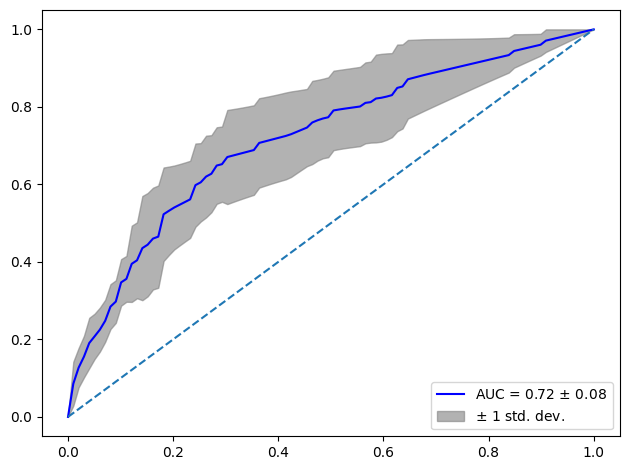

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

aucs = []
tprs = []
mean_fpr = np.linspace(0,1,100)
for i in range(5):
    test = pd.read_csv("test_set_pred_eosce_{}.csv".format(i))
    fpr, tpr, _ = metrics.roc_curve(test[BIN],test["proba1"])
    roc_auc = metrics.auc(fpr, tpr)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(
        mean_fpr,
        mean_tpr,
        color="blue",
        label=r"AUC = %0.2f $\pm$ %0.2f" % (mean_auc, std_auc),
    )
ax.plot([0, 1], [0, 1], ls="--")
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="gray",
    alpha=0.6,
    label=r"$\pm$ 1 std. dev.",
    )
ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        )
ax.legend(loc="lower right")
ax.set_xlabel="1-Specificity (FPR)",
ax.set_ylabel="Sensitivity (TPR)",
plt.tight_layout()

## 9. Save the final model

To ensure we use all possible data, at the end of the pipeline we will train the model with the whole dataset (train and test) and save it as the final model for deployment.

We need to choose which descriptor and parameters will work better for our case and build the model accordingly. We obtain that from the best train-test experiment.

In [22]:
# train the model with the full data

# load the whole dataset

df = pd.read_csv(filename)

# binarize the activity if needed
SMILES = "SMILES"
EXP = "Growth_25uM"
BIN = "bin"

direction = "lower"
cutoff = 7

if direction == "lower":
    df[BIN] = [1 if x <= cutoff else 0 for x in df[EXP]]
elif direction == "higher":
    df[BIN] = [1 if x >= cutoff else 0 for x in df[EXP]]
else:
    print("no direction specified. Please select lower or higher direction for the activity cut-off")

# train the selected model
import lazyqsar as lq
smiles_train = df[SMILES]
y_train = df[BIN]
model = lq.MorganBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
model.fit(smiles_train, y_train)
model.save("mycetos_model.joblib")

[flaml.automl.logger: 09-26 15:37:41] {1679} INFO - task = classification
[flaml.automl.logger: 09-26 15:37:41] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-26 15:37:41] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-26 15:37:41] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost']
[flaml.automl.logger: 09-26 15:37:41] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 09-26 15:37:41] {2344} INFO - Estimated sufficient time budget=312s. Estimated necessary time budget=0s.
[flaml.automl.logger: 09-26 15:37:41] {2391} INFO -  at 0.1s,	estimator rf's best error=0.2835,	best estimator rf's best error=0.2835
[flaml.automl.logger: 09-26 15:37:41] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-26 15:37:41] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.1948,	best estimator lgbm's best error=0.1948
[flaml.automl.logger: 09-26 15:37:41] {2218} INFO - iteration 2, current learn

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.3s,	estimator rf's best error=0.2619,	best estimator lgbm's best error=0.1948
[flaml.automl.logger: 09-26 15:37:42] {2218} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.3s,	estimator lgbm's best error=0.1948,	best estimator lgbm's best error=0.1948
[flaml.automl.logger: 09-26 15:37:42] {2218} INFO - iteration 8, current learner rf
[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.4s,	estimator rf's best error=0.2035,	best estimator lgbm's best error=0.1948
[flaml.automl.logger: 09-26 15:37:42] {2218} INFO - iteration 9, current learner rf
[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.4s,	estimator rf's best error=0.2035,	best estimator lgbm's best error=0.1948
[flaml.automl.logger: 09-26 15:37:42] {2218} INFO - iteration 10, current learner rf
[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.5s,	estimator rf's best error=0.2035,	best estimator lgbm

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.8s,	estimator rf's best error=0.2035,	best estimator lgbm's best error=0.1905
[flaml.automl.logger: 09-26 15:37:42] {2218} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.8s,	estimator lgbm's best error=0.1905,	best estimator lgbm's best error=0.1905
[flaml.automl.logger: 09-26 15:37:42] {2218} INFO - iteration 19, current learner rf
[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.8s,	estimator rf's best error=0.2035,	best estimator lgbm's best error=0.1905
[flaml.automl.logger: 09-26 15:37:42] {2218} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.9s,	estimator lgbm's best error=0.1861,	best estimator lgbm's best error=0.1861
[flaml.automl.logger: 09-26 15:37:42] {2218} INFO - iteration 21, current learner rf
[flaml.automl.logger: 09-26 15:37:42] {2391} INFO -  at 0.9s,	estimator rf's best error=0.2035,	best estimat

`use_label_encoder` is deprecated in 1.7.0.


[flaml.automl.logger: 09-26 15:37:43] {2391} INFO -  at 2.0s,	estimator rf's best error=0.1580,	best estimator lgbm's best error=0.1558
[flaml.automl.logger: 09-26 15:37:43] {2218} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 09-26 15:37:43] {2391} INFO -  at 2.0s,	estimator lgbm's best error=0.1558,	best estimator lgbm's best error=0.1558
[flaml.automl.logger: 09-26 15:37:43] {2218} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 09-26 15:37:43] {2391} INFO -  at 2.1s,	estimator lgbm's best error=0.1558,	best estimator lgbm's best error=0.1558
[flaml.automl.logger: 09-26 15:37:43] {2218} INFO - iteration 50, current learner rf
[flaml.automl.logger: 09-26 15:37:43] {2391} INFO -  at 2.1s,	estimator rf's best error=0.1580,	best estimator lgbm's best error=0.1558
[flaml.automl.logger: 09-26 15:37:43] {2218} INFO - iteration 51, current learner rf
[flaml.automl.logger: 09-26 15:37:44] {2391} INFO -  at 2.2s,	estimator rf's best error=0.1580,	best estimat